In [1]:

import pandas as pd
import io
data=pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignanat 212


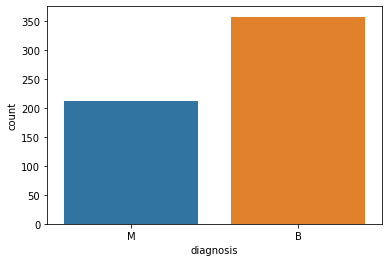

In [2]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing data
del data['Unnamed: 32']

In [4]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
from keras.layers import Dropout
#adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
classifier.add(Dropout(p=1.0))

#adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
classifier.add(Dropout(p=1.0))

#adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))


C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=1.0)`
  """
C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=1.0)`
  if __name__ == '__main__':
C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmo

In [8]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)

C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
455/455 [==============================] - 0s 545us/step - loss: 0.6928 - accuracy: 0.5670
Epoch 2/150
455/455 [==============================] - 0s 26us/step - loss: 0.6912 - accuracy: 0.6374
Epoch 3/150
455/455 [==============================] - 0s 26us/step - loss: 0.6888 - accuracy: 0.6396
Epoch 4/150
455/455 [==============================] - 0s 26us/step - loss: 0.6852 - accuracy: 0.6571
Epoch 5/150
455/455 [==============================] - 0s 26us/step - loss: 0.6797 - accuracy: 0.7033
Epoch 6/150
455/455 [==============================] - 0s 26us/step - loss: 0.6719 - accuracy: 0.7912
Epoch 7/150
455/455 [==============================] - 0s 26us/step - loss: 0.6604 - accuracy: 0.8769
Epoch 8/150
455/455 [==============================] - 0s 35us/step - loss: 0.6453 - accuracy: 0.9143
Epoch 9/150
455/455 [==============================] - 0s 26us/step - loss: 0.6246 - accuracy: 0.9319
Epoch 10/150
455/455 [==============================] - 0s 26us/step - loss: 0.59

455/455 [==============================] - 0s 35us/step - loss: 0.0468 - accuracy: 0.9890
Epoch 80/150
455/455 [==============================] - 0s 35us/step - loss: 0.0464 - accuracy: 0.9890
Epoch 81/150
455/455 [==============================] - 0s 35us/step - loss: 0.0460 - accuracy: 0.9890
Epoch 82/150
455/455 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 1.00 - 0s 26us/step - loss: 0.0456 - accuracy: 0.9890
Epoch 83/150
455/455 [==============================] - 0s 35us/step - loss: 0.0452 - accuracy: 0.9890
Epoch 84/150
455/455 [==============================] - 0s 26us/step - loss: 0.0449 - accuracy: 0.9890
Epoch 85/150
455/455 [==============================] - 0s 26us/step - loss: 0.0445 - accuracy: 0.9890
Epoch 86/150
455/455 [==============================] - 0s 38us/step - loss: 0.0442 - accuracy: 0.9890
Epoch 87/150
455/455 [==============================] - 0s 26us/step - loss: 0.0438 - accuracy: 0.9890
Epoch 88/150
455/455 [======================

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [11]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

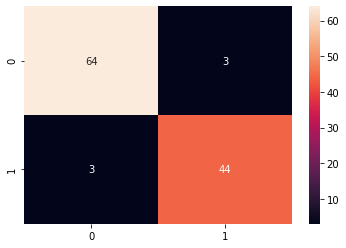

In [12]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')


In [13]:
#First Accuracy after training
(65+44)/114

0.956140350877193

In [14]:
(64+44)/114

0.9473684210526315

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)



In [17]:
accuracies

array([1.        , 1.        , 1.        , 0.97826087, 0.95652175,
       0.95555556, 0.97777778, 1.        , 0.97777778, 0.95555556])

In [18]:
accuracies.mean()

0.9801449298858642

In [19]:
accuracies.std()

0.01832752235693276

In [20]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
409/409 [==============================] - 0s 489us/step - loss: 0.6781 - accuracy: 0.8264
Epoch 2/100
409/409 [==============================] - 0s 160us/step - loss: 0.5164 - accuracy: 0.9535
Epoch 3/100
409/409 [==============================] - 0s 174us/step - loss: 0.2247 - accuracy: 0.9658
Epoch 4/100
409/409 [==============================] - 0s 147us/step - loss: 0.1173 - accuracy: 0.9756
Epoch 5/100
409/409 [==============================] - 0s 147us/step - loss: 0.0909 - accuracy: 0.9756
Epoch 6/100
409/409 [==============================] - 0s 166us/step - loss: 0.0799 - accuracy: 0.9780
Epoch 7/100
409/409 [==============================] - 0s 157us/step - loss: 0.0739 - accuracy: 0.9804
Epoch 8/100
409/409 [==============================] - 0s 166us/step - loss: 0.0682 - accuracy: 0.9853
Epoch 9/100
409/409 [==============================] - 0s 176us/step - loss: 0.0648 - accuracy: 0.9853
Epoch 10/100
409/409 [==============================] - 0s 176us/step - l

409/409 [==============================] - 0s 176us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 80/100
409/409 [==============================] - 0s 156us/step - loss: 0.0062 - accuracy: 0.9976
Epoch 81/100
409/409 [==============================] - 0s 150us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 82/100
409/409 [==============================] - 0s 153us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 83/100
409/409 [==============================] - 0s 152us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 84/100
409/409 [==============================] - 0s 148us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 85/100
409/409 [==============================] - 0s 150us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 86/100
409/409 [==============================] - 0s 147us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 87/100
409/409 [==============================] - 0s 157us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 88/100
409/409 [==============================] - 0s 156us/step - loss:

Epoch 58/100
409/409 [==============================] - 0s 176us/step - loss: 0.0183 - accuracy: 0.9951
Epoch 59/100
409/409 [==============================] - 0s 196us/step - loss: 0.0181 - accuracy: 0.9951
Epoch 60/100
409/409 [==============================] - 0s 176us/step - loss: 0.0174 - accuracy: 0.9902
Epoch 61/100
409/409 [==============================] - 0s 176us/step - loss: 0.0172 - accuracy: 0.9951
Epoch 62/100
409/409 [==============================] - 0s 176us/step - loss: 0.0160 - accuracy: 0.9951
Epoch 63/100
409/409 [==============================] - 0s 196us/step - loss: 0.0141 - accuracy: 0.9951
Epoch 64/100
409/409 [==============================] - 0s 186us/step - loss: 0.0147 - accuracy: 0.9927
Epoch 65/100
409/409 [==============================] - 0s 176us/step - loss: 0.0134 - accuracy: 0.9951
Epoch 66/100
409/409 [==============================] - 0s 176us/step - loss: 0.0128 - accuracy: 0.9951
Epoch 67/100
409/409 [==============================] - 0s 166us

409/409 [==============================] - 0s 176us/step - loss: 0.0372 - accuracy: 0.9902
Epoch 37/100
409/409 [==============================] - 0s 176us/step - loss: 0.0362 - accuracy: 0.9902
Epoch 38/100
409/409 [==============================] - 0s 166us/step - loss: 0.0360 - accuracy: 0.9902
Epoch 39/100
409/409 [==============================] - 0s 186us/step - loss: 0.0354 - accuracy: 0.9902
Epoch 40/100
409/409 [==============================] - 0s 176us/step - loss: 0.0353 - accuracy: 0.9902
Epoch 41/100
409/409 [==============================] - 0s 166us/step - loss: 0.0342 - accuracy: 0.9902
Epoch 42/100
409/409 [==============================] - 0s 166us/step - loss: 0.0335 - accuracy: 0.9902
Epoch 43/100
409/409 [==============================] - 0s 176us/step - loss: 0.0330 - accuracy: 0.9902
Epoch 44/100
409/409 [==============================] - 0s 176us/step - loss: 0.0324 - accuracy: 0.9902
Epoch 45/100
409/409 [==============================] - 0s 166us/step - loss:

Epoch 15/100
409/409 [==============================] - 0s 144us/step - loss: 0.0512 - accuracy: 0.9902
Epoch 16/100
409/409 [==============================] - 0s 147us/step - loss: 0.0498 - accuracy: 0.9902
Epoch 17/100
409/409 [==============================] - 0s 144us/step - loss: 0.0481 - accuracy: 0.9902
Epoch 18/100
409/409 [==============================] - 0s 195us/step - loss: 0.0472 - accuracy: 0.9902
Epoch 19/100
409/409 [==============================] - 0s 186us/step - loss: 0.0458 - accuracy: 0.9902
Epoch 20/100
409/409 [==============================] - 0s 186us/step - loss: 0.0438 - accuracy: 0.9902
Epoch 21/100
409/409 [==============================] - 0s 176us/step - loss: 0.0427 - accuracy: 0.9902
Epoch 22/100
409/409 [==============================] - 0s 176us/step - loss: 0.0418 - accuracy: 0.9902
Epoch 23/100
409/409 [==============================] - 0s 186us/step - loss: 0.0400 - accuracy: 0.9902
Epoch 24/100
409/409 [==============================] - 0s 186us

409/409 [==============================] - 0s 150us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 94/100
409/409 [==============================] - 0s 156us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 95/100
409/409 [==============================] - 0s 154us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 96/100
409/409 [==============================] - 0s 156us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 97/100
409/409 [==============================] - 0s 147us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 98/100
409/409 [==============================] - 0s 148us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 99/100
409/409 [==============================] - 0s 156us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 100/100
409/409 [==============================] - 0s 147us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1/100
409/409 [==============================] - 0s 488us/step - loss: 0.6808 - accuracy: 0.7702
Epoch 2/100
409/409 [==============================] - 0s 127us/step - loss: 

Epoch 72/100
409/409 [==============================] - 0s 147us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 73/100
409/409 [==============================] - 0s 153us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 74/100
409/409 [==============================] - 0s 140us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 75/100
409/409 [==============================] - 0s 147us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 76/100
409/409 [==============================] - 0s 138us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 77/100
409/409 [==============================] - 0s 146us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 78/100
409/409 [==============================] - 0s 147us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 79/100
409/409 [==============================] - 0s 137us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 80/100
409/409 [==============================] - 0s 140us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 81/100
409/409 [==============================] - 0s 144us

410/410 [==============================] - 0s 137us/step - loss: 0.0158 - accuracy: 0.9951
Epoch 50/100
410/410 [==============================] - 0s 138us/step - loss: 0.0158 - accuracy: 0.9927
Epoch 51/100
410/410 [==============================] - 0s 148us/step - loss: 0.0151 - accuracy: 0.9951
Epoch 52/100
410/410 [==============================] - 0s 139us/step - loss: 0.0144 - accuracy: 0.9951
Epoch 53/100
410/410 [==============================] - 0s 147us/step - loss: 0.0146 - accuracy: 0.9951
Epoch 54/100
410/410 [==============================] - 0s 152us/step - loss: 0.0140 - accuracy: 0.9951
Epoch 55/100
410/410 [==============================] - 0s 148us/step - loss: 0.0135 - accuracy: 0.9976
Epoch 56/100
410/410 [==============================] - 0s 146us/step - loss: 0.0133 - accuracy: 0.9976
Epoch 57/100
410/410 [==============================] - 0s 165us/step - loss: 0.0132 - accuracy: 0.9976
Epoch 58/100
410/410 [==============================] - 0s 149us/step - loss:

Epoch 28/100
410/410 [==============================] - 0s 146us/step - loss: 0.0399 - accuracy: 0.9902
Epoch 29/100
410/410 [==============================] - 0s 150us/step - loss: 0.0389 - accuracy: 0.9902
Epoch 30/100
410/410 [==============================] - 0s 153us/step - loss: 0.0383 - accuracy: 0.9902
Epoch 31/100
410/410 [==============================] - 0s 146us/step - loss: 0.0376 - accuracy: 0.9902
Epoch 32/100
410/410 [==============================] - 0s 146us/step - loss: 0.0369 - accuracy: 0.9902
Epoch 33/100
410/410 [==============================] - 0s 146us/step - loss: 0.0360 - accuracy: 0.9902
Epoch 34/100
410/410 [==============================] - 0s 177us/step - loss: 0.0351 - accuracy: 0.9902
Epoch 35/100
410/410 [==============================] - 0s 185us/step - loss: 0.0346 - accuracy: 0.9902
Epoch 36/100
410/410 [==============================] - 0s 186us/step - loss: 0.0343 - accuracy: 0.9902
Epoch 37/100
410/410 [==============================] - 0s 186us

410/410 [==============================] - 0s 128us/step - loss: 0.0841 - accuracy: 0.9854
Epoch 7/100
410/410 [==============================] - 0s 156us/step - loss: 0.0761 - accuracy: 0.9854
Epoch 8/100
410/410 [==============================] - 0s 149us/step - loss: 0.0711 - accuracy: 0.9854
Epoch 9/100
410/410 [==============================] - 0s 133us/step - loss: 0.0680 - accuracy: 0.9878
Epoch 10/100
410/410 [==============================] - 0s 146us/step - loss: 0.0644 - accuracy: 0.9878
Epoch 11/100
410/410 [==============================] - 0s 171us/step - loss: 0.0621 - accuracy: 0.9878
Epoch 12/100
410/410 [==============================] - 0s 179us/step - loss: 0.0602 - accuracy: 0.9878
Epoch 13/100
410/410 [==============================] - 0s 185us/step - loss: 0.0583 - accuracy: 0.9878
Epoch 14/100
410/410 [==============================] - 0s 156us/step - loss: 0.0563 - accuracy: 0.9878
Epoch 15/100
410/410 [==============================] - 0s 156us/step - loss: 0.

410/410 [==============================] - 0s 166us/step - loss: 0.0096 - accuracy: 0.9976
Epoch 85/100
410/410 [==============================] - 0s 146us/step - loss: 0.0095 - accuracy: 0.9976
Epoch 86/100
410/410 [==============================] - 0s 127us/step - loss: 0.0096 - accuracy: 0.9976
Epoch 87/100
410/410 [==============================] - 0s 137us/step - loss: 0.0091 - accuracy: 0.9976
Epoch 88/100
410/410 [==============================] - 0s 146us/step - loss: 0.0088 - accuracy: 0.9976
Epoch 89/100
410/410 [==============================] - 0s 156us/step - loss: 0.0085 - accuracy: 0.9976
Epoch 90/100
410/410 [==============================] - 0s 166us/step - loss: 0.0080 - accuracy: 0.9976
Epoch 91/100
410/410 [==============================] - 0s 166us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 92/100
410/410 [==============================] - 0s 172us/step - loss: 0.0060 - accuracy: 0.9976
Epoch 93/100
410/410 [==============================] - 0s 160us/step - loss:

410/410 [==============================] - 0s 166us/step - loss: 0.0181 - accuracy: 0.9951
Epoch 63/100
410/410 [==============================] - 0s 157us/step - loss: 0.0176 - accuracy: 0.9951
Epoch 64/100
410/410 [==============================] - 0s 156us/step - loss: 0.0162 - accuracy: 0.9951
Epoch 65/100
410/410 [==============================] - 0s 146us/step - loss: 0.0153 - accuracy: 0.9927
Epoch 66/100
410/410 [==============================] - 0s 158us/step - loss: 0.0152 - accuracy: 0.9976
Epoch 67/100
410/410 [==============================] - 0s 145us/step - loss: 0.0148 - accuracy: 0.9951
Epoch 68/100
410/410 [==============================] - 0s 158us/step - loss: 0.0122 - accuracy: 0.9976
Epoch 69/100
410/410 [==============================] - 0s 164us/step - loss: 0.0120 - accuracy: 0.9976
Epoch 70/100
410/410 [==============================] - 0s 156us/step - loss: 0.0109 - accuracy: 0.9976
Epoch 71/100
410/410 [==============================] - 0s 157us/step - loss:

Epoch 41/100
410/410 [==============================] - 0s 156us/step - loss: 0.0289 - accuracy: 0.9902
Epoch 42/100
410/410 [==============================] - 0s 146us/step - loss: 0.0287 - accuracy: 0.9902
Epoch 43/100
410/410 [==============================] - 0s 159us/step - loss: 0.0279 - accuracy: 0.9902
Epoch 44/100
410/410 [==============================] - 0s 163us/step - loss: 0.0275 - accuracy: 0.9902
Epoch 45/100
410/410 [==============================] - 0s 156us/step - loss: 0.0261 - accuracy: 0.9902
Epoch 46/100
410/410 [==============================] - 0s 146us/step - loss: 0.0252 - accuracy: 0.9902
Epoch 47/100
410/410 [==============================] - 0s 146us/step - loss: 0.0241 - accuracy: 0.9902
Epoch 48/100
410/410 [==============================] - 0s 161us/step - loss: 0.0235 - accuracy: 0.9902
Epoch 49/100
410/410 [==============================] - 0s 142us/step - loss: 0.0230 - accuracy: 0.9902
Epoch 50/100
410/410 [==============================] - 0s 149us

409/409 [==============================] - 0s 137us/step - loss: 0.0556 - accuracy: 0.9878
Epoch 20/100
409/409 [==============================] - 0s 137us/step - loss: 0.0556 - accuracy: 0.9878
Epoch 21/100
409/409 [==============================] - 0s 152us/step - loss: 0.0538 - accuracy: 0.9878
Epoch 22/100
409/409 [==============================] - 0s 137us/step - loss: 0.0520 - accuracy: 0.9878
Epoch 23/100
409/409 [==============================] - 0s 143us/step - loss: 0.0514 - accuracy: 0.9878
Epoch 24/100
409/409 [==============================] - 0s 155us/step - loss: 0.0501 - accuracy: 0.9878
Epoch 25/100
409/409 [==============================] - 0s 205us/step - loss: 0.0489 - accuracy: 0.9878
Epoch 26/100
409/409 [==============================] - 0s 170us/step - loss: 0.0471 - accuracy: 0.9878
Epoch 27/100
409/409 [==============================] - 0s 183us/step - loss: 0.0461 - accuracy: 0.9878
Epoch 28/100
409/409 [==============================] - 0s 166us/step - loss:

409/409 [==============================] - 0s 176us/step - loss: 0.0090 - accuracy: 0.9976
Epoch 98/100
409/409 [==============================] - 0s 177us/step - loss: 0.0104 - accuracy: 0.9951
Epoch 99/100
409/409 [==============================] - 0s 166us/step - loss: 0.0085 - accuracy: 0.9976
Epoch 100/100
409/409 [==============================] - 0s 176us/step - loss: 0.0096 - accuracy: 0.9976
Epoch 1/100
409/409 [==============================] - 0s 694us/step - loss: 0.6612 - accuracy: 0.7653
Epoch 2/100
409/409 [==============================] - 0s 215us/step - loss: 0.5012 - accuracy: 0.9438
Epoch 3/100
409/409 [==============================] - 0s 273us/step - loss: 0.3125 - accuracy: 0.9487
Epoch 4/100
409/409 [==============================] - 0s 254us/step - loss: 0.1929 - accuracy: 0.9609
Epoch 5/100
409/409 [==============================] - 0s 215us/step - loss: 0.1354 - accuracy: 0.9731
Epoch 6/100
409/409 [==============================] - ETA: 0s - loss: 0.1106 - a

409/409 [==============================] - 0s 196us/step - loss: 0.0148 - accuracy: 0.9951
Epoch 76/100
409/409 [==============================] - 0s 166us/step - loss: 0.0158 - accuracy: 0.9927
Epoch 77/100
409/409 [==============================] - 0s 156us/step - loss: 0.0145 - accuracy: 0.9951
Epoch 78/100
409/409 [==============================] - 0s 166us/step - loss: 0.0130 - accuracy: 0.9951
Epoch 79/100
409/409 [==============================] - 0s 176us/step - loss: 0.0128 - accuracy: 0.9951
Epoch 80/100
409/409 [==============================] - 0s 166us/step - loss: 0.0133 - accuracy: 0.9927
Epoch 81/100
409/409 [==============================] - 0s 166us/step - loss: 0.0127 - accuracy: 0.9951
Epoch 82/100
409/409 [==============================] - 0s 176us/step - loss: 0.0114 - accuracy: 0.9951
Epoch 83/100
409/409 [==============================] - 0s 166us/step - loss: 0.0116 - accuracy: 0.9951
Epoch 84/100
409/409 [==============================] - 0s 166us/step - loss:

Epoch 54/100
409/409 [==============================] - 0s 166us/step - loss: 0.0251 - accuracy: 0.9902
Epoch 55/100
409/409 [==============================] - 0s 166us/step - loss: 0.0249 - accuracy: 0.9902
Epoch 56/100
409/409 [==============================] - 0s 157us/step - loss: 0.0231 - accuracy: 0.9902
Epoch 57/100
409/409 [==============================] - 0s 156us/step - loss: 0.0245 - accuracy: 0.9902
Epoch 58/100
409/409 [==============================] - 0s 156us/step - loss: 0.0215 - accuracy: 0.9902
Epoch 59/100
409/409 [==============================] - 0s 156us/step - loss: 0.0251 - accuracy: 0.9902
Epoch 60/100
409/409 [==============================] - 0s 156us/step - loss: 0.0210 - accuracy: 0.9902
Epoch 61/100
409/409 [==============================] - 0s 156us/step - loss: 0.0212 - accuracy: 0.9902
Epoch 62/100
409/409 [==============================] - 0s 167us/step - loss: 0.0220 - accuracy: 0.9902
Epoch 63/100
409/409 [==============================] - 0s 166us

409/409 [==============================] - 0s 186us/step - loss: 0.0321 - accuracy: 0.9902
Epoch 33/100
409/409 [==============================] - 0s 166us/step - loss: 0.0307 - accuracy: 0.9927
Epoch 34/100
409/409 [==============================] - 0s 159us/step - loss: 0.0296 - accuracy: 0.9902
Epoch 35/100
409/409 [==============================] - 0s 166us/step - loss: 0.0289 - accuracy: 0.9927
Epoch 36/100
409/409 [==============================] - 0s 154us/step - loss: 0.0291 - accuracy: 0.9927
Epoch 37/100
409/409 [==============================] - 0s 146us/step - loss: 0.0281 - accuracy: 0.9927
Epoch 38/100
409/409 [==============================] - 0s 153us/step - loss: 0.0271 - accuracy: 0.9927
Epoch 39/100
409/409 [==============================] - 0s 150us/step - loss: 0.0269 - accuracy: 0.9927
Epoch 40/100
409/409 [==============================] - 0s 147us/step - loss: 0.0259 - accuracy: 0.9927
Epoch 41/100
409/409 [==============================] - 0s 168us/step - loss:

409/409 [==============================] - 0s 167us/step - loss: 0.0514 - accuracy: 0.9878
Epoch 11/100
409/409 [==============================] - 0s 147us/step - loss: 0.0483 - accuracy: 0.9878
Epoch 12/100
409/409 [==============================] - 0s 127us/step - loss: 0.0458 - accuracy: 0.9902
Epoch 13/100
409/409 [==============================] - 0s 134us/step - loss: 0.0435 - accuracy: 0.9853
Epoch 14/100
409/409 [==============================] - 0s 143us/step - loss: 0.0418 - accuracy: 0.9927
Epoch 15/100
409/409 [==============================] - 0s 137us/step - loss: 0.0400 - accuracy: 0.9927
Epoch 16/100
409/409 [==============================] - 0s 137us/step - loss: 0.0378 - accuracy: 0.9927
Epoch 17/100
409/409 [==============================] - 0s 147us/step - loss: 0.0372 - accuracy: 0.9927
Epoch 18/100
409/409 [==============================] - 0s 147us/step - loss: 0.0356 - accuracy: 0.9927
Epoch 19/100
409/409 [==============================] - 0s 151us/step - loss:

409/409 [==============================] - 0s 162us/step - loss: 0.0051 - accuracy: 0.9976
Epoch 89/100
409/409 [==============================] - 0s 147us/step - loss: 0.0034 - accuracy: 0.9976
Epoch 90/100
409/409 [==============================] - 0s 127us/step - loss: 0.0064 - accuracy: 0.9976
Epoch 91/100
409/409 [==============================] - 0s 147us/step - loss: 0.0033 - accuracy: 0.9976
Epoch 92/100
409/409 [==============================] - 0s 132us/step - loss: 0.0028 - accuracy: 0.9976
Epoch 93/100
409/409 [==============================] - 0s 141us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 94/100
409/409 [==============================] - 0s 142us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 95/100
409/409 [==============================] - 0s 156us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 96/100
409/409 [==============================] - 0s 153us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 97/100
409/409 [==============================] - 0s 137us/step - loss:

Epoch 67/100
410/410 [==============================] - 0s 158us/step - loss: 0.0112 - accuracy: 0.9976
Epoch 68/100
410/410 [==============================] - 0s 145us/step - loss: 0.0117 - accuracy: 0.9976
Epoch 69/100
410/410 [==============================] - 0s 137us/step - loss: 0.0108 - accuracy: 0.9976
Epoch 70/100
410/410 [==============================] - 0s 146us/step - loss: 0.0118 - accuracy: 0.9976
Epoch 71/100
410/410 [==============================] - 0s 141us/step - loss: 0.0104 - accuracy: 0.9976
Epoch 72/100
410/410 [==============================] - 0s 138us/step - loss: 0.0101 - accuracy: 0.9976
Epoch 73/100
410/410 [==============================] - 0s 150us/step - loss: 0.0100 - accuracy: 0.9976
Epoch 74/100
410/410 [==============================] - 0s 137us/step - loss: 0.0097 - accuracy: 0.9976
Epoch 75/100
410/410 [==============================] - 0s 146us/step - loss: 0.0097 - accuracy: 0.9976
Epoch 76/100
410/410 [==============================] - 0s 147us

410/410 [==============================] - 0s 185us/step - loss: 0.0344 - accuracy: 0.9902
Epoch 46/100
410/410 [==============================] - 0s 195us/step - loss: 0.0329 - accuracy: 0.9902
Epoch 47/100
410/410 [==============================] - 0s 176us/step - loss: 0.0321 - accuracy: 0.9902
Epoch 48/100
410/410 [==============================] - 0s 152us/step - loss: 0.0310 - accuracy: 0.9902
Epoch 49/100
410/410 [==============================] - 0s 160us/step - loss: 0.0308 - accuracy: 0.9902
Epoch 50/100
410/410 [==============================] - 0s 117us/step - loss: 0.0310 - accuracy: 0.9902
Epoch 51/100
410/410 [==============================] - 0s 127us/step - loss: 0.0295 - accuracy: 0.9902
Epoch 52/100
410/410 [==============================] - 0s 147us/step - loss: 0.0295 - accuracy: 0.9902
Epoch 53/100
410/410 [==============================] - 0s 136us/step - loss: 0.0285 - accuracy: 0.9902
Epoch 54/100
410/410 [==============================] - 0s 146us/step - loss:

Epoch 24/100
410/410 [==============================] - 0s 117us/step - loss: 0.0488 - accuracy: 0.9878
Epoch 25/100
410/410 [==============================] - 0s 127us/step - loss: 0.0463 - accuracy: 0.9878
Epoch 26/100
410/410 [==============================] - 0s 139us/step - loss: 0.0445 - accuracy: 0.9902
Epoch 27/100
410/410 [==============================] - 0s 123us/step - loss: 0.0430 - accuracy: 0.9902
Epoch 28/100
410/410 [==============================] - 0s 129us/step - loss: 0.0419 - accuracy: 0.9902
Epoch 29/100
410/410 [==============================] - 0s 130us/step - loss: 0.0412 - accuracy: 0.9902
Epoch 30/100
410/410 [==============================] - 0s 124us/step - loss: 0.0396 - accuracy: 0.9902
Epoch 31/100
410/410 [==============================] - 0s 137us/step - loss: 0.0396 - accuracy: 0.9902
Epoch 32/100
410/410 [==============================] - 0s 137us/step - loss: 0.0381 - accuracy: 0.9902
Epoch 33/100
410/410 [==============================] - 0s 126us

410/410 [==============================] - 0s 124us/step - loss: 0.4560 - accuracy: 0.9390
Epoch 3/100
410/410 [==============================] - 0s 122us/step - loss: 0.2715 - accuracy: 0.9463
Epoch 4/100
410/410 [==============================] - 0s 122us/step - loss: 0.1777 - accuracy: 0.9610
Epoch 5/100
410/410 [==============================] - 0s 146us/step - loss: 0.1296 - accuracy: 0.9707
Epoch 6/100
410/410 [==============================] - 0s 134us/step - loss: 0.1045 - accuracy: 0.9707
Epoch 7/100
410/410 [==============================] - 0s 121us/step - loss: 0.0919 - accuracy: 0.9756
Epoch 8/100
410/410 [==============================] - 0s 127us/step - loss: 0.0825 - accuracy: 0.9780
Epoch 9/100
410/410 [==============================] - 0s 127us/step - loss: 0.0761 - accuracy: 0.9780
Epoch 10/100
410/410 [==============================] - 0s 142us/step - loss: 0.0721 - accuracy: 0.9829
Epoch 11/100
410/410 [==============================] - 0s 128us/step - loss: 0.0679

410/410 [==============================] - 0s 127us/step - loss: 0.0099 - accuracy: 0.9951
Epoch 81/100
410/410 [==============================] - 0s 127us/step - loss: 0.0112 - accuracy: 0.9927
Epoch 82/100
410/410 [==============================] - 0s 127us/step - loss: 0.0090 - accuracy: 0.9951
Epoch 83/100
410/410 [==============================] - 0s 136us/step - loss: 0.0091 - accuracy: 0.9951
Epoch 84/100
410/410 [==============================] - 0s 132us/step - loss: 0.0073 - accuracy: 0.9976
Epoch 85/100
410/410 [==============================] - 0s 137us/step - loss: 0.0087 - accuracy: 0.9927
Epoch 86/100
410/410 [==============================] - 0s 127us/step - loss: 0.0070 - accuracy: 0.9951
Epoch 87/100
410/410 [==============================] - 0s 127us/step - loss: 0.0065 - accuracy: 0.9976
Epoch 88/100
410/410 [==============================] - 0s 137us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 89/100
410/410 [==============================] - 0s 176us/step - loss:

Epoch 59/100
410/410 [==============================] - 0s 176us/step - loss: 0.0202 - accuracy: 0.9902
Epoch 60/100
410/410 [==============================] - 0s 166us/step - loss: 0.0199 - accuracy: 0.9902
Epoch 61/100
410/410 [==============================] - 0s 176us/step - loss: 0.0191 - accuracy: 0.9927
Epoch 62/100
410/410 [==============================] - 0s 176us/step - loss: 0.0185 - accuracy: 0.9902
Epoch 63/100
410/410 [==============================] - 0s 224us/step - loss: 0.0171 - accuracy: 0.9927
Epoch 64/100
410/410 [==============================] - 0s 205us/step - loss: 0.0178 - accuracy: 0.9902
Epoch 65/100
410/410 [==============================] - 0s 215us/step - loss: 0.0180 - accuracy: 0.9927
Epoch 66/100
410/410 [==============================] - 0s 215us/step - loss: 0.0155 - accuracy: 0.9927
Epoch 67/100
410/410 [==============================] - 0s 205us/step - loss: 0.0168 - accuracy: 0.9902
Epoch 68/100
410/410 [==============================] - 0s 205us

409/409 [==============================] - 0s 156us/step - loss: 0.0283 - accuracy: 0.9902
Epoch 38/500
409/409 [==============================] - 0s 156us/step - loss: 0.0271 - accuracy: 0.9902
Epoch 39/500
409/409 [==============================] - 0s 147us/step - loss: 0.0263 - accuracy: 0.9902
Epoch 40/500
409/409 [==============================] - 0s 177us/step - loss: 0.0242 - accuracy: 0.9927
Epoch 41/500
409/409 [==============================] - 0s 191us/step - loss: 0.0232 - accuracy: 0.9902
Epoch 42/500
409/409 [==============================] - 0s 191us/step - loss: 0.0228 - accuracy: 0.9927
Epoch 43/500
409/409 [==============================] - 0s 196us/step - loss: 0.0214 - accuracy: 0.9902
Epoch 44/500
409/409 [==============================] - 0s 186us/step - loss: 0.0207 - accuracy: 0.9951
Epoch 45/500
409/409 [==============================] - 0s 176us/step - loss: 0.0191 - accuracy: 0.9951
Epoch 46/500
409/409 [==============================] - 0s 186us/step - loss:

409/409 [==============================] - 0s 186us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 116/500
409/409 [==============================] - 0s 147us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 117/500
409/409 [==============================] - 0s 156us/step - loss: 9.4789e-04 - accuracy: 1.0000
Epoch 118/500
409/409 [==============================] - 0s 156us/step - loss: 9.8254e-04 - accuracy: 1.0000
Epoch 119/500
409/409 [==============================] - 0s 147us/step - loss: 8.8092e-04 - accuracy: 1.0000
Epoch 120/500
409/409 [==============================] - 0s 147us/step - loss: 8.7705e-04 - accuracy: 1.0000
Epoch 121/500
409/409 [==============================] - 0s 156us/step - loss: 8.7232e-04 - accuracy: 1.0000
Epoch 122/500
409/409 [==============================] - 0s 146us/step - loss: 8.1752e-04 - accuracy: 1.0000
Epoch 123/500
409/409 [==============================] - 0s 166us/step - loss: 7.7840e-04 - accuracy: 1.0000
Epoch 124/500
409/409 [==================

409/409 [==============================] - 0s 166us/step - loss: 1.2552e-04 - accuracy: 1.0000
Epoch 191/500
409/409 [==============================] - 0s 166us/step - loss: 1.2694e-04 - accuracy: 1.0000
Epoch 192/500
409/409 [==============================] - 0s 156us/step - loss: 1.2111e-04 - accuracy: 1.0000
Epoch 193/500
409/409 [==============================] - 0s 156us/step - loss: 1.1707e-04 - accuracy: 1.0000
Epoch 194/500
409/409 [==============================] - 0s 156us/step - loss: 1.2050e-04 - accuracy: 1.0000
Epoch 195/500
409/409 [==============================] - 0s 156us/step - loss: 1.1361e-04 - accuracy: 1.0000
Epoch 196/500
409/409 [==============================] - 0s 166us/step - loss: 1.1178e-04 - accuracy: 1.0000
Epoch 197/500
409/409 [==============================] - 0s 156us/step - loss: 1.0815e-04 - accuracy: 1.0000
Epoch 198/500
409/409 [==============================] - 0s 156us/step - loss: 1.0230e-04 - accuracy: 1.0000
Epoch 199/500
409/409 [==========

409/409 [==============================] - 0s 196us/step - loss: 1.9150e-05 - accuracy: 1.0000
Epoch 265/500
409/409 [==============================] - 0s 167us/step - loss: 1.8989e-05 - accuracy: 1.0000
Epoch 266/500
409/409 [==============================] - 0s 156us/step - loss: 1.9319e-05 - accuracy: 1.0000
Epoch 267/500
409/409 [==============================] - 0s 176us/step - loss: 1.8342e-05 - accuracy: 1.0000
Epoch 268/500
409/409 [==============================] - 0s 166us/step - loss: 1.8041e-05 - accuracy: 1.0000
Epoch 269/500
409/409 [==============================] - 0s 166us/step - loss: 1.7312e-05 - accuracy: 1.0000
Epoch 270/500
409/409 [==============================] - 0s 166us/step - loss: 1.6779e-05 - accuracy: 1.0000
Epoch 271/500
409/409 [==============================] - 0s 166us/step - loss: 1.6941e-05 - accuracy: 1.0000
Epoch 272/500
409/409 [==============================] - 0s 177us/step - loss: 1.6941e-05 - accuracy: 1.0000
Epoch 273/500
409/409 [==========

409/409 [==============================] - 0s 165us/step - loss: 3.3389e-06 - accuracy: 1.0000
Epoch 340/500
409/409 [==============================] - 0s 158us/step - loss: 3.3117e-06 - accuracy: 1.0000
Epoch 341/500
409/409 [==============================] - 0s 147us/step - loss: 3.1729e-06 - accuracy: 1.0000
Epoch 342/500
409/409 [==============================] - 0s 156us/step - loss: 3.0521e-06 - accuracy: 1.0000
Epoch 343/500
409/409 [==============================] - 0s 156us/step - loss: 3.0176e-06 - accuracy: 1.0000
Epoch 344/500
409/409 [==============================] - 0s 157us/step - loss: 2.9556e-06 - accuracy: 1.0000
Epoch 345/500
409/409 [==============================] - 0s 148us/step - loss: 2.8722e-06 - accuracy: 1.0000
Epoch 346/500
409/409 [==============================] - 0s 164us/step - loss: 2.8204e-06 - accuracy: 1.0000
Epoch 347/500
409/409 [==============================] - 0s 177us/step - loss: 2.7484e-06 - accuracy: 1.0000
Epoch 348/500
409/409 [==========

409/409 [==============================] - 0s 176us/step - loss: 6.0311e-07 - accuracy: 1.0000
Epoch 415/500
409/409 [==============================] - 0s 176us/step - loss: 5.8603e-07 - accuracy: 1.0000
Epoch 416/500
409/409 [==============================] - 0s 156us/step - loss: 5.7170e-07 - accuracy: 1.0000
Epoch 417/500
409/409 [==============================] - 0s 156us/step - loss: 5.6061e-07 - accuracy: 1.0000
Epoch 418/500
409/409 [==============================] - 0s 156us/step - loss: 5.5086e-07 - accuracy: 1.0000
Epoch 419/500
409/409 [==============================] - 0s 156us/step - loss: 5.4826e-07 - accuracy: 1.0000
Epoch 420/500
409/409 [==============================] - 0s 166us/step - loss: 5.2362e-07 - accuracy: 1.0000
Epoch 421/500
409/409 [==============================] - 0s 176us/step - loss: 5.1618e-07 - accuracy: 1.0000
Epoch 422/500
409/409 [==============================] - 0s 156us/step - loss: 5.0316e-07 - accuracy: 1.0000
Epoch 423/500
409/409 [==========

409/409 [==============================] - 0s 196us/step - loss: 1.1468e-07 - accuracy: 1.0000
Epoch 490/500
409/409 [==============================] - 0s 176us/step - loss: 1.1185e-07 - accuracy: 1.0000
Epoch 491/500
409/409 [==============================] - 0s 176us/step - loss: 1.0816e-07 - accuracy: 1.0000
Epoch 492/500
409/409 [==============================] - 0s 176us/step - loss: 1.0725e-07 - accuracy: 1.0000
Epoch 493/500
409/409 [==============================] - 0s 147us/step - loss: 1.0536e-07 - accuracy: 1.0000
Epoch 494/500
409/409 [==============================] - 0s 156us/step - loss: 1.0577e-07 - accuracy: 1.0000
Epoch 495/500
409/409 [==============================] - 0s 147us/step - loss: 1.0951e-07 - accuracy: 1.0000
Epoch 496/500
409/409 [==============================] - 0s 425us/step - loss: 1.0430e-07 - accuracy: 1.0000
Epoch 497/500
409/409 [==============================] - 0s 196us/step - loss: 1.0735e-07 - accuracy: 1.0000
Epoch 498/500
409/409 [==========

409/409 [==============================] - 0s 215us/step - loss: 0.0208 - accuracy: 0.9927
Epoch 68/500
409/409 [==============================] - 0s 235us/step - loss: 0.0204 - accuracy: 0.9902
Epoch 69/500
409/409 [==============================] - 0s 235us/step - loss: 0.0197 - accuracy: 0.9927
Epoch 70/500
409/409 [==============================] - 0s 215us/step - loss: 0.0195 - accuracy: 0.9927
Epoch 71/500
409/409 [==============================] - 0s 215us/step - loss: 0.0193 - accuracy: 0.9902
Epoch 72/500
409/409 [==============================] - 0s 215us/step - loss: 0.0185 - accuracy: 0.9927
Epoch 73/500
409/409 [==============================] - 0s 205us/step - loss: 0.0177 - accuracy: 0.9927
Epoch 74/500
409/409 [==============================] - 0s 205us/step - loss: 0.0172 - accuracy: 0.9951
Epoch 75/500
409/409 [==============================] - 0s 215us/step - loss: 0.0173 - accuracy: 0.9927
Epoch 76/500
409/409 [==============================] - 0s 205us/step - loss:

409/409 [==============================] - 0s 161us/step - loss: 5.9690e-04 - accuracy: 1.0000
Epoch 146/500
409/409 [==============================] - 0s 153us/step - loss: 5.9302e-04 - accuracy: 1.0000
Epoch 147/500
409/409 [==============================] - 0s 145us/step - loss: 5.6171e-04 - accuracy: 1.0000
Epoch 148/500
409/409 [==============================] - 0s 138us/step - loss: 5.4339e-04 - accuracy: 1.0000
Epoch 149/500
409/409 [==============================] - 0s 149us/step - loss: 5.2423e-04 - accuracy: 1.0000
Epoch 150/500
409/409 [==============================] - 0s 141us/step - loss: 5.0899e-04 - accuracy: 1.0000
Epoch 151/500
409/409 [==============================] - 0s 143us/step - loss: 5.1258e-04 - accuracy: 1.0000
Epoch 152/500
409/409 [==============================] - 0s 160us/step - loss: 4.7041e-04 - accuracy: 1.0000
Epoch 153/500
409/409 [==============================] - 0s 166us/step - loss: 4.6326e-04 - accuracy: 1.0000
Epoch 154/500
409/409 [==========

409/409 [==============================] - 0s 147us/step - loss: 6.3529e-05 - accuracy: 1.0000
Epoch 221/500
409/409 [==============================] - 0s 144us/step - loss: 6.2642e-05 - accuracy: 1.0000
Epoch 222/500
409/409 [==============================] - 0s 166us/step - loss: 5.9316e-05 - accuracy: 1.0000
Epoch 223/500
409/409 [==============================] - 0s 166us/step - loss: 5.8912e-05 - accuracy: 1.0000
Epoch 224/500
409/409 [==============================] - 0s 166us/step - loss: 5.6926e-05 - accuracy: 1.0000
Epoch 225/500
409/409 [==============================] - 0s 176us/step - loss: 5.5748e-05 - accuracy: 1.0000
Epoch 226/500
409/409 [==============================] - 0s 186us/step - loss: 5.4274e-05 - accuracy: 1.0000
Epoch 227/500
409/409 [==============================] - 0s 186us/step - loss: 5.2746e-05 - accuracy: 1.0000
Epoch 228/500
409/409 [==============================] - 0s 235us/step - loss: 5.0853e-05 - accuracy: 1.0000
Epoch 229/500
409/409 [==========

409/409 [==============================] - 0s 186us/step - loss: 9.5721e-06 - accuracy: 1.0000
Epoch 296/500
409/409 [==============================] - 0s 186us/step - loss: 9.5125e-06 - accuracy: 1.0000
Epoch 297/500
409/409 [==============================] - 0s 196us/step - loss: 9.0983e-06 - accuracy: 1.0000
Epoch 298/500
409/409 [==============================] - 0s 215us/step - loss: 8.8683e-06 - accuracy: 1.0000
Epoch 299/500
409/409 [==============================] - 0s 206us/step - loss: 8.7093e-06 - accuracy: 1.0000
Epoch 300/500
409/409 [==============================] - 0s 186us/step - loss: 8.5427e-06 - accuracy: 1.0000
Epoch 301/500
409/409 [==============================] - 0s 215us/step - loss: 8.1474e-06 - accuracy: 1.0000
Epoch 302/500
409/409 [==============================] - 0s 216us/step - loss: 7.9779e-06 - accuracy: 1.0000
Epoch 303/500
409/409 [==============================] - 0s 206us/step - loss: 7.8540e-06 - accuracy: 1.0000
Epoch 304/500
409/409 [==========

409/409 [==============================] - 0s 157us/step - loss: 1.6230e-06 - accuracy: 1.0000
Epoch 371/500
409/409 [==============================] - 0s 166us/step - loss: 1.5865e-06 - accuracy: 1.0000
Epoch 372/500
409/409 [==============================] - 0s 176us/step - loss: 1.5412e-06 - accuracy: 1.0000
Epoch 373/500
409/409 [==============================] - 0s 167us/step - loss: 1.4929e-06 - accuracy: 1.0000
Epoch 374/500
409/409 [==============================] - 0s 196us/step - loss: 1.4898e-06 - accuracy: 1.0000
Epoch 375/500
409/409 [==============================] - 0s 156us/step - loss: 1.4495e-06 - accuracy: 1.0000
Epoch 376/500
409/409 [==============================] - 0s 169us/step - loss: 1.4021e-06 - accuracy: 1.0000
Epoch 377/500
409/409 [==============================] - 0s 164us/step - loss: 1.3679e-06 - accuracy: 1.0000
Epoch 378/500
409/409 [==============================] - 0s 166us/step - loss: 1.3343e-06 - accuracy: 1.0000
Epoch 379/500
409/409 [==========

409/409 [==============================] - 0s 152us/step - loss: 2.8325e-07 - accuracy: 1.0000
Epoch 446/500
409/409 [==============================] - 0s 157us/step - loss: 2.8112e-07 - accuracy: 1.0000
Epoch 447/500
409/409 [==============================] - 0s 146us/step - loss: 2.7689e-07 - accuracy: 1.0000
Epoch 448/500
409/409 [==============================] - 0s 148us/step - loss: 2.7124e-07 - accuracy: 1.0000
Epoch 449/500
409/409 [==============================] - 0s 147us/step - loss: 2.6403e-07 - accuracy: 1.0000
Epoch 450/500
409/409 [==============================] - 0s 149us/step - loss: 2.6001e-07 - accuracy: 1.0000
Epoch 451/500
409/409 [==============================] - 0s 242us/step - loss: 2.5147e-07 - accuracy: 1.0000
Epoch 452/500
409/409 [==============================] - 0s 156us/step - loss: 2.3892e-07 - accuracy: 1.0000
Epoch 453/500
409/409 [==============================] - 0s 137us/step - loss: 2.4160e-07 - accuracy: 1.0000
Epoch 454/500
409/409 [==========

409/409 [==============================] - 0s 166us/step - loss: 0.0463 - accuracy: 0.9902
Epoch 22/500
409/409 [==============================] - 0s 166us/step - loss: 0.0454 - accuracy: 0.9902
Epoch 23/500
409/409 [==============================] - 0s 156us/step - loss: 0.0445 - accuracy: 0.9902
Epoch 24/500
409/409 [==============================] - 0s 167us/step - loss: 0.0436 - accuracy: 0.9902
Epoch 25/500
409/409 [==============================] - 0s 166us/step - loss: 0.0424 - accuracy: 0.9902
Epoch 26/500
409/409 [==============================] - 0s 166us/step - loss: 0.0413 - accuracy: 0.9902
Epoch 27/500
409/409 [==============================] - 0s 156us/step - loss: 0.0403 - accuracy: 0.9902
Epoch 28/500
409/409 [==============================] - 0s 167us/step - loss: 0.0388 - accuracy: 0.9902
Epoch 29/500
409/409 [==============================] - 0s 156us/step - loss: 0.0384 - accuracy: 0.9902
Epoch 30/500
409/409 [==============================] - 0s 167us/step - loss:

409/409 [==============================] - 0s 156us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 100/500
409/409 [==============================] - 0s 147us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 101/500
409/409 [==============================] - 0s 150us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 102/500
409/409 [==============================] - 0s 153us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 103/500
409/409 [==============================] - 0s 151us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 104/500
409/409 [==============================] - 0s 154us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 105/500
409/409 [==============================] - 0s 155us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 106/500
409/409 [==============================] - 0s 147us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 107/500
409/409 [==============================] - 0s 148us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 108/500
409/409 [==============================] - 0s 155us/ste

409/409 [==============================] - 0s 152us/step - loss: 3.2473e-04 - accuracy: 1.0000
Epoch 176/500
409/409 [==============================] - 0s 146us/step - loss: 3.1141e-04 - accuracy: 1.0000
Epoch 177/500
409/409 [==============================] - 0s 153us/step - loss: 3.0372e-04 - accuracy: 1.0000
Epoch 178/500
409/409 [==============================] - 0s 160us/step - loss: 2.7876e-04 - accuracy: 1.0000
Epoch 179/500
409/409 [==============================] - 0s 163us/step - loss: 2.9162e-04 - accuracy: 1.0000
Epoch 180/500
409/409 [==============================] - 0s 147us/step - loss: 2.7739e-04 - accuracy: 1.0000
Epoch 181/500
409/409 [==============================] - 0s 147us/step - loss: 2.8073e-04 - accuracy: 1.0000
Epoch 182/500
409/409 [==============================] - 0s 177us/step - loss: 2.4887e-04 - accuracy: 1.0000
Epoch 183/500
409/409 [==============================] - 0s 155us/step - loss: 2.5638e-04 - accuracy: 1.0000
Epoch 184/500
409/409 [==========

409/409 [==============================] - 0s 144us/step - loss: 4.0741e-05 - accuracy: 1.0000
Epoch 251/500
409/409 [==============================] - 0s 144us/step - loss: 4.3381e-05 - accuracy: 1.0000
Epoch 252/500
409/409 [==============================] - 0s 147us/step - loss: 3.9055e-05 - accuracy: 1.0000
Epoch 253/500
409/409 [==============================] - 0s 146us/step - loss: 3.8708e-05 - accuracy: 1.0000
Epoch 254/500
409/409 [==============================] - 0s 141us/step - loss: 3.5024e-05 - accuracy: 1.0000
Epoch 255/500
409/409 [==============================] - 0s 149us/step - loss: 3.6434e-05 - accuracy: 1.0000
Epoch 256/500
409/409 [==============================] - 0s 141us/step - loss: 3.6857e-05 - accuracy: 1.0000
Epoch 257/500
409/409 [==============================] - 0s 148us/step - loss: 3.4365e-05 - accuracy: 1.0000
Epoch 258/500
409/409 [==============================] - 0s 155us/step - loss: 3.2537e-05 - accuracy: 1.0000
Epoch 259/500
409/409 [==========

409/409 [==============================] - 0s 145us/step - loss: 6.2083e-06 - accuracy: 1.0000
Epoch 326/500
409/409 [==============================] - 0s 153us/step - loss: 6.2896e-06 - accuracy: 1.0000
Epoch 327/500
409/409 [==============================] - 0s 152us/step - loss: 5.8579e-06 - accuracy: 1.0000
Epoch 328/500
409/409 [==============================] - 0s 147us/step - loss: 6.7028e-06 - accuracy: 1.0000
Epoch 329/500
409/409 [==============================] - 0s 137us/step - loss: 6.1716e-06 - accuracy: 1.0000
Epoch 330/500
409/409 [==============================] - 0s 149us/step - loss: 5.9793e-06 - accuracy: 1.0000
Epoch 331/500
409/409 [==============================] - 0s 151us/step - loss: 5.3536e-06 - accuracy: 1.0000
Epoch 332/500
409/409 [==============================] - 0s 150us/step - loss: 5.6764e-06 - accuracy: 1.0000
Epoch 333/500
409/409 [==============================] - 0s 154us/step - loss: 5.1838e-06 - accuracy: 1.0000
Epoch 334/500
409/409 [==========

409/409 [==============================] - 0s 149us/step - loss: 1.0987e-06 - accuracy: 1.0000
Epoch 401/500
409/409 [==============================] - 0s 156us/step - loss: 1.0547e-06 - accuracy: 1.0000
Epoch 402/500
409/409 [==============================] - 0s 147us/step - loss: 9.8593e-07 - accuracy: 1.0000
Epoch 403/500
409/409 [==============================] - 0s 142us/step - loss: 1.1601e-06 - accuracy: 1.0000
Epoch 404/500
409/409 [==============================] - 0s 152us/step - loss: 1.0237e-06 - accuracy: 1.0000
Epoch 405/500
409/409 [==============================] - 0s 147us/step - loss: 9.9409e-07 - accuracy: 1.0000
Epoch 406/500
409/409 [==============================] - 0s 146us/step - loss: 9.4183e-07 - accuracy: 1.0000
Epoch 407/500
409/409 [==============================] - 0s 147us/step - loss: 9.2115e-07 - accuracy: 1.0000
Epoch 408/500
409/409 [==============================] - 0s 141us/step - loss: 8.6708e-07 - accuracy: 1.0000
Epoch 409/500
409/409 [==========

409/409 [==============================] - 0s 156us/step - loss: 1.9163e-07 - accuracy: 1.0000
Epoch 475/500
409/409 [==============================] - 0s 147us/step - loss: 1.8928e-07 - accuracy: 1.0000
Epoch 476/500
409/409 [==============================] - 0s 157us/step - loss: 1.8379e-07 - accuracy: 1.0000
Epoch 477/500
409/409 [==============================] - 0s 147us/step - loss: 1.8245e-07 - accuracy: 1.0000
Epoch 478/500
409/409 [==============================] - 0s 166us/step - loss: 1.7218e-07 - accuracy: 1.0000
Epoch 479/500
409/409 [==============================] - 0s 156us/step - loss: 1.6431e-07 - accuracy: 1.0000
Epoch 480/500
409/409 [==============================] - 0s 156us/step - loss: 1.6551e-07 - accuracy: 1.0000
Epoch 481/500
409/409 [==============================] - 0s 156us/step - loss: 1.6870e-07 - accuracy: 1.0000
Epoch 482/500
409/409 [==============================] - 0s 156us/step - loss: 1.5697e-07 - accuracy: 1.0000
Epoch 483/500
409/409 [==========

409/409 [==============================] - 0s 153us/step - loss: 0.0135 - accuracy: 0.9951
Epoch 52/500
409/409 [==============================] - 0s 148us/step - loss: 0.0129 - accuracy: 0.9951
Epoch 53/500
409/409 [==============================] - 0s 145us/step - loss: 0.0125 - accuracy: 0.9951
Epoch 54/500
409/409 [==============================] - 0s 159us/step - loss: 0.0124 - accuracy: 0.9951
Epoch 55/500
409/409 [==============================] - 0s 156us/step - loss: 0.0118 - accuracy: 0.9951
Epoch 56/500
409/409 [==============================] - 0s 151us/step - loss: 0.0115 - accuracy: 0.9951
Epoch 57/500
409/409 [==============================] - 0s 151us/step - loss: 0.0114 - accuracy: 0.9951
Epoch 58/500
409/409 [==============================] - 0s 156us/step - loss: 0.0110 - accuracy: 0.9951
Epoch 59/500
409/409 [==============================] - 0s 147us/step - loss: 0.0106 - accuracy: 0.9951
Epoch 60/500
409/409 [==============================] - 0s 147us/step - loss:

409/409 [==============================] - 0s 147us/step - loss: 5.7675e-04 - accuracy: 1.0000
Epoch 130/500
409/409 [==============================] - 0s 156us/step - loss: 5.4251e-04 - accuracy: 1.0000
Epoch 131/500
409/409 [==============================] - 0s 157us/step - loss: 5.1305e-04 - accuracy: 1.0000
Epoch 132/500
409/409 [==============================] - 0s 156us/step - loss: 5.0913e-04 - accuracy: 1.0000
Epoch 133/500
409/409 [==============================] - 0s 154us/step - loss: 4.7461e-04 - accuracy: 1.0000
Epoch 134/500
409/409 [==============================] - 0s 143us/step - loss: 4.7547e-04 - accuracy: 1.0000
Epoch 135/500
409/409 [==============================] - 0s 149us/step - loss: 4.5739e-04 - accuracy: 1.0000
Epoch 136/500
409/409 [==============================] - 0s 143us/step - loss: 4.3860e-04 - accuracy: 1.0000
Epoch 137/500
409/409 [==============================] - 0s 161us/step - loss: 4.2663e-04 - accuracy: 1.0000
Epoch 138/500
409/409 [==========

409/409 [==============================] - 0s 167us/step - loss: 5.9831e-05 - accuracy: 1.0000
Epoch 205/500
409/409 [==============================] - 0s 176us/step - loss: 6.0303e-05 - accuracy: 1.0000
Epoch 206/500
409/409 [==============================] - 0s 177us/step - loss: 5.7095e-05 - accuracy: 1.0000
Epoch 207/500
409/409 [==============================] - 0s 165us/step - loss: 5.4762e-05 - accuracy: 1.0000
Epoch 208/500
409/409 [==============================] - 0s 156us/step - loss: 5.4375e-05 - accuracy: 1.0000
Epoch 209/500
409/409 [==============================] - 0s 176us/step - loss: 5.2219e-05 - accuracy: 1.0000
Epoch 210/500
409/409 [==============================] - 0s 147us/step - loss: 5.1894e-05 - accuracy: 1.0000
Epoch 211/500
409/409 [==============================] - 0s 147us/step - loss: 5.0409e-05 - accuracy: 1.0000
Epoch 212/500
409/409 [==============================] - 0s 156us/step - loss: 4.9106e-05 - accuracy: 1.0000
Epoch 213/500
409/409 [==========

409/409 [==============================] - 0s 186us/step - loss: 9.7967e-06 - accuracy: 1.0000
Epoch 280/500
409/409 [==============================] - 0s 176us/step - loss: 9.6060e-06 - accuracy: 1.0000
Epoch 281/500
409/409 [==============================] - 0s 166us/step - loss: 9.2829e-06 - accuracy: 1.0000
Epoch 282/500
409/409 [==============================] - 0s 185us/step - loss: 9.2004e-06 - accuracy: 1.0000
Epoch 283/500
409/409 [==============================] - 0s 176us/step - loss: 8.9952e-06 - accuracy: 1.0000
Epoch 284/500
409/409 [==============================] - 0s 186us/step - loss: 8.6707e-06 - accuracy: 1.0000
Epoch 285/500
409/409 [==============================] - 0s 196us/step - loss: 8.3308e-06 - accuracy: 1.0000
Epoch 286/500
409/409 [==============================] - 0s 176us/step - loss: 8.1736e-06 - accuracy: 1.0000
Epoch 287/500
409/409 [==============================] - 0s 176us/step - loss: 7.8975e-06 - accuracy: 1.0000
Epoch 288/500
409/409 [==========

409/409 [==============================] - 0s 166us/step - loss: 1.6761e-06 - accuracy: 1.0000
Epoch 355/500
409/409 [==============================] - 0s 156us/step - loss: 1.6263e-06 - accuracy: 1.0000
Epoch 356/500
409/409 [==============================] - 0s 146us/step - loss: 1.6046e-06 - accuracy: 1.0000
Epoch 357/500
409/409 [==============================] - 0s 151us/step - loss: 1.5870e-06 - accuracy: 1.0000
Epoch 358/500
409/409 [==============================] - 0s 152us/step - loss: 1.5499e-06 - accuracy: 1.0000
Epoch 359/500
409/409 [==============================] - 0s 151us/step - loss: 1.4968e-06 - accuracy: 1.0000
Epoch 360/500
409/409 [==============================] - 0s 150us/step - loss: 1.4518e-06 - accuracy: 1.0000
Epoch 361/500
409/409 [==============================] - 0s 151us/step - loss: 1.4134e-06 - accuracy: 1.0000
Epoch 362/500
409/409 [==============================] - 0s 160us/step - loss: 1.4110e-06 - accuracy: 1.0000
Epoch 363/500
409/409 [==========

409/409 [==============================] - 0s 147us/step - loss: 3.0548e-07 - accuracy: 1.0000
Epoch 430/500
409/409 [==============================] - 0s 153us/step - loss: 3.0080e-07 - accuracy: 1.0000
Epoch 431/500
409/409 [==============================] - 0s 147us/step - loss: 2.9409e-07 - accuracy: 1.0000
Epoch 432/500
409/409 [==============================] - 0s 159us/step - loss: 2.9244e-07 - accuracy: 1.0000
Epoch 433/500
409/409 [==============================] - 0s 158us/step - loss: 2.8317e-07 - accuracy: 1.0000
Epoch 434/500
409/409 [==============================] - 0s 150us/step - loss: 2.7338e-07 - accuracy: 1.0000
Epoch 435/500
409/409 [==============================] - 0s 146us/step - loss: 2.6452e-07 - accuracy: 1.0000
Epoch 436/500
409/409 [==============================] - 0s 157us/step - loss: 2.5737e-07 - accuracy: 1.0000
Epoch 437/500
409/409 [==============================] - 0s 153us/step - loss: 2.5878e-07 - accuracy: 1.0000
Epoch 438/500
409/409 [==========

409/409 [==============================] - 0s 148us/step - loss: 0.1199 - accuracy: 0.9707
Epoch 5/500
409/409 [==============================] - 0s 176us/step - loss: 0.0872 - accuracy: 0.9756
Epoch 6/500
409/409 [==============================] - 0s 177us/step - loss: 0.0710 - accuracy: 0.9804
Epoch 7/500
409/409 [==============================] - 0s 176us/step - loss: 0.0612 - accuracy: 0.9829
Epoch 8/500
409/409 [==============================] - 0s 166us/step - loss: 0.0551 - accuracy: 0.9902
Epoch 9/500
409/409 [==============================] - 0s 166us/step - loss: 0.0500 - accuracy: 0.9902
Epoch 10/500
409/409 [==============================] - 0s 157us/step - loss: 0.0458 - accuracy: 0.9927
Epoch 11/500
409/409 [==============================] - 0s 156us/step - loss: 0.0433 - accuracy: 0.9927
Epoch 12/500
409/409 [==============================] - 0s 162us/step - loss: 0.0401 - accuracy: 0.9927
Epoch 13/500
409/409 [==============================] - 0s 152us/step - loss: 0.03

409/409 [==============================] - 0s 152us/step - loss: 7.2253e-04 - accuracy: 1.0000
Epoch 83/500
409/409 [==============================] - 0s 148us/step - loss: 6.8352e-04 - accuracy: 1.0000
Epoch 84/500
409/409 [==============================] - 0s 143us/step - loss: 6.4732e-04 - accuracy: 1.0000
Epoch 85/500
409/409 [==============================] - 0s 143us/step - loss: 6.2914e-04 - accuracy: 1.0000
Epoch 86/500
409/409 [==============================] - 0s 141us/step - loss: 5.9410e-04 - accuracy: 1.0000
Epoch 87/500
409/409 [==============================] - 0s 146us/step - loss: 5.7845e-04 - accuracy: 1.0000
Epoch 88/500
409/409 [==============================] - 0s 147us/step - loss: 5.2208e-04 - accuracy: 1.0000
Epoch 89/500
409/409 [==============================] - 0s 152us/step - loss: 4.9254e-04 - accuracy: 1.0000
Epoch 90/500
409/409 [==============================] - 0s 152us/step - loss: 4.8724e-04 - accuracy: 1.0000
Epoch 91/500
409/409 [===================

409/409 [==============================] - 0s 141us/step - loss: 3.9210e-05 - accuracy: 1.0000
Epoch 158/500
409/409 [==============================] - 0s 145us/step - loss: 3.8423e-05 - accuracy: 1.0000
Epoch 159/500
409/409 [==============================] - 0s 145us/step - loss: 3.6464e-05 - accuracy: 1.0000
Epoch 160/500
409/409 [==============================] - 0s 141us/step - loss: 3.5636e-05 - accuracy: 1.0000
Epoch 161/500
409/409 [==============================] - 0s 144us/step - loss: 3.4977e-05 - accuracy: 1.0000
Epoch 162/500
409/409 [==============================] - 0s 147us/step - loss: 3.5557e-05 - accuracy: 1.0000
Epoch 163/500
409/409 [==============================] - 0s 158us/step - loss: 3.3206e-05 - accuracy: 1.0000
Epoch 164/500
409/409 [==============================] - 0s 146us/step - loss: 3.2544e-05 - accuracy: 1.0000
Epoch 165/500
409/409 [==============================] - 0s 137us/step - loss: 3.0103e-05 - accuracy: 1.0000
Epoch 166/500
409/409 [==========

409/409 [==============================] - 0s 235us/step - loss: 5.2468e-06 - accuracy: 1.0000
Epoch 233/500
409/409 [==============================] - 0s 156us/step - loss: 5.2474e-06 - accuracy: 1.0000
Epoch 234/500
409/409 [==============================] - 0s 147us/step - loss: 4.9808e-06 - accuracy: 1.0000
Epoch 235/500
409/409 [==============================] - 0s 166us/step - loss: 4.8815e-06 - accuracy: 1.0000
Epoch 236/500
409/409 [==============================] - 0s 147us/step - loss: 4.6510e-06 - accuracy: 1.0000
Epoch 237/500
409/409 [==============================] - 0s 147us/step - loss: 4.6064e-06 - accuracy: 1.0000
Epoch 238/500
409/409 [==============================] - 0s 166us/step - loss: 4.5179e-06 - accuracy: 1.0000
Epoch 239/500
409/409 [==============================] - 0s 177us/step - loss: 4.5783e-06 - accuracy: 1.0000
Epoch 240/500
409/409 [==============================] - 0s 176us/step - loss: 4.3654e-06 - accuracy: 1.0000
Epoch 241/500
409/409 [==========

409/409 [==============================] - 0s 216us/step - loss: 8.5194e-07 - accuracy: 1.0000
Epoch 307/500
409/409 [==============================] - 0s 205us/step - loss: 8.9479e-07 - accuracy: 1.0000
Epoch 308/500
409/409 [==============================] - 0s 205us/step - loss: 8.2155e-07 - accuracy: 1.0000
Epoch 309/500
409/409 [==============================] - 0s 216us/step - loss: 7.8716e-07 - accuracy: 1.0000
Epoch 310/500
409/409 [==============================] - 0s 196us/step - loss: 8.0490e-07 - accuracy: 1.0000
Epoch 311/500
409/409 [==============================] - 0s 215us/step - loss: 7.5940e-07 - accuracy: 1.0000
Epoch 312/500
409/409 [==============================] - 0s 205us/step - loss: 7.4080e-07 - accuracy: 1.0000
Epoch 313/500
409/409 [==============================] - 0s 147us/step - loss: 7.2430e-07 - accuracy: 1.0000
Epoch 314/500
409/409 [==============================] - 0s 147us/step - loss: 7.1051e-07 - accuracy: 1.0000
Epoch 315/500
409/409 [==========

409/409 [==============================] - 0s 186us/step - loss: 1.5446e-07 - accuracy: 1.0000
Epoch 381/500
409/409 [==============================] - 0s 196us/step - loss: 1.5147e-07 - accuracy: 1.0000
Epoch 382/500
409/409 [==============================] - 0s 166us/step - loss: 1.4546e-07 - accuracy: 1.0000
Epoch 383/500
409/409 [==============================] - 0s 186us/step - loss: 1.4747e-07 - accuracy: 1.0000
Epoch 384/500
409/409 [==============================] - 0s 196us/step - loss: 1.4010e-07 - accuracy: 1.0000
Epoch 385/500
409/409 [==============================] - 0s 186us/step - loss: 1.3727e-07 - accuracy: 1.0000
Epoch 386/500
409/409 [==============================] - 0s 186us/step - loss: 1.3288e-07 - accuracy: 1.0000
Epoch 387/500
409/409 [==============================] - 0s 186us/step - loss: 1.3076e-07 - accuracy: 1.0000
Epoch 388/500
409/409 [==============================] - 0s 176us/step - loss: 1.2968e-07 - accuracy: 1.0000
Epoch 389/500
409/409 [==========

409/409 [==============================] - 0s 147us/step - loss: 2.9097e-08 - accuracy: 1.0000
Epoch 456/500
409/409 [==============================] - 0s 147us/step - loss: 2.8373e-08 - accuracy: 1.0000
Epoch 457/500
409/409 [==============================] - 0s 146us/step - loss: 2.8637e-08 - accuracy: 1.0000
Epoch 458/500
409/409 [==============================] - 0s 149us/step - loss: 3.0321e-08 - accuracy: 1.0000
Epoch 459/500
409/409 [==============================] - 0s 165us/step - loss: 2.7026e-08 - accuracy: 1.0000
Epoch 460/500
409/409 [==============================] - 0s 157us/step - loss: 2.6164e-08 - accuracy: 1.0000
Epoch 461/500
409/409 [==============================] - 0s 156us/step - loss: 2.5250e-08 - accuracy: 1.0000
Epoch 462/500
409/409 [==============================] - 0s 156us/step - loss: 2.5850e-08 - accuracy: 1.0000
Epoch 463/500
409/409 [==============================] - 0s 156us/step - loss: 2.5045e-08 - accuracy: 1.0000
Epoch 464/500
409/409 [==========

410/410 [==============================] - 0s 156us/step - loss: 0.0266 - accuracy: 0.9927
Epoch 32/500
410/410 [==============================] - 0s 166us/step - loss: 0.0257 - accuracy: 0.9927
Epoch 33/500
410/410 [==============================] - 0s 156us/step - loss: 0.0251 - accuracy: 0.9927
Epoch 34/500
410/410 [==============================] - 0s 157us/step - loss: 0.0245 - accuracy: 0.9927
Epoch 35/500
410/410 [==============================] - 0s 156us/step - loss: 0.0238 - accuracy: 0.9927
Epoch 36/500
410/410 [==============================] - 0s 166us/step - loss: 0.0234 - accuracy: 0.9927
Epoch 37/500
410/410 [==============================] - 0s 157us/step - loss: 0.0226 - accuracy: 0.9927
Epoch 38/500
410/410 [==============================] - 0s 156us/step - loss: 0.0225 - accuracy: 0.9927
Epoch 39/500
410/410 [==============================] - 0s 153us/step - loss: 0.0213 - accuracy: 0.9927
Epoch 40/500
410/410 [==============================] - 0s 170us/step - loss:

410/410 [==============================] - 0s 176us/step - loss: 8.0497e-04 - accuracy: 1.0000
Epoch 110/500
410/410 [==============================] - 0s 166us/step - loss: 7.6602e-04 - accuracy: 1.0000
Epoch 111/500
410/410 [==============================] - 0s 156us/step - loss: 7.4109e-04 - accuracy: 1.0000
Epoch 112/500
410/410 [==============================] - 0s 162us/step - loss: 6.9078e-04 - accuracy: 1.0000
Epoch 113/500
410/410 [==============================] - 0s 170us/step - loss: 6.8597e-04 - accuracy: 1.0000
Epoch 114/500
410/410 [==============================] - 0s 176us/step - loss: 6.5077e-04 - accuracy: 1.0000
Epoch 115/500
410/410 [==============================] - 0s 166us/step - loss: 6.2609e-04 - accuracy: 1.0000
Epoch 116/500
410/410 [==============================] - 0s 156us/step - loss: 6.0822e-04 - accuracy: 1.0000
Epoch 117/500
410/410 [==============================] - 0s 169us/step - loss: 5.8926e-04 - accuracy: 1.0000
Epoch 118/500
410/410 [==========

410/410 [==============================] - 0s 156us/step - loss: 8.2798e-05 - accuracy: 1.0000
Epoch 185/500
410/410 [==============================] - 0s 175us/step - loss: 7.8622e-05 - accuracy: 1.0000
Epoch 186/500
410/410 [==============================] - 0s 157us/step - loss: 7.6496e-05 - accuracy: 1.0000
Epoch 187/500
410/410 [==============================] - 0s 166us/step - loss: 7.3672e-05 - accuracy: 1.0000
Epoch 188/500
410/410 [==============================] - 0s 162us/step - loss: 7.3873e-05 - accuracy: 1.0000
Epoch 189/500
410/410 [==============================] - 0s 160us/step - loss: 7.2518e-05 - accuracy: 1.0000
Epoch 190/500
410/410 [==============================] - 0s 156us/step - loss: 6.9752e-05 - accuracy: 1.0000
Epoch 191/500
410/410 [==============================] - 0s 159us/step - loss: 6.7272e-05 - accuracy: 1.0000
Epoch 192/500
410/410 [==============================] - 0s 162us/step - loss: 6.5543e-05 - accuracy: 1.0000
Epoch 193/500
410/410 [==========

410/410 [==============================] - 0s 157us/step - loss: 1.2385e-05 - accuracy: 1.0000
Epoch 260/500
410/410 [==============================] - 0s 175us/step - loss: 1.2049e-05 - accuracy: 1.0000
Epoch 261/500
410/410 [==============================] - 0s 166us/step - loss: 1.1793e-05 - accuracy: 1.0000
Epoch 262/500
410/410 [==============================] - 0s 174us/step - loss: 1.1470e-05 - accuracy: 1.0000
Epoch 263/500
410/410 [==============================] - 0s 158us/step - loss: 1.1152e-05 - accuracy: 1.0000
Epoch 264/500
410/410 [==============================] - 0s 156us/step - loss: 1.1458e-05 - accuracy: 1.0000
Epoch 265/500
410/410 [==============================] - 0s 158us/step - loss: 1.0853e-05 - accuracy: 1.0000
Epoch 266/500
410/410 [==============================] - 0s 164us/step - loss: 1.0694e-05 - accuracy: 1.0000
Epoch 267/500
410/410 [==============================] - 0s 158us/step - loss: 1.0359e-05 - accuracy: 1.0000
Epoch 268/500
410/410 [==========

410/410 [==============================] - 0s 163us/step - loss: 2.1801e-06 - accuracy: 1.0000
Epoch 335/500
410/410 [==============================] - 0s 156us/step - loss: 2.1056e-06 - accuracy: 1.0000
Epoch 336/500
410/410 [==============================] - 0s 149us/step - loss: 2.1028e-06 - accuracy: 1.0000
Epoch 337/500
410/410 [==============================] - 0s 156us/step - loss: 2.0477e-06 - accuracy: 1.0000
Epoch 338/500
410/410 [==============================] - 0s 146us/step - loss: 1.9972e-06 - accuracy: 1.0000
Epoch 339/500
410/410 [==============================] - 0s 156us/step - loss: 1.9111e-06 - accuracy: 1.0000
Epoch 340/500
410/410 [==============================] - 0s 156us/step - loss: 1.8850e-06 - accuracy: 1.0000
Epoch 341/500
410/410 [==============================] - 0s 156us/step - loss: 1.8406e-06 - accuracy: 1.0000
Epoch 342/500
410/410 [==============================] - 0s 157us/step - loss: 1.7795e-06 - accuracy: 1.0000
Epoch 343/500
410/410 [==========

410/410 [==============================] - 0s 156us/step - loss: 3.9403e-07 - accuracy: 1.0000
Epoch 410/500
410/410 [==============================] - 0s 159us/step - loss: 3.8128e-07 - accuracy: 1.0000
Epoch 411/500
410/410 [==============================] - 0s 156us/step - loss: 3.7386e-07 - accuracy: 1.0000
Epoch 412/500
410/410 [==============================] - 0s 175us/step - loss: 3.6400e-07 - accuracy: 1.0000
Epoch 413/500
410/410 [==============================] - 0s 166us/step - loss: 3.6227e-07 - accuracy: 1.0000
Epoch 414/500
410/410 [==============================] - 0s 166us/step - loss: 3.4998e-07 - accuracy: 1.0000
Epoch 415/500
410/410 [==============================] - 0s 156us/step - loss: 3.5172e-07 - accuracy: 1.0000
Epoch 416/500
410/410 [==============================] - 0s 156us/step - loss: 3.3839e-07 - accuracy: 1.0000
Epoch 417/500
410/410 [==============================] - 0s 166us/step - loss: 3.2762e-07 - accuracy: 1.0000
Epoch 418/500
410/410 [==========

410/410 [==============================] - 0s 167us/step - loss: 7.4929e-08 - accuracy: 1.0000
Epoch 485/500
410/410 [==============================] - 0s 171us/step - loss: 7.3668e-08 - accuracy: 1.0000
Epoch 486/500
410/410 [==============================] - 0s 151us/step - loss: 7.2180e-08 - accuracy: 1.0000
Epoch 487/500
410/410 [==============================] - 0s 156us/step - loss: 7.0507e-08 - accuracy: 1.0000
Epoch 488/500
410/410 [==============================] - 0s 157us/step - loss: 6.9053e-08 - accuracy: 1.0000
Epoch 489/500
410/410 [==============================] - 0s 166us/step - loss: 6.8820e-08 - accuracy: 1.0000
Epoch 490/500
410/410 [==============================] - 0s 166us/step - loss: 6.8183e-08 - accuracy: 1.0000
Epoch 491/500
410/410 [==============================] - 0s 166us/step - loss: 6.5445e-08 - accuracy: 1.0000
Epoch 492/500
410/410 [==============================] - 0s 161us/step - loss: 6.3631e-08 - accuracy: 1.0000
Epoch 493/500
410/410 [==========

410/410 [==============================] - 0s 156us/step - loss: 0.0207 - accuracy: 0.9927
Epoch 63/500
410/410 [==============================] - 0s 176us/step - loss: 0.0197 - accuracy: 0.9927
Epoch 64/500
410/410 [==============================] - 0s 156us/step - loss: 0.0190 - accuracy: 0.9927
Epoch 65/500
410/410 [==============================] - 0s 156us/step - loss: 0.0185 - accuracy: 0.9927
Epoch 66/500
410/410 [==============================] - 0s 156us/step - loss: 0.0179 - accuracy: 0.9927
Epoch 67/500
410/410 [==============================] - 0s 147us/step - loss: 0.0175 - accuracy: 0.9951
Epoch 68/500
410/410 [==============================] - 0s 156us/step - loss: 0.0176 - accuracy: 0.9927
Epoch 69/500
410/410 [==============================] - 0s 159us/step - loss: 0.0165 - accuracy: 0.9951
Epoch 70/500
410/410 [==============================] - 0s 154us/step - loss: 0.0163 - accuracy: 0.9927
Epoch 71/500
410/410 [==============================] - 0s 157us/step - loss:

410/410 [==============================] - 0s 144us/step - loss: 3.9746e-04 - accuracy: 1.0000
Epoch 140/500
410/410 [==============================] - 0s 166us/step - loss: 3.8953e-04 - accuracy: 1.0000
Epoch 141/500
410/410 [==============================] - 0s 151us/step - loss: 3.8508e-04 - accuracy: 1.0000
Epoch 142/500
410/410 [==============================] - 0s 161us/step - loss: 3.6951e-04 - accuracy: 1.0000
Epoch 143/500
410/410 [==============================] - 0s 146us/step - loss: 3.6347e-04 - accuracy: 1.0000
Epoch 144/500
410/410 [==============================] - 0s 156us/step - loss: 3.5635e-04 - accuracy: 1.0000
Epoch 145/500
410/410 [==============================] - 0s 166us/step - loss: 3.3099e-04 - accuracy: 1.0000
Epoch 146/500
410/410 [==============================] - 0s 166us/step - loss: 3.2250e-04 - accuracy: 1.0000
Epoch 147/500
410/410 [==============================] - 0s 166us/step - loss: 3.0898e-04 - accuracy: 1.0000
Epoch 148/500
410/410 [==========

410/410 [==============================] - 0s 234us/step - loss: 4.4611e-05 - accuracy: 1.0000
Epoch 215/500
410/410 [==============================] - 0s 224us/step - loss: 4.3828e-05 - accuracy: 1.0000
Epoch 216/500
410/410 [==============================] - 0s 215us/step - loss: 4.1618e-05 - accuracy: 1.0000
Epoch 217/500
410/410 [==============================] - 0s 215us/step - loss: 4.1673e-05 - accuracy: 1.0000
Epoch 218/500
410/410 [==============================] - 0s 215us/step - loss: 4.1353e-05 - accuracy: 1.0000
Epoch 219/500
410/410 [==============================] - 0s 215us/step - loss: 3.9246e-05 - accuracy: 1.0000
Epoch 220/500
410/410 [==============================] - 0s 215us/step - loss: 3.7147e-05 - accuracy: 1.0000
Epoch 221/500
410/410 [==============================] - 0s 215us/step - loss: 3.7795e-05 - accuracy: 1.0000
Epoch 222/500
410/410 [==============================] - 0s 234us/step - loss: 3.6379e-05 - accuracy: 1.0000
Epoch 223/500
410/410 [==========

410/410 [==============================] - 0s 146us/step - loss: 6.6035e-06 - accuracy: 1.0000
Epoch 290/500
410/410 [==============================] - 0s 166us/step - loss: 6.5431e-06 - accuracy: 1.0000
Epoch 291/500
410/410 [==============================] - 0s 166us/step - loss: 6.2678e-06 - accuracy: 1.0000
Epoch 292/500
410/410 [==============================] - 0s 166us/step - loss: 6.2532e-06 - accuracy: 1.0000
Epoch 293/500
410/410 [==============================] - 0s 160us/step - loss: 6.0368e-06 - accuracy: 1.0000
Epoch 294/500
410/410 [==============================] - 0s 151us/step - loss: 5.8997e-06 - accuracy: 1.0000
Epoch 295/500
410/410 [==============================] - 0s 158us/step - loss: 5.7431e-06 - accuracy: 1.0000
Epoch 296/500
410/410 [==============================] - 0s 158us/step - loss: 5.7104e-06 - accuracy: 1.0000
Epoch 297/500
410/410 [==============================] - 0s 163us/step - loss: 5.3737e-06 - accuracy: 1.0000
Epoch 298/500
410/410 [==========

410/410 [==============================] - 0s 176us/step - loss: 1.0641e-06 - accuracy: 1.0000
Epoch 365/500
410/410 [==============================] - 0s 166us/step - loss: 1.0632e-06 - accuracy: 1.0000
Epoch 366/500
410/410 [==============================] - 0s 158us/step - loss: 1.0228e-06 - accuracy: 1.0000
Epoch 367/500
410/410 [==============================] - 0s 147us/step - loss: 1.0038e-06 - accuracy: 1.0000
Epoch 368/500
410/410 [==============================] - 0s 146us/step - loss: 9.9901e-07 - accuracy: 1.0000
Epoch 369/500
410/410 [==============================] - 0s 175us/step - loss: 9.7221e-07 - accuracy: 1.0000
Epoch 370/500
410/410 [==============================] - 0s 147us/step - loss: 9.4907e-07 - accuracy: 1.0000
Epoch 371/500
410/410 [==============================] - 0s 148us/step - loss: 9.2918e-07 - accuracy: 1.0000
Epoch 372/500
410/410 [==============================] - 0s 145us/step - loss: 8.9897e-07 - accuracy: 1.0000
Epoch 373/500
410/410 [==========

Epoch 439/500
410/410 [==============================] - 0s 244us/step - loss: 1.8238e-07 - accuracy: 1.0000
Epoch 440/500
410/410 [==============================] - 0s 220us/step - loss: 1.7699e-07 - accuracy: 1.0000
Epoch 441/500
410/410 [==============================] - 0s 211us/step - loss: 1.7432e-07 - accuracy: 1.0000
Epoch 442/500
410/410 [==============================] - 0s 195us/step - loss: 1.7312e-07 - accuracy: 1.0000
Epoch 443/500
410/410 [==============================] - 0s 205us/step - loss: 1.6372e-07 - accuracy: 1.0000
Epoch 444/500
410/410 [==============================] - 0s 174us/step - loss: 1.5954e-07 - accuracy: 1.0000
Epoch 445/500
410/410 [==============================] - 0s 167us/step - loss: 1.5804e-07 - accuracy: 1.0000
Epoch 446/500
410/410 [==============================] - 0s 174us/step - loss: 1.5724e-07 - accuracy: 1.0000
Epoch 447/500
410/410 [==============================] - 0s 176us/step - loss: 1.5121e-07 - accuracy: 1.0000
Epoch 448/500
410/4

410/410 [==============================] - 0s 142us/step - loss: 0.0570 - accuracy: 0.9878
Epoch 15/500
410/410 [==============================] - 0s 137us/step - loss: 0.0562 - accuracy: 0.9878
Epoch 16/500
410/410 [==============================] - 0s 133us/step - loss: 0.0547 - accuracy: 0.9878
Epoch 17/500
410/410 [==============================] - 0s 138us/step - loss: 0.0534 - accuracy: 0.9878
Epoch 18/500
410/410 [==============================] - 0s 136us/step - loss: 0.0518 - accuracy: 0.9878
Epoch 19/500
410/410 [==============================] - 0s 152us/step - loss: 0.0498 - accuracy: 0.9878
Epoch 20/500
410/410 [==============================] - 0s 141us/step - loss: 0.0488 - accuracy: 0.9878
Epoch 21/500
410/410 [==============================] - 0s 147us/step - loss: 0.0478 - accuracy: 0.9878
Epoch 22/500
410/410 [==============================] - 0s 142us/step - loss: 0.0474 - accuracy: 0.9878
Epoch 23/500
410/410 [==============================] - 0s 166us/step - loss:

410/410 [==============================] - 0s 185us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 93/500
410/410 [==============================] - 0s 195us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 94/500
410/410 [==============================] - 0s 176us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 95/500
410/410 [==============================] - 0s 176us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 96/500
410/410 [==============================] - 0s 205us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 97/500
410/410 [==============================] - 0s 205us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 98/500
410/410 [==============================] - 0s 215us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 99/500
410/410 [==============================] - 0s 244us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 100/500
410/410 [==============================] - 0s 205us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 101/500
410/410 [==============================] - 0s 166us/step - los

410/410 [==============================] - 0s 234us/step - loss: 2.2286e-04 - accuracy: 1.0000
Epoch 169/500
410/410 [==============================] - 0s 244us/step - loss: 2.0936e-04 - accuracy: 1.0000
Epoch 170/500
410/410 [==============================] - 0s 224us/step - loss: 2.1261e-04 - accuracy: 1.0000
Epoch 171/500
410/410 [==============================] - 0s 244us/step - loss: 2.0128e-04 - accuracy: 1.0000
Epoch 172/500
410/410 [==============================] - 0s 195us/step - loss: 1.9067e-04 - accuracy: 1.0000
Epoch 173/500
410/410 [==============================] - 0s 156us/step - loss: 1.8615e-04 - accuracy: 1.0000
Epoch 174/500
410/410 [==============================] - 0s 137us/step - loss: 1.8547e-04 - accuracy: 1.0000
Epoch 175/500
410/410 [==============================] - 0s 151us/step - loss: 1.8641e-04 - accuracy: 1.0000
Epoch 176/500
410/410 [==============================] - 0s 137us/step - loss: 1.7600e-04 - accuracy: 1.0000
Epoch 177/500
410/410 [==========

410/410 [==============================] - 0s 150us/step - loss: 3.0283e-05 - accuracy: 1.0000
Epoch 244/500
410/410 [==============================] - 0s 156us/step - loss: 2.9704e-05 - accuracy: 1.0000
Epoch 245/500
410/410 [==============================] - 0s 146us/step - loss: 2.9333e-05 - accuracy: 1.0000
Epoch 246/500
410/410 [==============================] - 0s 144us/step - loss: 2.7919e-05 - accuracy: 1.0000
Epoch 247/500
410/410 [==============================] - 0s 145us/step - loss: 2.6774e-05 - accuracy: 1.0000
Epoch 248/500
410/410 [==============================] - 0s 153us/step - loss: 2.6498e-05 - accuracy: 1.0000
Epoch 249/500
410/410 [==============================] - 0s 163us/step - loss: 2.5600e-05 - accuracy: 1.0000
Epoch 250/500
410/410 [==============================] - 0s 205us/step - loss: 2.4468e-05 - accuracy: 1.0000
Epoch 251/500
410/410 [==============================] - 0s 164us/step - loss: 2.3718e-05 - accuracy: 1.0000
Epoch 252/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 4.8192e-06 - accuracy: 1.0000
Epoch 318/500
410/410 [==============================] - 0s 169us/step - loss: 4.8507e-06 - accuracy: 1.0000
Epoch 319/500
410/410 [==============================] - 0s 195us/step - loss: 4.6374e-06 - accuracy: 1.0000
Epoch 320/500
410/410 [==============================] - 0s 195us/step - loss: 4.6108e-06 - accuracy: 1.0000
Epoch 321/500
410/410 [==============================] - 0s 185us/step - loss: 4.4690e-06 - accuracy: 1.0000
Epoch 322/500
410/410 [==============================] - 0s 273us/step - loss: 4.3624e-06 - accuracy: 1.0000
Epoch 323/500
410/410 [==============================] - 0s 205us/step - loss: 4.2687e-06 - accuracy: 1.0000
Epoch 324/500
410/410 [==============================] - 0s 195us/step - loss: 4.3284e-06 - accuracy: 1.0000
Epoch 325/500
410/410 [==============================] - 0s 205us/step - loss: 4.0102e-06 - accuracy: 1.0000
Epoch 326/500
410/410 [==========

410/410 [==============================] - 0s 146us/step - loss: 8.5388e-07 - accuracy: 1.0000
Epoch 392/500
410/410 [==============================] - 0s 176us/step - loss: 8.3642e-07 - accuracy: 1.0000
Epoch 393/500
410/410 [==============================] - 0s 166us/step - loss: 8.1883e-07 - accuracy: 1.0000
Epoch 394/500
410/410 [==============================] - 0s 146us/step - loss: 7.8358e-07 - accuracy: 1.0000
Epoch 395/500
410/410 [==============================] - 0s 146us/step - loss: 7.6339e-07 - accuracy: 1.0000
Epoch 396/500
410/410 [==============================] - 0s 146us/step - loss: 7.5508e-07 - accuracy: 1.0000
Epoch 397/500
410/410 [==============================] - 0s 147us/step - loss: 7.6622e-07 - accuracy: 1.0000
Epoch 398/500
410/410 [==============================] - 0s 147us/step - loss: 7.3986e-07 - accuracy: 1.0000
Epoch 399/500
410/410 [==============================] - 0s 146us/step - loss: 7.1676e-07 - accuracy: 1.00000s - loss: 7.9303e-07 - accuracy: 

Epoch 466/500
410/410 [==============================] - 0s 158us/step - loss: 1.5713e-07 - accuracy: 1.0000
Epoch 467/500
410/410 [==============================] - 0s 151us/step - loss: 1.5708e-07 - accuracy: 1.0000
Epoch 468/500
410/410 [==============================] - 0s 140us/step - loss: 1.4964e-07 - accuracy: 1.0000
Epoch 469/500
410/410 [==============================] - 0s 144us/step - loss: 1.4631e-07 - accuracy: 1.0000
Epoch 470/500
410/410 [==============================] - 0s 138us/step - loss: 1.4563e-07 - accuracy: 1.0000
Epoch 471/500
410/410 [==============================] - 0s 149us/step - loss: 1.4223e-07 - accuracy: 1.0000
Epoch 472/500
410/410 [==============================] - 0s 143us/step - loss: 1.4136e-07 - accuracy: 1.0000
Epoch 473/500
410/410 [==============================] - 0s 149us/step - loss: 1.3392e-07 - accuracy: 1.0000
Epoch 474/500
410/410 [==============================] - 0s 153us/step - loss: 1.3215e-07 - accuracy: 1.0000
Epoch 475/500
410/4

410/410 [==============================] - 0s 214us/step - loss: 0.0334 - accuracy: 0.9902
Epoch 44/500
410/410 [==============================] - 0s 224us/step - loss: 0.0327 - accuracy: 0.9902
Epoch 45/500
410/410 [==============================] - 0s 198us/step - loss: 0.0323 - accuracy: 0.9902
Epoch 46/500
410/410 [==============================] - 0s 233us/step - loss: 0.0318 - accuracy: 0.9902
Epoch 47/500
410/410 [==============================] - 0s 215us/step - loss: 0.0317 - accuracy: 0.9902
Epoch 48/500
410/410 [==============================] - 0s 225us/step - loss: 0.0307 - accuracy: 0.9902
Epoch 49/500
410/410 [==============================] - 0s 215us/step - loss: 0.0306 - accuracy: 0.9902
Epoch 50/500
410/410 [==============================] - 0s 225us/step - loss: 0.0297 - accuracy: 0.9902
Epoch 51/500
410/410 [==============================] - 0s 224us/step - loss: 0.0293 - accuracy: 0.9902
Epoch 52/500
410/410 [==============================] - 0s 205us/step - loss:

410/410 [==============================] - 0s 146us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 122/500
410/410 [==============================] - 0s 146us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 123/500
410/410 [==============================] - 0s 157us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 124/500
410/410 [==============================] - 0s 160us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 125/500
410/410 [==============================] - 0s 152us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 126/500
410/410 [==============================] - 0s 146us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 127/500
410/410 [==============================] - 0s 151us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 128/500
410/410 [==============================] - 0s 153us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 129/500
410/410 [==============================] - 0s 156us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 130/500
410/410 [==============================] - 0s 157us/ste

410/410 [==============================] - 0s 146us/step - loss: 1.1844e-04 - accuracy: 1.0000
Epoch 197/500
410/410 [==============================] - 0s 146us/step - loss: 1.1306e-04 - accuracy: 1.0000
Epoch 198/500
410/410 [==============================] - 0s 146us/step - loss: 1.1087e-04 - accuracy: 1.0000
Epoch 199/500
410/410 [==============================] - 0s 149us/step - loss: 1.0688e-04 - accuracy: 1.0000
Epoch 200/500
410/410 [==============================] - 0s 154us/step - loss: 1.0431e-04 - accuracy: 1.0000
Epoch 201/500
410/410 [==============================] - 0s 143us/step - loss: 1.0041e-04 - accuracy: 1.0000
Epoch 202/500
410/410 [==============================] - 0s 154us/step - loss: 9.3603e-05 - accuracy: 1.0000
Epoch 203/500
410/410 [==============================] - 0s 151us/step - loss: 9.4771e-05 - accuracy: 1.0000
Epoch 204/500
410/410 [==============================] - 0s 205us/step - loss: 9.0084e-05 - accuracy: 1.0000
Epoch 205/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 1.3251e-05 - accuracy: 1.0000
Epoch 272/500
410/410 [==============================] - 0s 169us/step - loss: 1.2875e-05 - accuracy: 1.0000
Epoch 273/500
410/410 [==============================] - 0s 165us/step - loss: 1.2811e-05 - accuracy: 1.0000
Epoch 274/500
410/410 [==============================] - 0s 166us/step - loss: 1.2042e-05 - accuracy: 1.0000
Epoch 275/500
410/410 [==============================] - 0s 169us/step - loss: 1.1948e-05 - accuracy: 1.0000
Epoch 276/500
410/410 [==============================] - 0s 174us/step - loss: 1.1930e-05 - accuracy: 1.0000
Epoch 277/500
410/410 [==============================] - 0s 157us/step - loss: 1.1710e-05 - accuracy: 1.0000
Epoch 278/500
410/410 [==============================] - 0s 176us/step - loss: 1.1180e-05 - accuracy: 1.0000
Epoch 279/500
410/410 [==============================] - 0s 161us/step - loss: 1.1304e-05 - accuracy: 1.0000
Epoch 280/500
410/410 [==========

410/410 [==============================] - 0s 144us/step - loss: 2.1209e-06 - accuracy: 1.0000
Epoch 346/500
410/410 [==============================] - 0s 150us/step - loss: 2.0340e-06 - accuracy: 1.0000
Epoch 347/500
410/410 [==============================] - 0s 141us/step - loss: 1.9414e-06 - accuracy: 1.0000
Epoch 348/500
410/410 [==============================] - 0s 152us/step - loss: 1.9353e-06 - accuracy: 1.0000
Epoch 349/500
410/410 [==============================] - 0s 150us/step - loss: 1.8299e-06 - accuracy: 1.0000
Epoch 350/500
410/410 [==============================] - 0s 146us/step - loss: 1.7973e-06 - accuracy: 1.0000
Epoch 351/500
410/410 [==============================] - 0s 150us/step - loss: 1.8194e-06 - accuracy: 1.0000
Epoch 352/500
410/410 [==============================] - 0s 158us/step - loss: 1.7578e-06 - accuracy: 1.0000
Epoch 353/500
410/410 [==============================] - 0s 153us/step - loss: 1.7148e-06 - accuracy: 1.0000
Epoch 354/500
410/410 [==========

410/410 [==============================] - 0s 149us/step - loss: 3.6223e-07 - accuracy: 1.0000
Epoch 421/500
410/410 [==============================] - 0s 156us/step - loss: 3.3724e-07 - accuracy: 1.0000
Epoch 422/500
410/410 [==============================] - 0s 156us/step - loss: 3.4048e-07 - accuracy: 1.0000
Epoch 423/500
410/410 [==============================] - 0s 156us/step - loss: 3.2153e-07 - accuracy: 1.0000
Epoch 424/500
410/410 [==============================] - 0s 151us/step - loss: 3.1364e-07 - accuracy: 1.0000
Epoch 425/500
410/410 [==============================] - 0s 152us/step - loss: 2.9912e-07 - accuracy: 1.0000
Epoch 426/500
410/410 [==============================] - 0s 147us/step - loss: 2.9431e-07 - accuracy: 1.0000
Epoch 427/500
410/410 [==============================] - 0s 146us/step - loss: 2.9653e-07 - accuracy: 1.0000
Epoch 428/500
410/410 [==============================] - 0s 146us/step - loss: 2.8668e-07 - accuracy: 1.0000
Epoch 429/500
410/410 [==========

410/410 [==============================] - 0s 159us/step - loss: 6.1120e-08 - accuracy: 1.0000
Epoch 496/500
410/410 [==============================] - 0s 156us/step - loss: 6.1688e-08 - accuracy: 1.0000
Epoch 497/500
410/410 [==============================] - 0s 156us/step - loss: 6.0531e-08 - accuracy: 1.0000
Epoch 498/500
410/410 [==============================] - 0s 156us/step - loss: 6.0023e-08 - accuracy: 1.0000
Epoch 499/500
410/410 [==============================] - 0s 156us/step - loss: 5.6767e-08 - accuracy: 1.0000
Epoch 500/500
410/410 [==============================] - 0s 156us/step - loss: 6.0931e-08 - accuracy: 1.0000
Epoch 1/500
410/410 [==============================] - 0s 511us/step - loss: 0.6814 - accuracy: 0.8171
Epoch 2/500
410/410 [==============================] - 0s 137us/step - loss: 0.5455 - accuracy: 0.9439
Epoch 3/500
410/410 [==============================] - 0s 140us/step - loss: 0.2652 - accuracy: 0.9561
Epoch 4/500
410/410 [==============================

410/410 [==============================] - 0s 152us/step - loss: 0.0109 - accuracy: 0.9976
Epoch 74/500
410/410 [==============================] - 0s 156us/step - loss: 0.0101 - accuracy: 0.9976
Epoch 75/500
410/410 [==============================] - 0s 156us/step - loss: 0.0092 - accuracy: 0.9976
Epoch 76/500
410/410 [==============================] - 0s 156us/step - loss: 0.0087 - accuracy: 0.9976
Epoch 77/500
410/410 [==============================] - 0s 156us/step - loss: 0.0085 - accuracy: 0.9976
Epoch 78/500
410/410 [==============================] - 0s 156us/step - loss: 0.0082 - accuracy: 0.9976
Epoch 79/500
410/410 [==============================] - 0s 146us/step - loss: 0.0078 - accuracy: 0.9976
Epoch 80/500
410/410 [==============================] - 0s 156us/step - loss: 0.0073 - accuracy: 0.9976
Epoch 81/500
410/410 [==============================] - 0s 156us/step - loss: 0.0069 - accuracy: 0.9976
Epoch 82/500
410/410 [==============================] - 0s 156us/step - loss:

410/410 [==============================] - 0s 152us/step - loss: 2.8477e-04 - accuracy: 1.0000
Epoch 151/500
410/410 [==============================] - 0s 147us/step - loss: 3.0688e-04 - accuracy: 1.0000
Epoch 152/500
410/410 [==============================] - 0s 145us/step - loss: 2.7586e-04 - accuracy: 1.0000
Epoch 153/500
410/410 [==============================] - 0s 147us/step - loss: 2.4474e-04 - accuracy: 1.0000
Epoch 154/500
410/410 [==============================] - 0s 147us/step - loss: 2.5107e-04 - accuracy: 1.0000
Epoch 155/500
410/410 [==============================] - 0s 151us/step - loss: 2.4506e-04 - accuracy: 1.0000
Epoch 156/500
410/410 [==============================] - 0s 152us/step - loss: 2.4251e-04 - accuracy: 1.0000
Epoch 157/500
410/410 [==============================] - 0s 146us/step - loss: 2.3191e-04 - accuracy: 1.0000
Epoch 158/500
410/410 [==============================] - 0s 152us/step - loss: 2.2826e-04 - accuracy: 1.0000
Epoch 159/500
410/410 [==========

410/410 [==============================] - 0s 143us/step - loss: 2.9387e-05 - accuracy: 1.0000
Epoch 226/500
410/410 [==============================] - 0s 142us/step - loss: 2.4897e-05 - accuracy: 1.0000
Epoch 227/500
410/410 [==============================] - 0s 148us/step - loss: 2.5928e-05 - accuracy: 1.0000
Epoch 228/500
410/410 [==============================] - 0s 172us/step - loss: 2.5063e-05 - accuracy: 1.0000
Epoch 229/500
410/410 [==============================] - 0s 189us/step - loss: 2.3538e-05 - accuracy: 1.0000
Epoch 230/500
410/410 [==============================] - 0s 156us/step - loss: 2.3074e-05 - accuracy: 1.0000
Epoch 231/500
410/410 [==============================] - 0s 156us/step - loss: 2.3127e-05 - accuracy: 1.0000
Epoch 232/500
410/410 [==============================] - 0s 146us/step - loss: 2.1779e-05 - accuracy: 1.0000
Epoch 233/500
410/410 [==============================] - 0s 145us/step - loss: 2.1313e-05 - accuracy: 1.0000
Epoch 234/500
410/410 [==========

410/410 [==============================] - 0s 156us/step - loss: 3.8924e-06 - accuracy: 1.0000
Epoch 301/500
410/410 [==============================] - 0s 147us/step - loss: 4.0648e-06 - accuracy: 1.0000
Epoch 302/500
410/410 [==============================] - 0s 156us/step - loss: 3.8028e-06 - accuracy: 1.0000
Epoch 303/500
410/410 [==============================] - 0s 147us/step - loss: 3.7695e-06 - accuracy: 1.0000
Epoch 304/500
410/410 [==============================] - 0s 156us/step - loss: 3.6277e-06 - accuracy: 1.0000
Epoch 305/500
410/410 [==============================] - 0s 156us/step - loss: 3.5321e-06 - accuracy: 1.0000
Epoch 306/500
410/410 [==============================] - 0s 166us/step - loss: 3.3503e-06 - accuracy: 1.0000
Epoch 307/500
410/410 [==============================] - 0s 156us/step - loss: 3.4181e-06 - accuracy: 1.0000
Epoch 308/500
410/410 [==============================] - 0s 157us/step - loss: 3.1598e-06 - accuracy: 1.0000
Epoch 309/500
410/410 [==========

410/410 [==============================] - 0s 147us/step - loss: 6.2286e-07 - accuracy: 1.0000
Epoch 376/500
410/410 [==============================] - 0s 156us/step - loss: 7.3577e-07 - accuracy: 1.0000
Epoch 377/500
410/410 [==============================] - 0s 140us/step - loss: 6.3249e-07 - accuracy: 1.0000
Epoch 378/500
410/410 [==============================] - 0s 144us/step - loss: 6.0130e-07 - accuracy: 1.0000
Epoch 379/500
410/410 [==============================] - 0s 141us/step - loss: 6.1829e-07 - accuracy: 1.0000
Epoch 380/500
410/410 [==============================] - 0s 142us/step - loss: 5.7288e-07 - accuracy: 1.0000
Epoch 381/500
410/410 [==============================] - 0s 145us/step - loss: 5.5044e-07 - accuracy: 1.0000
Epoch 382/500
410/410 [==============================] - 0s 152us/step - loss: 5.4652e-07 - accuracy: 1.0000
Epoch 383/500
410/410 [==============================] - 0s 149us/step - loss: 5.3878e-07 - accuracy: 1.0000
Epoch 384/500
410/410 [==========

Epoch 450/500
410/410 [==============================] - 0s 151us/step - loss: 1.2094e-07 - accuracy: 1.0000
Epoch 451/500
410/410 [==============================] - 0s 152us/step - loss: 1.1190e-07 - accuracy: 1.0000
Epoch 452/500
410/410 [==============================] - 0s 146us/step - loss: 1.0787e-07 - accuracy: 1.0000
Epoch 453/500
410/410 [==============================] - 0s 141us/step - loss: 1.0841e-07 - accuracy: 1.0000
Epoch 454/500
410/410 [==============================] - 0s 152us/step - loss: 1.0787e-07 - accuracy: 1.0000
Epoch 455/500
410/410 [==============================] - 0s 146us/step - loss: 1.0343e-07 - accuracy: 1.0000
Epoch 456/500
410/410 [==============================] - 0s 157us/step - loss: 9.2357e-08 - accuracy: 1.0000
Epoch 457/500
410/410 [==============================] - 0s 165us/step - loss: 1.0003e-07 - accuracy: 1.0000
Epoch 458/500
410/410 [==============================] - 0s 160us/step - loss: 9.2986e-08 - accuracy: 1.0000
Epoch 459/500
410/4

409/409 [==============================] - 0s 131us/step - loss: 0.0448 - accuracy: 0.9878
Epoch 27/500
409/409 [==============================] - 0s 132us/step - loss: 0.0432 - accuracy: 0.9878
Epoch 28/500
409/409 [==============================] - 0s 137us/step - loss: 0.0423 - accuracy: 0.9902
Epoch 29/500
409/409 [==============================] - 0s 146us/step - loss: 0.0423 - accuracy: 0.9878
Epoch 30/500
409/409 [==============================] - 0s 144us/step - loss: 0.0410 - accuracy: 0.9902
Epoch 31/500
409/409 [==============================] - 0s 131us/step - loss: 0.0404 - accuracy: 0.9902
Epoch 32/500
409/409 [==============================] - 0s 137us/step - loss: 0.0393 - accuracy: 0.9902
Epoch 33/500
409/409 [==============================] - 0s 137us/step - loss: 0.0389 - accuracy: 0.9902
Epoch 34/500
409/409 [==============================] - 0s 137us/step - loss: 0.0388 - accuracy: 0.9902
Epoch 35/500
409/409 [==============================] - 0s 137us/step - loss:

409/409 [==============================] - 0s 147us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 105/500
409/409 [==============================] - 0s 147us/step - loss: 0.0044 - accuracy: 0.9976
Epoch 106/500
409/409 [==============================] - 0s 137us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 107/500
409/409 [==============================] - 0s 147us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 108/500
409/409 [==============================] - 0s 156us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 109/500
409/409 [==============================] - 0s 157us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 110/500
409/409 [==============================] - 0s 144us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 111/500
409/409 [==============================] - 0s 140us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 112/500
409/409 [==============================] - 0s 137us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 113/500
409/409 [==============================] - 0s 153us/ste

409/409 [==============================] - 0s 166us/step - loss: 3.3408e-08 - accuracy: 1.0000
Epoch 180/500
409/409 [==============================] - 0s 156us/step - loss: 1.0919e-07 - accuracy: 1.0000
Epoch 181/500
409/409 [==============================] - 0s 156us/step - loss: 3.5965e-08 - accuracy: 1.0000
Epoch 182/500
409/409 [==============================] - 0s 166us/step - loss: 3.1434e-08 - accuracy: 1.0000
Epoch 183/500
409/409 [==============================] - 0s 157us/step - loss: 2.7449e-08 - accuracy: 1.0000
Epoch 184/500
409/409 [==============================] - 0s 147us/step - loss: 2.8979e-08 - accuracy: 1.0000
Epoch 185/500
409/409 [==============================] - 0s 147us/step - loss: 2.7986e-08 - accuracy: 1.0000
Epoch 186/500
409/409 [==============================] - 0s 155us/step - loss: 2.5436e-08 - accuracy: 1.0000
Epoch 187/500
409/409 [==============================] - 0s 156us/step - loss: 2.3752e-08 - accuracy: 1.0000
Epoch 188/500
409/409 [==========

409/409 [==============================] - 0s 143us/step - loss: 1.0203e-09 - accuracy: 1.0000
Epoch 255/500
409/409 [==============================] - ETA: 0s - loss: 1.1416e-09 - accuracy: 1.00 - 0s 134us/step - loss: 1.1200e-09 - accuracy: 1.0000
Epoch 256/500
409/409 [==============================] - 0s 154us/step - loss: 9.7565e-10 - accuracy: 1.0000
Epoch 257/500
409/409 [==============================] - 0s 140us/step - loss: 9.6025e-10 - accuracy: 1.0000
Epoch 258/500
409/409 [==============================] - 0s 174us/step - loss: 1.0079e-09 - accuracy: 1.0000
Epoch 259/500
409/409 [==============================] - 0s 176us/step - loss: 9.6361e-10 - accuracy: 1.0000
Epoch 260/500
409/409 [==============================] - 0s 166us/step - loss: 1.0227e-09 - accuracy: 1.0000
Epoch 261/500
409/409 [==============================] - 0s 176us/step - loss: 9.7563e-10 - accuracy: 1.0000
Epoch 262/500
409/409 [==============================] - 0s 171us/step - loss: 9.9434e-10 - accu

409/409 [==============================] - 0s 147us/step - loss: 7.2367e-10 - accuracy: 1.0000
Epoch 329/500
409/409 [==============================] - 0s 137us/step - loss: 6.7490e-10 - accuracy: 1.0000
Epoch 330/500
409/409 [==============================] - 0s 135us/step - loss: 6.9150e-10 - accuracy: 1.0000
Epoch 331/500
409/409 [==============================] - 0s 158us/step - loss: 7.1146e-10 - accuracy: 1.0000
Epoch 332/500
409/409 [==============================] - 0s 137us/step - loss: 7.6924e-10 - accuracy: 1.0000
Epoch 333/500
409/409 [==============================] - 0s 137us/step - loss: 7.6888e-10 - accuracy: 1.0000
Epoch 334/500
409/409 [==============================] - 0s 148us/step - loss: 7.4618e-10 - accuracy: 1.0000
Epoch 335/500
409/409 [==============================] - 0s 135us/step - loss: 7.8868e-10 - accuracy: 1.0000
Epoch 336/500
409/409 [==============================] - 0s 138us/step - loss: 7.9497e-10 - accuracy: 1.0000
Epoch 337/500
409/409 [==========

409/409 [==============================] - 0s 154us/step - loss: 6.6359e-10 - accuracy: 1.0000
Epoch 404/500
409/409 [==============================] - 0s 169us/step - loss: 7.2001e-10 - accuracy: 1.0000
Epoch 405/500
409/409 [==============================] - 0s 157us/step - loss: 6.1051e-10 - accuracy: 1.0000
Epoch 406/500
409/409 [==============================] - 0s 156us/step - loss: 6.1286e-10 - accuracy: 1.0000
Epoch 407/500
409/409 [==============================] - 0s 147us/step - loss: 5.8738e-10 - accuracy: 1.0000
Epoch 408/500
409/409 [==============================] - 0s 137us/step - loss: 6.1463e-10 - accuracy: 1.0000
Epoch 409/500
409/409 [==============================] - 0s 138us/step - loss: 6.8560e-10 - accuracy: 1.0000
Epoch 410/500
409/409 [==============================] - 0s 137us/step - loss: 6.4262e-10 - accuracy: 1.0000
Epoch 411/500
409/409 [==============================] - 0s 137us/step - loss: 5.3312e-10 - accuracy: 1.0000
Epoch 412/500
409/409 [==========

409/409 [==============================] - 0s 137us/step - loss: 4.8516e-10 - accuracy: 1.0000
Epoch 479/500
409/409 [==============================] - 0s 147us/step - loss: 5.1534e-10 - accuracy: 1.0000
Epoch 480/500
409/409 [==============================] - 0s 147us/step - loss: 5.2490e-10 - accuracy: 1.0000
Epoch 481/500
409/409 [==============================] - 0s 140us/step - loss: 5.4115e-10 - accuracy: 1.0000
Epoch 482/500
409/409 [==============================] - 0s 134us/step - loss: 5.1614e-10 - accuracy: 1.0000
Epoch 483/500
409/409 [==============================] - 0s 139us/step - loss: 5.4898e-10 - accuracy: 1.0000
Epoch 484/500
409/409 [==============================] - 0s 147us/step - loss: 5.6175e-10 - accuracy: 1.0000
Epoch 485/500
409/409 [==============================] - 0s 140us/step - loss: 5.4028e-10 - accuracy: 1.0000
Epoch 486/500
409/409 [==============================] - 0s 143us/step - loss: 5.1471e-10 - accuracy: 1.0000
Epoch 487/500
409/409 [==========

409/409 [==============================] - 0s 171us/step - loss: 0.0302 - accuracy: 0.9902
Epoch 56/500
409/409 [==============================] - 0s 225us/step - loss: 0.0307 - accuracy: 0.9902
Epoch 57/500
409/409 [==============================] - 0s 196us/step - loss: 0.0303 - accuracy: 0.9902
Epoch 58/500
409/409 [==============================] - 0s 156us/step - loss: 0.0296 - accuracy: 0.9902
Epoch 59/500
409/409 [==============================] - 0s 166us/step - loss: 0.0288 - accuracy: 0.9902
Epoch 60/500
409/409 [==============================] - 0s 167us/step - loss: 0.0285 - accuracy: 0.9902
Epoch 61/500
409/409 [==============================] - 0s 205us/step - loss: 0.0282 - accuracy: 0.9902
Epoch 62/500
409/409 [==============================] - 0s 166us/step - loss: 0.0273 - accuracy: 0.9902
Epoch 63/500
409/409 [==============================] - 0s 186us/step - loss: 0.0282 - accuracy: 0.9902
Epoch 64/500
409/409 [==============================] - 0s 181us/step - loss:

409/409 [==============================] - 0s 166us/step - loss: 0.0077 - accuracy: 0.9951
Epoch 134/500
409/409 [==============================] - 0s 176us/step - loss: 0.0069 - accuracy: 0.9976
Epoch 135/500
409/409 [==============================] - 0s 207us/step - loss: 0.0079 - accuracy: 0.9951
Epoch 136/500
409/409 [==============================] - 0s 215us/step - loss: 0.0072 - accuracy: 0.9951
Epoch 137/500
409/409 [==============================] - 0s 166us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 138/500
409/409 [==============================] - 0s 156us/step - loss: 0.0067 - accuracy: 0.9976
Epoch 139/500
409/409 [==============================] - 0s 176us/step - loss: 0.0065 - accuracy: 0.9976
Epoch 140/500
409/409 [==============================] - 0s 186us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 141/500
409/409 [==============================] - 0s 176us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 142/500
409/409 [==============================] - 0s 147us/ste

409/409 [==============================] - 0s 215us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 212/500
409/409 [==============================] - 0s 166us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 213/500
409/409 [==============================] - 0s 166us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 214/500
409/409 [==============================] - 0s 156us/step - loss: 0.0047 - accuracy: 0.9976
Epoch 215/500
409/409 [==============================] - 0s 156us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 216/500
409/409 [==============================] - 0s 166us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 217/500
409/409 [==============================] - 0s 166us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 218/500
409/409 [==============================] - 0s 166us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 219/500
409/409 [==============================] - 0s 166us/step - loss: 0.0045 - accuracy: 0.9976
Epoch 220/500
409/409 [==============================] - 0s 156us/ste

409/409 [==============================] - 0s 163us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 290/500
409/409 [==============================] - 0s 147us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 291/500
409/409 [==============================] - 0s 147us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 292/500
409/409 [==============================] - 0s 147us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 293/500
409/409 [==============================] - 0s 143us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 294/500
409/409 [==============================] - 0s 202us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 295/500
409/409 [==============================] - 0s 225us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 296/500
409/409 [==============================] - 0s 235us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 297/500
409/409 [==============================] - 0s 235us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 298/500
409/409 [==============================] - 0s 225us/ste

409/409 [==============================] - 0s 136us/step - loss: 9.1657e-04 - accuracy: 1.0000
Epoch 367/500
409/409 [==============================] - 0s 147us/step - loss: 9.0805e-04 - accuracy: 1.0000
Epoch 368/500
409/409 [==============================] - 0s 147us/step - loss: 8.9921e-04 - accuracy: 1.0000
Epoch 369/500
409/409 [==============================] - 0s 149us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 370/500
409/409 [==============================] - 0s 147us/step - loss: 8.8330e-04 - accuracy: 1.0000
Epoch 371/500
409/409 [==============================] - 0s 156us/step - loss: 8.7771e-04 - accuracy: 1.0000
Epoch 372/500
409/409 [==============================] - 0s 146us/step - loss: 8.6980e-04 - accuracy: 1.0000
Epoch 373/500
409/409 [==============================] - 0s 143us/step - loss: 8.6121e-04 - accuracy: 1.0000
Epoch 374/500
409/409 [==============================] - 0s 145us/step - loss: 8.6545e-04 - accuracy: 1.0000
Epoch 375/500
409/409 [==============

409/409 [==============================] - 0s 143us/step - loss: 4.5747e-04 - accuracy: 1.0000
Epoch 442/500
409/409 [==============================] - 0s 147us/step - loss: 4.5380e-04 - accuracy: 1.0000
Epoch 443/500
409/409 [==============================] - 0s 142us/step - loss: 4.4953e-04 - accuracy: 1.0000
Epoch 444/500
409/409 [==============================] - 0s 147us/step - loss: 4.4557e-04 - accuracy: 1.0000
Epoch 445/500
409/409 [==============================] - 0s 134us/step - loss: 4.4176e-04 - accuracy: 1.0000
Epoch 446/500
409/409 [==============================] - 0s 140us/step - loss: 4.4213e-04 - accuracy: 1.0000
Epoch 447/500
409/409 [==============================] - 0s 137us/step - loss: 4.3295e-04 - accuracy: 1.0000
Epoch 448/500
409/409 [==============================] - 0s 137us/step - loss: 4.2884e-04 - accuracy: 1.0000
Epoch 449/500
409/409 [==============================] - 0s 138us/step - loss: 4.2474e-04 - accuracy: 1.0000
Epoch 450/500
409/409 [==========

409/409 [==============================] - 0s 166us/step - loss: 0.0565 - accuracy: 0.9878
Epoch 18/500
409/409 [==============================] - 0s 175us/step - loss: 0.0542 - accuracy: 0.9878
Epoch 19/500
409/409 [==============================] - 0s 163us/step - loss: 0.0546 - accuracy: 0.9878
Epoch 20/500
409/409 [==============================] - 0s 176us/step - loss: 0.0521 - accuracy: 0.9878
Epoch 21/500
409/409 [==============================] - 0s 170us/step - loss: 0.0510 - accuracy: 0.9878
Epoch 22/500
409/409 [==============================] - 0s 181us/step - loss: 0.0501 - accuracy: 0.9878
Epoch 23/500
409/409 [==============================] - 0s 182us/step - loss: 0.0491 - accuracy: 0.9878
Epoch 24/500
409/409 [==============================] - 0s 168us/step - loss: 0.0476 - accuracy: 0.9878
Epoch 25/500
409/409 [==============================] - 0s 176us/step - loss: 0.0466 - accuracy: 0.9878
Epoch 26/500
409/409 [==============================] - 0s 166us/step - loss:

409/409 [==============================] - 0s 145us/step - loss: 0.0129 - accuracy: 0.9951
Epoch 96/500
409/409 [==============================] - 0s 139us/step - loss: 0.0123 - accuracy: 0.9951
Epoch 97/500
409/409 [==============================] - 0s 137us/step - loss: 0.0115 - accuracy: 0.9951
Epoch 98/500
409/409 [==============================] - 0s 147us/step - loss: 0.0115 - accuracy: 0.9951
Epoch 99/500
409/409 [==============================] - 0s 137us/step - loss: 0.0104 - accuracy: 0.9976
Epoch 100/500
409/409 [==============================] - 0s 144us/step - loss: 0.0104 - accuracy: 0.9976
Epoch 101/500
409/409 [==============================] - 0s 140us/step - loss: 0.0098 - accuracy: 0.9951
Epoch 102/500
409/409 [==============================] - 0s 140us/step - loss: 0.0099 - accuracy: 0.9976
Epoch 103/500
409/409 [==============================] - 0s 140us/step - loss: 0.0100 - accuracy: 0.9976
Epoch 104/500
409/409 [==============================] - 0s 147us/step - 

409/409 [==============================] - 0s 148us/step - loss: 3.8231e-05 - accuracy: 1.0000
Epoch 172/500
409/409 [==============================] - 0s 147us/step - loss: 6.6395e-05 - accuracy: 1.0000
Epoch 173/500
409/409 [==============================] - 0s 137us/step - loss: 3.0314e-05 - accuracy: 1.0000
Epoch 174/500
409/409 [==============================] - 0s 131us/step - loss: 3.2582e-05 - accuracy: 1.0000
Epoch 175/500
409/409 [==============================] - 0s 137us/step - loss: 3.1312e-05 - accuracy: 1.0000
Epoch 176/500
409/409 [==============================] - 0s 140us/step - loss: 2.9689e-05 - accuracy: 1.0000
Epoch 177/500
409/409 [==============================] - 0s 138us/step - loss: 3.3312e-05 - accuracy: 1.0000
Epoch 178/500
409/409 [==============================] - 0s 139us/step - loss: 3.5102e-05 - accuracy: 1.0000
Epoch 179/500
409/409 [==============================] - 0s 139us/step - loss: 2.8667e-05 - accuracy: 1.0000
Epoch 180/500
409/409 [==========

409/409 [==============================] - 0s 147us/step - loss: 3.1418e-07 - accuracy: 1.0000
Epoch 247/500
409/409 [==============================] - 0s 166us/step - loss: 3.0099e-07 - accuracy: 1.0000
Epoch 248/500
409/409 [==============================] - 0s 149us/step - loss: 2.5962e-07 - accuracy: 1.0000
Epoch 249/500
409/409 [==============================] - 0s 147us/step - loss: 2.6549e-07 - accuracy: 1.0000
Epoch 250/500
409/409 [==============================] - 0s 147us/step - loss: 2.5082e-07 - accuracy: 1.0000
Epoch 251/500
409/409 [==============================] - 0s 147us/step - loss: 2.3234e-07 - accuracy: 1.0000
Epoch 252/500
409/409 [==============================] - 0s 166us/step - loss: 2.1260e-07 - accuracy: 1.0000
Epoch 253/500
409/409 [==============================] - 0s 144us/step - loss: 2.0127e-07 - accuracy: 1.0000
Epoch 254/500
409/409 [==============================] - 0s 133us/step - loss: 1.9243e-07 - accuracy: 1.0000
Epoch 255/500
409/409 [==========

409/409 [==============================] - 0s 156us/step - loss: 7.2703e-09 - accuracy: 1.0000
Epoch 322/500
409/409 [==============================] - 0s 156us/step - loss: 7.0196e-09 - accuracy: 1.0000
Epoch 323/500
409/409 [==============================] - 0s 137us/step - loss: 6.8062e-09 - accuracy: 1.0000
Epoch 324/500
409/409 [==============================] - 0s 176us/step - loss: 6.5575e-09 - accuracy: 1.0000
Epoch 325/500
409/409 [==============================] - 0s 147us/step - loss: 6.3330e-09 - accuracy: 1.0000
Epoch 326/500
409/409 [==============================] - 0s 156us/step - loss: 6.1285e-09 - accuracy: 1.0000
Epoch 327/500
409/409 [==============================] - 0s 147us/step - loss: 5.9036e-09 - accuracy: 1.0000
Epoch 328/500
409/409 [==============================] - 0s 166us/step - loss: 5.7551e-09 - accuracy: 1.0000
Epoch 329/500
409/409 [==============================] - 0s 156us/step - loss: 5.5394e-09 - accuracy: 1.0000
Epoch 330/500
409/409 [==========

409/409 [==============================] - 0s 176us/step - loss: 1.4876e-09 - accuracy: 1.0000
Epoch 396/500
409/409 [==============================] - 0s 166us/step - loss: 1.4816e-09 - accuracy: 1.0000
Epoch 397/500
409/409 [==============================] - 0s 156us/step - loss: 1.4767e-09 - accuracy: 1.0000
Epoch 398/500
409/409 [==============================] - 0s 166us/step - loss: 1.4852e-09 - accuracy: 1.0000
Epoch 399/500
409/409 [==============================] - 0s 156us/step - loss: 1.4041e-09 - accuracy: 1.0000
Epoch 400/500
409/409 [==============================] - 0s 147us/step - loss: 1.4023e-09 - accuracy: 1.0000
Epoch 401/500
409/409 [==============================] - 0s 156us/step - loss: 1.4175e-09 - accuracy: 1.0000
Epoch 402/500
409/409 [==============================] - 0s 156us/step - loss: 1.4201e-09 - accuracy: 1.0000
Epoch 403/500
409/409 [==============================] - 0s 166us/step - loss: 1.3799e-09 - accuracy: 1.0000
Epoch 404/500
409/409 [==========

409/409 [==============================] - 0s 176us/step - loss: 8.1941e-10 - accuracy: 1.0000
Epoch 471/500
409/409 [==============================] - 0s 176us/step - loss: 7.6265e-10 - accuracy: 1.0000
Epoch 472/500
409/409 [==============================] - 0s 156us/step - loss: 7.6495e-10 - accuracy: 1.0000
Epoch 473/500
409/409 [==============================] - 0s 166us/step - loss: 7.7296e-10 - accuracy: 1.0000
Epoch 474/500
409/409 [==============================] - 0s 156us/step - loss: 7.9032e-10 - accuracy: 1.0000
Epoch 475/500
409/409 [==============================] - 0s 166us/step - loss: 8.1128e-10 - accuracy: 1.0000
Epoch 476/500
409/409 [==============================] - 0s 166us/step - loss: 7.7937e-10 - accuracy: 1.0000
Epoch 477/500
409/409 [==============================] - 0s 176us/step - loss: 7.3025e-10 - accuracy: 1.0000
Epoch 478/500
409/409 [==============================] - 0s 166us/step - loss: 7.3742e-10 - accuracy: 1.0000
Epoch 479/500
409/409 [==========

409/409 [==============================] - 0s 176us/step - loss: 0.0251 - accuracy: 0.9927
Epoch 48/500
409/409 [==============================] - 0s 166us/step - loss: 0.0255 - accuracy: 0.9927
Epoch 49/500
409/409 [==============================] - 0s 147us/step - loss: 0.0238 - accuracy: 0.9927
Epoch 50/500
409/409 [==============================] - 0s 141us/step - loss: 0.0240 - accuracy: 0.9927
Epoch 51/500
409/409 [==============================] - 0s 146us/step - loss: 0.0225 - accuracy: 0.9927
Epoch 52/500
409/409 [==============================] - 0s 162us/step - loss: 0.0219 - accuracy: 0.9951
Epoch 53/500
409/409 [==============================] - 0s 156us/step - loss: 0.0212 - accuracy: 0.9927
Epoch 54/500
409/409 [==============================] - 0s 141us/step - loss: 0.0210 - accuracy: 0.9951
Epoch 55/500
409/409 [==============================] - 0s 154us/step - loss: 0.0200 - accuracy: 0.9951
Epoch 56/500
409/409 [==============================] - 0s 153us/step - loss:

409/409 [==============================] - 0s 166us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 126/500
409/409 [==============================] - 0s 166us/step - loss: 9.6876e-04 - accuracy: 1.0000
Epoch 127/500
409/409 [==============================] - 0s 147us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 128/500
409/409 [==============================] - 0s 134us/step - loss: 8.8837e-04 - accuracy: 1.0000
Epoch 129/500
409/409 [==============================] - 0s 205us/step - loss: 8.7086e-04 - accuracy: 1.0000
Epoch 130/500
409/409 [==============================] - 0s 176us/step - loss: 7.4953e-04 - accuracy: 1.0000
Epoch 131/500
409/409 [==============================] - 0s 205us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 132/500
409/409 [==============================] - 0s 205us/step - loss: 8.2931e-04 - accuracy: 1.0000
Epoch 133/500
409/409 [==============================] - 0s 196us/step - loss: 6.0343e-04 - accuracy: 1.0000
Epoch 134/500
409/409 [======================

409/409 [==============================] - 0s 156us/step - loss: 5.1750e-08 - accuracy: 1.0000
Epoch 201/500
409/409 [==============================] - 0s 176us/step - loss: 5.3969e-08 - accuracy: 1.0000
Epoch 202/500
409/409 [==============================] - 0s 156us/step - loss: 3.2258e-08 - accuracy: 1.0000
Epoch 203/500
409/409 [==============================] - 0s 108us/step - loss: 2.6242e-08 - accuracy: 1.0000
Epoch 204/500
409/409 [==============================] - 0s 137us/step - loss: 2.9746e-08 - accuracy: 1.0000
Epoch 205/500
409/409 [==============================] - 0s 137us/step - loss: 1.8417e-08 - accuracy: 1.0000
Epoch 206/500
409/409 [==============================] - 0s 147us/step - loss: 1.9444e-08 - accuracy: 1.0000
Epoch 207/500
409/409 [==============================] - 0s 147us/step - loss: 1.5663e-08 - accuracy: 1.0000
Epoch 208/500
409/409 [==============================] - 0s 166us/step - loss: 1.2434e-08 - accuracy: 1.0000
Epoch 209/500
409/409 [==========

409/409 [==============================] - 0s 176us/step - loss: 8.7873e-10 - accuracy: 1.0000
Epoch 276/500
409/409 [==============================] - 0s 225us/step - loss: 7.3209e-10 - accuracy: 1.0000
Epoch 277/500
409/409 [==============================] - 0s 235us/step - loss: 7.3172e-10 - accuracy: 1.0000
Epoch 278/500
409/409 [==============================] - 0s 176us/step - loss: 6.9875e-10 - accuracy: 1.0000
Epoch 279/500
409/409 [==============================] - 0s 186us/step - loss: 7.2485e-10 - accuracy: 1.0000
Epoch 280/500
409/409 [==============================] - 0s 186us/step - loss: 7.1637e-10 - accuracy: 1.0000
Epoch 281/500
409/409 [==============================] - 0s 284us/step - loss: 7.2151e-10 - accuracy: 1.0000
Epoch 282/500
409/409 [==============================] - 0s 225us/step - loss: 7.1535e-10 - accuracy: 1.0000
Epoch 283/500
409/409 [==============================] - 0s 205us/step - loss: 7.0540e-10 - accuracy: 1.0000
Epoch 284/500
409/409 [==========

409/409 [==============================] - 0s 166us/step - loss: 5.5106e-10 - accuracy: 1.0000
Epoch 351/500
409/409 [==============================] - 0s 215us/step - loss: 5.3505e-10 - accuracy: 1.0000
Epoch 352/500
409/409 [==============================] - 0s 196us/step - loss: 5.1618e-10 - accuracy: 1.0000
Epoch 353/500
409/409 [==============================] - 0s 205us/step - loss: 5.2631e-10 - accuracy: 1.0000
Epoch 354/500
409/409 [==============================] - 0s 215us/step - loss: 5.4664e-10 - accuracy: 1.0000
Epoch 355/500
409/409 [==============================] - 0s 196us/step - loss: 5.2730e-10 - accuracy: 1.0000
Epoch 356/500
409/409 [==============================] - 0s 186us/step - loss: 5.3797e-10 - accuracy: 1.0000
Epoch 357/500
409/409 [==============================] - 0s 186us/step - loss: 5.4864e-10 - accuracy: 1.0000
Epoch 358/500
409/409 [==============================] - 0s 196us/step - loss: 5.6143e-10 - accuracy: 1.0000
Epoch 359/500
409/409 [==========

409/409 [==============================] - 0s 178us/step - loss: 4.6789e-10 - accuracy: 1.0000
Epoch 425/500
409/409 [==============================] - 0s 149us/step - loss: 4.8302e-10 - accuracy: 1.0000
Epoch 426/500
409/409 [==============================] - 0s 179us/step - loss: 4.6696e-10 - accuracy: 1.0000
Epoch 427/500
409/409 [==============================] - 0s 156us/step - loss: 4.7153e-10 - accuracy: 1.0000
Epoch 428/500
409/409 [==============================] - 0s 147us/step - loss: 4.7828e-10 - accuracy: 1.0000
Epoch 429/500
409/409 [==============================] - 0s 159us/step - loss: 4.8843e-10 - accuracy: 1.0000
Epoch 430/500
409/409 [==============================] - 0s 178us/step - loss: 4.9594e-10 - accuracy: 1.0000
Epoch 431/500
409/409 [==============================] - 0s 154us/step - loss: 5.1730e-10 - accuracy: 1.0000
Epoch 432/500
409/409 [==============================] - 0s 151us/step - loss: 4.8294e-10 - accuracy: 1.0000
Epoch 433/500
409/409 [==========

409/409 [==============================] - 0s 156us/step - loss: 5.0390e-10 - accuracy: 1.0000
Epoch 500/500
409/409 [==============================] - 0s 166us/step - loss: 5.0869e-10 - accuracy: 1.0000
Epoch 1/500
409/409 [==============================] - 0s 406us/step - loss: 0.6596 - accuracy: 0.7604
Epoch 2/500
409/409 [==============================] - 0s 140us/step - loss: 0.4868 - accuracy: 0.9340
Epoch 3/500
409/409 [==============================] - 0s 129us/step - loss: 0.2938 - accuracy: 0.9462
Epoch 4/500
409/409 [==============================] - 0s 147us/step - loss: 0.1802 - accuracy: 0.9535
Epoch 5/500
409/409 [==============================] - 0s 146us/step - loss: 0.1213 - accuracy: 0.9682
Epoch 6/500
409/409 [==============================] - 0s 156us/step - loss: 0.0911 - accuracy: 0.9731
Epoch 7/500
409/409 [==============================] - 0s 150us/step - loss: 0.0749 - accuracy: 0.9780
Epoch 8/500
409/409 [==============================] - 0s 152us/step - loss

409/409 [==============================] - 0s 235us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 78/500
409/409 [==============================] - 0s 225us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 79/500
409/409 [==============================] - 0s 205us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 80/500
409/409 [==============================] - 0s 225us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 81/500
409/409 [==============================] - 0s 225us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 82/500
409/409 [==============================] - 0s 352us/step - loss: 8.2808e-04 - accuracy: 1.0000
Epoch 83/500
409/409 [==============================] - 0s 321us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 84/500
409/409 [==============================] - 0s 310us/step - loss: 7.1750e-04 - accuracy: 1.0000
Epoch 85/500
409/409 [==============================] - 0s 244us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 86/500
409/409 [==============================] - 0s 225us/step

409/409 [==============================] - 0s 160us/step - loss: 3.2968e-06 - accuracy: 1.0000
Epoch 153/500
409/409 [==============================] - 0s 147us/step - loss: 2.3309e-06 - accuracy: 1.0000
Epoch 154/500
409/409 [==============================] - 0s 196us/step - loss: 2.6701e-06 - accuracy: 1.0000
Epoch 155/500
409/409 [==============================] - 0s 147us/step - loss: 2.0454e-06 - accuracy: 1.0000
Epoch 156/500
409/409 [==============================] - 0s 166us/step - loss: 1.9853e-06 - accuracy: 1.0000
Epoch 157/500
409/409 [==============================] - 0s 147us/step - loss: 1.5958e-06 - accuracy: 1.0000
Epoch 158/500
409/409 [==============================] - 0s 157us/step - loss: 1.7218e-06 - accuracy: 1.0000
Epoch 159/500
409/409 [==============================] - 0s 157us/step - loss: 1.3085e-06 - accuracy: 1.0000
Epoch 160/500
409/409 [==============================] - 0s 156us/step - loss: 1.1727e-06 - accuracy: 1.0000
Epoch 161/500
409/409 [==========

409/409 [==============================] - 0s 166us/step - loss: 5.9991e-09 - accuracy: 1.0000
Epoch 228/500
409/409 [==============================] - 0s 147us/step - loss: 5.7458e-09 - accuracy: 1.0000
Epoch 229/500
409/409 [==============================] - 0s 156us/step - loss: 5.4450e-09 - accuracy: 1.0000
Epoch 230/500
409/409 [==============================] - 0s 147us/step - loss: 5.3246e-09 - accuracy: 1.0000
Epoch 231/500
409/409 [==============================] - 0s 149us/step - loss: 5.1545e-09 - accuracy: 1.0000
Epoch 232/500
409/409 [==============================] - 0s 141us/step - loss: 5.0708e-09 - accuracy: 1.0000
Epoch 233/500
409/409 [==============================] - 0s 150us/step - loss: 4.7195e-09 - accuracy: 1.0000
Epoch 234/500
409/409 [==============================] - 0s 147us/step - loss: 4.6349e-09 - accuracy: 1.0000
Epoch 235/500
409/409 [==============================] - 0s 147us/step - loss: 4.5662e-09 - accuracy: 1.0000
Epoch 236/500
409/409 [==========

409/409 [==============================] - 0s 176us/step - loss: 1.3323e-09 - accuracy: 1.0000
Epoch 303/500
409/409 [==============================] - 0s 187us/step - loss: 1.3096e-09 - accuracy: 1.0000
Epoch 304/500
409/409 [==============================] - 0s 183us/step - loss: 1.3283e-09 - accuracy: 1.0000
Epoch 305/500
409/409 [==============================] - 0s 200us/step - loss: 1.2945e-09 - accuracy: 1.0000
Epoch 306/500
409/409 [==============================] - 0s 186us/step - loss: 1.2799e-09 - accuracy: 1.0000
Epoch 307/500
409/409 [==============================] - 0s 166us/step - loss: 1.2685e-09 - accuracy: 1.0000
Epoch 308/500
409/409 [==============================] - 0s 186us/step - loss: 1.2612e-09 - accuracy: 1.0000
Epoch 309/500
409/409 [==============================] - 0s 186us/step - loss: 1.2444e-09 - accuracy: 1.0000
Epoch 310/500
409/409 [==============================] - 0s 186us/step - loss: 1.2276e-09 - accuracy: 1.0000
Epoch 311/500
409/409 [==========

409/409 [==============================] - 0s 156us/step - loss: 7.2650e-10 - accuracy: 1.0000
Epoch 378/500
409/409 [==============================] - 0s 153us/step - loss: 7.2530e-10 - accuracy: 1.0000
Epoch 379/500
409/409 [==============================] - 0s 156us/step - loss: 7.1803e-10 - accuracy: 1.0000
Epoch 380/500
409/409 [==============================] - 0s 150us/step - loss: 7.1765e-10 - accuracy: 1.0000
Epoch 381/500
409/409 [==============================] - 0s 127us/step - loss: 7.0995e-10 - accuracy: 1.0000
Epoch 382/500
409/409 [==============================] - 0s 147us/step - loss: 7.0724e-10 - accuracy: 1.0000
Epoch 383/500
409/409 [==============================] - 0s 137us/step - loss: 7.1088e-10 - accuracy: 1.0000
Epoch 384/500
409/409 [==============================] - 0s 143us/step - loss: 7.0397e-10 - accuracy: 1.0000
Epoch 385/500
409/409 [==============================] - 0s 153us/step - loss: 7.1941e-10 - accuracy: 1.0000
Epoch 386/500
409/409 [==========

409/409 [==============================] - 0s 166us/step - loss: 5.6947e-10 - accuracy: 1.0000
Epoch 452/500
409/409 [==============================] - 0s 137us/step - loss: 5.6599e-10 - accuracy: 1.0000
Epoch 453/500
409/409 [==============================] - 0s 127us/step - loss: 5.6528e-10 - accuracy: 1.0000
Epoch 454/500
409/409 [==============================] - 0s 137us/step - loss: 5.7231e-10 - accuracy: 1.0000
Epoch 455/500
409/409 [==============================] - 0s 139us/step - loss: 5.6443e-10 - accuracy: 1.0000
Epoch 456/500
409/409 [==============================] - 0s 144us/step - loss: 5.6303e-10 - accuracy: 1.0000
Epoch 457/500
409/409 [==============================] - 0s 147us/step - loss: 5.6120e-10 - accuracy: 1.0000
Epoch 458/500
409/409 [==============================] - 0s 138us/step - loss: 5.6164e-10 - accuracy: 1.0000
Epoch 459/500
409/409 [==============================] - 0s 146us/step - loss: 5.6065e-10 - accuracy: 1.0000
Epoch 460/500
409/409 [==========

410/410 [==============================] - 0s 215us/step - loss: 0.0332 - accuracy: 0.9927
Epoch 28/500
410/410 [==============================] - 0s 185us/step - loss: 0.0324 - accuracy: 0.9927
Epoch 29/500
410/410 [==============================] - 0s 195us/step - loss: 0.0324 - accuracy: 0.9927
Epoch 30/500
410/410 [==============================] - 0s 166us/step - loss: 0.0313 - accuracy: 0.9927
Epoch 31/500
410/410 [==============================] - 0s 185us/step - loss: 0.0313 - accuracy: 0.9927
Epoch 32/500
410/410 [==============================] - 0s 215us/step - loss: 0.0302 - accuracy: 0.9927
Epoch 33/500
410/410 [==============================] - 0s 195us/step - loss: 0.0300 - accuracy: 0.9927
Epoch 34/500
410/410 [==============================] - 0s 224us/step - loss: 0.0296 - accuracy: 0.9927
Epoch 35/500
410/410 [==============================] - 0s 166us/step - loss: 0.0284 - accuracy: 0.9927
Epoch 36/500
410/410 [==============================] - 0s 224us/step - loss:

410/410 [==============================] - 0s 156us/step - loss: 0.0076 - accuracy: 0.9976
Epoch 106/500
410/410 [==============================] - 0s 146us/step - loss: 0.0066 - accuracy: 0.9976
Epoch 107/500
410/410 [==============================] - 0s 156us/step - loss: 0.0065 - accuracy: 0.9976
Epoch 108/500
410/410 [==============================] - 0s 146us/step - loss: 0.0078 - accuracy: 0.9976
Epoch 109/500
410/410 [==============================] - 0s 146us/step - loss: 0.0066 - accuracy: 0.9976
Epoch 110/500
410/410 [==============================] - 0s 146us/step - loss: 0.0068 - accuracy: 0.9976
Epoch 111/500
410/410 [==============================] - 0s 130us/step - loss: 0.0066 - accuracy: 0.9976
Epoch 112/500
410/410 [==============================] - 0s 146us/step - loss: 0.0058 - accuracy: 0.9976
Epoch 113/500
410/410 [==============================] - 0s 147us/step - loss: 0.0058 - accuracy: 0.9976
Epoch 114/500
410/410 [==============================] - 0s 138us/ste

410/410 [==============================] - 0s 146us/step - loss: 6.1961e-06 - accuracy: 1.0000
Epoch 182/500
410/410 [==============================] - 0s 151us/step - loss: 3.6834e-06 - accuracy: 1.0000
Epoch 183/500
410/410 [==============================] - 0s 156us/step - loss: 4.5125e-06 - accuracy: 1.0000
Epoch 184/500
410/410 [==============================] - 0s 161us/step - loss: 3.4561e-06 - accuracy: 1.0000
Epoch 185/500
410/410 [==============================] - 0s 146us/step - loss: 2.7051e-06 - accuracy: 1.0000
Epoch 186/500
410/410 [==============================] - 0s 166us/step - loss: 2.7410e-06 - accuracy: 1.0000
Epoch 187/500
410/410 [==============================] - 0s 137us/step - loss: 3.2161e-06 - accuracy: 1.0000
Epoch 188/500
410/410 [==============================] - 0s 127us/step - loss: 1.6183e-06 - accuracy: 1.0000
Epoch 189/500
410/410 [==============================] - 0s 137us/step - loss: 1.5007e-06 - accuracy: 1.0000
Epoch 190/500
410/410 [==========

410/410 [==============================] - 0s 156us/step - loss: 3.2076e-09 - accuracy: 1.0000
Epoch 257/500
410/410 [==============================] - 0s 162us/step - loss: 3.0651e-09 - accuracy: 1.0000
Epoch 258/500
410/410 [==============================] - 0s 137us/step - loss: 2.9614e-09 - accuracy: 1.0000
Epoch 259/500
410/410 [==============================] - 0s 185us/step - loss: 2.8643e-09 - accuracy: 1.0000
Epoch 260/500
410/410 [==============================] - 0s 189us/step - loss: 2.7957e-09 - accuracy: 1.0000
Epoch 261/500
410/410 [==============================] - 0s 182us/step - loss: 2.7861e-09 - accuracy: 1.0000
Epoch 262/500
410/410 [==============================] - 0s 195us/step - loss: 2.6818e-09 - accuracy: 1.0000
Epoch 263/500
410/410 [==============================] - 0s 166us/step - loss: 2.6093e-09 - accuracy: 1.0000
Epoch 264/500
410/410 [==============================] - 0s 185us/step - loss: 2.5179e-09 - accuracy: 1.0000
Epoch 265/500
410/410 [==========

410/410 [==============================] - 0s 147us/step - loss: 9.4822e-10 - accuracy: 1.0000
Epoch 332/500
410/410 [==============================] - 0s 176us/step - loss: 9.3725e-10 - accuracy: 1.0000
Epoch 333/500
410/410 [==============================] - 0s 127us/step - loss: 9.3645e-10 - accuracy: 1.0000
Epoch 334/500
410/410 [==============================] - 0s 127us/step - loss: 9.2285e-10 - accuracy: 1.0000
Epoch 335/500
410/410 [==============================] - 0s 137us/step - loss: 9.3336e-10 - accuracy: 1.0000
Epoch 336/500
410/410 [==============================] - 0s 137us/step - loss: 9.1176e-10 - accuracy: 1.0000
Epoch 337/500
410/410 [==============================] - 0s 142us/step - loss: 9.0930e-10 - accuracy: 1.0000
Epoch 338/500
410/410 [==============================] - 0s 138us/step - loss: 9.0537e-10 - accuracy: 1.0000
Epoch 339/500
410/410 [==============================] - 0s 149us/step - loss: 8.9819e-10 - accuracy: 1.0000
Epoch 340/500
410/410 [==========

410/410 [==============================] - 0s 137us/step - loss: 5.8559e-10 - accuracy: 1.0000
Epoch 407/500
410/410 [==============================] - 0s 156us/step - loss: 5.8361e-10 - accuracy: 1.0000
Epoch 408/500
410/410 [==============================] - 0s 146us/step - loss: 5.7979e-10 - accuracy: 1.0000
Epoch 409/500
410/410 [==============================] - 0s 133us/step - loss: 5.7645e-10 - accuracy: 1.0000
Epoch 410/500
410/410 [==============================] - 0s 150us/step - loss: 5.7142e-10 - accuracy: 1.0000
Epoch 411/500
410/410 [==============================] - 0s 137us/step - loss: 5.7057e-10 - accuracy: 1.0000
Epoch 412/500
410/410 [==============================] - 0s 137us/step - loss: 5.6466e-10 - accuracy: 1.0000
Epoch 413/500
410/410 [==============================] - 0s 156us/step - loss: 5.6198e-10 - accuracy: 1.0000
Epoch 414/500
410/410 [==============================] - 0s 175us/step - loss: 5.5934e-10 - accuracy: 1.0000
Epoch 415/500
410/410 [==========

410/410 [==============================] - 0s 187us/step - loss: 4.1784e-10 - accuracy: 1.0000
Epoch 482/500
410/410 [==============================] - 0s 172us/step - loss: 4.2279e-10 - accuracy: 1.0000
Epoch 483/500
410/410 [==============================] - 0s 146us/step - loss: 4.2346e-10 - accuracy: 1.0000
Epoch 484/500
410/410 [==============================] - 0s 157us/step - loss: 4.2568e-10 - accuracy: 1.0000
Epoch 485/500
410/410 [==============================] - 0s 146us/step - loss: 4.3044e-10 - accuracy: 1.0000
Epoch 486/500
410/410 [==============================] - 0s 117us/step - loss: 4.2121e-10 - accuracy: 1.0000
Epoch 487/500
410/410 [==============================] - 0s 137us/step - loss: 4.2375e-10 - accuracy: 1.0000
Epoch 488/500
410/410 [==============================] - 0s 137us/step - loss: 4.2650e-10 - accuracy: 1.0000
Epoch 489/500
410/410 [==============================] - 0s 146us/step - loss: 4.2273e-10 - accuracy: 1.0000
Epoch 490/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 0.0236 - accuracy: 0.9902
Epoch 60/500
410/410 [==============================] - 0s 156us/step - loss: 0.0240 - accuracy: 0.9902
Epoch 61/500
410/410 [==============================] - 0s 137us/step - loss: 0.0236 - accuracy: 0.9902
Epoch 62/500
410/410 [==============================] - 0s 156us/step - loss: 0.0230 - accuracy: 0.9902
Epoch 63/500
410/410 [==============================] - 0s 141us/step - loss: 0.0222 - accuracy: 0.9902
Epoch 64/500
410/410 [==============================] - 0s 137us/step - loss: 0.0220 - accuracy: 0.9902
Epoch 65/500
410/410 [==============================] - 0s 144us/step - loss: 0.0209 - accuracy: 0.9902
Epoch 66/500
410/410 [==============================] - 0s 146us/step - loss: 0.0213 - accuracy: 0.9902
Epoch 67/500
410/410 [==============================] - 0s 159us/step - loss: 0.0201 - accuracy: 0.9902
Epoch 68/500
410/410 [==============================] - 0s 162us/step - loss:

410/410 [==============================] - 0s 166us/step - loss: 2.4965e-04 - accuracy: 1.0000
Epoch 137/500
410/410 [==============================] - 0s 146us/step - loss: 2.3989e-04 - accuracy: 1.0000
Epoch 138/500
410/410 [==============================] - 0s 127us/step - loss: 2.6184e-04 - accuracy: 1.0000
Epoch 139/500
410/410 [==============================] - 0s 137us/step - loss: 2.0485e-04 - accuracy: 1.0000
Epoch 140/500
410/410 [==============================] - 0s 137us/step - loss: 1.6310e-04 - accuracy: 1.0000
Epoch 141/500
410/410 [==============================] - 0s 147us/step - loss: 1.5432e-04 - accuracy: 1.0000
Epoch 142/500
410/410 [==============================] - 0s 170us/step - loss: 1.4313e-04 - accuracy: 1.0000
Epoch 143/500
410/410 [==============================] - 0s 146us/step - loss: 9.7195e-05 - accuracy: 1.0000
Epoch 144/500
410/410 [==============================] - 0s 152us/step - loss: 2.3360e-04 - accuracy: 1.0000
Epoch 145/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 1.9876e-06 - accuracy: 1.0000
Epoch 211/500
410/410 [==============================] - 0s 156us/step - loss: 2.1503e-06 - accuracy: 1.0000
Epoch 212/500
410/410 [==============================] - 0s 152us/step - loss: 1.7350e-06 - accuracy: 1.0000
Epoch 213/500
410/410 [==============================] - 0s 160us/step - loss: 1.9392e-06 - accuracy: 1.0000
Epoch 214/500
410/410 [==============================] - 0s 146us/step - loss: 1.5789e-06 - accuracy: 1.0000
Epoch 215/500
410/410 [==============================] - 0s 117us/step - loss: 1.7718e-06 - accuracy: 1.0000
Epoch 216/500
410/410 [==============================] - 0s 137us/step - loss: 1.4203e-06 - accuracy: 1.0000
Epoch 217/500
410/410 [==============================] - 0s 156us/step - loss: 1.6431e-06 - accuracy: 1.0000
Epoch 218/500
410/410 [==============================] - 0s 156us/step - loss: 1.3222e-06 - accuracy: 1.0000
Epoch 219/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 1.7858e-08 - accuracy: 1.0000
Epoch 285/500
410/410 [==============================] - 0s 138us/step - loss: 1.7704e-08 - accuracy: 1.0000
Epoch 286/500
410/410 [==============================] - 0s 135us/step - loss: 1.6694e-08 - accuracy: 1.0000
Epoch 287/500
410/410 [==============================] - 0s 156us/step - loss: 1.4510e-08 - accuracy: 1.0000
Epoch 288/500
410/410 [==============================] - 0s 156us/step - loss: 1.4469e-08 - accuracy: 1.0000
Epoch 289/500
410/410 [==============================] - 0s 136us/step - loss: 1.2926e-08 - accuracy: 1.0000
Epoch 290/500
410/410 [==============================] - 0s 156us/step - loss: 1.2356e-08 - accuracy: 1.0000
Epoch 291/500
410/410 [==============================] - 0s 144us/step - loss: 1.1808e-08 - accuracy: 1.0000
Epoch 292/500
410/410 [==============================] - 0s 148us/step - loss: 1.1103e-08 - accuracy: 1.0000
Epoch 293/500
410/410 [==========

410/410 [==============================] - 0s 146us/step - loss: 1.2824e-09 - accuracy: 1.0000
Epoch 360/500
410/410 [==============================] - 0s 153us/step - loss: 1.2029e-09 - accuracy: 1.0000
Epoch 361/500
410/410 [==============================] - 0s 137us/step - loss: 1.2191e-09 - accuracy: 1.0000
Epoch 362/500
410/410 [==============================] - 0s 146us/step - loss: 1.1896e-09 - accuracy: 1.0000
Epoch 363/500
410/410 [==============================] - 0s 146us/step - loss: 1.1374e-09 - accuracy: 1.0000
Epoch 364/500
410/410 [==============================] - 0s 156us/step - loss: 1.1570e-09 - accuracy: 1.0000
Epoch 365/500
410/410 [==============================] - 0s 137us/step - loss: 1.2036e-09 - accuracy: 1.0000
Epoch 366/500
410/410 [==============================] - 0s 156us/step - loss: 1.1034e-09 - accuracy: 1.0000
Epoch 367/500
410/410 [==============================] - 0s 156us/step - loss: 1.1445e-09 - accuracy: 1.0000
Epoch 368/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 5.7658e-10 - accuracy: 1.0000
Epoch 435/500
410/410 [==============================] - 0s 165us/step - loss: 5.9625e-10 - accuracy: 1.0000
Epoch 436/500
410/410 [==============================] - 0s 137us/step - loss: 6.0582e-10 - accuracy: 1.0000
Epoch 437/500
410/410 [==============================] - 0s 146us/step - loss: 6.2113e-10 - accuracy: 1.0000
Epoch 438/500
410/410 [==============================] - 0s 130us/step - loss: 5.5100e-10 - accuracy: 1.0000
Epoch 439/500
410/410 [==============================] - 0s 146us/step - loss: 5.6867e-10 - accuracy: 1.0000
Epoch 440/500
410/410 [==============================] - 0s 144us/step - loss: 5.9785e-10 - accuracy: 1.0000
Epoch 441/500
410/410 [==============================] - 0s 146us/step - loss: 5.1795e-10 - accuracy: 1.0000
Epoch 442/500
410/410 [==============================] - 0s 156us/step - loss: 5.3396e-10 - accuracy: 1.0000
Epoch 443/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 0.0734 - accuracy: 0.9829
Epoch 10/500
410/410 [==============================] - 0s 185us/step - loss: 0.0704 - accuracy: 0.9829
Epoch 11/500
410/410 [==============================] - 0s 156us/step - loss: 0.0672 - accuracy: 0.9829
Epoch 12/500
410/410 [==============================] - 0s 159us/step - loss: 0.0644 - accuracy: 0.9854
Epoch 13/500
410/410 [==============================] - 0s 156us/step - loss: 0.0630 - accuracy: 0.9854
Epoch 14/500
410/410 [==============================] - 0s 148us/step - loss: 0.0613 - accuracy: 0.9878
Epoch 15/500
410/410 [==============================] - 0s 147us/step - loss: 0.0598 - accuracy: 0.9878
Epoch 16/500
410/410 [==============================] - 0s 146us/step - loss: 0.0598 - accuracy: 0.9878
Epoch 17/500
410/410 [==============================] - 0s 156us/step - loss: 0.0569 - accuracy: 0.9878
Epoch 18/500
410/410 [==============================] - 0s 157us/step - loss:

410/410 [==============================] - 0s 177us/step - loss: 0.0101 - accuracy: 0.9976
Epoch 88/500
410/410 [==============================] - 0s 156us/step - loss: 0.0109 - accuracy: 0.9951
Epoch 89/500
410/410 [==============================] - 0s 146us/step - loss: 0.0096 - accuracy: 0.9976
Epoch 90/500
410/410 [==============================] - 0s 146us/step - loss: 0.0091 - accuracy: 0.9951
Epoch 91/500
410/410 [==============================] - 0s 137us/step - loss: 0.0103 - accuracy: 0.9951
Epoch 92/500
410/410 [==============================] - 0s 146us/step - loss: 0.0082 - accuracy: 0.9976
Epoch 93/500
410/410 [==============================] - 0s 157us/step - loss: 0.0082 - accuracy: 0.9976
Epoch 94/500
410/410 [==============================] - 0s 195us/step - loss: 0.0088 - accuracy: 0.9976
Epoch 95/500
410/410 [==============================] - 0s 146us/step - loss: 0.0068 - accuracy: 0.9976
Epoch 96/500
410/410 [==============================] - 0s 166us/step - loss:

410/410 [==============================] - 0s 166us/step - loss: 2.3791e-05 - accuracy: 1.0000
Epoch 164/500
410/410 [==============================] - 0s 156us/step - loss: 2.3355e-05 - accuracy: 1.0000
Epoch 165/500
410/410 [==============================] - 0s 156us/step - loss: 2.0347e-05 - accuracy: 1.0000
Epoch 166/500
410/410 [==============================] - 0s 137us/step - loss: 1.9359e-05 - accuracy: 1.0000
Epoch 167/500
410/410 [==============================] - 0s 137us/step - loss: 1.6900e-05 - accuracy: 1.0000
Epoch 168/500
410/410 [==============================] - 0s 146us/step - loss: 1.7359e-05 - accuracy: 1.0000
Epoch 169/500
410/410 [==============================] - 0s 143us/step - loss: 1.3941e-05 - accuracy: 1.0000
Epoch 170/500
410/410 [==============================] - 0s 165us/step - loss: 1.3252e-05 - accuracy: 1.0000
Epoch 171/500
410/410 [==============================] - 0s 156us/step - loss: 1.3568e-05 - accuracy: 1.0000
Epoch 172/500
410/410 [==========

410/410 [==============================] - 0s 156us/step - loss: 5.7376e-08 - accuracy: 1.0000
Epoch 238/500
410/410 [==============================] - 0s 166us/step - loss: 5.2927e-08 - accuracy: 1.0000
Epoch 239/500
410/410 [==============================] - 0s 147us/step - loss: 4.9638e-08 - accuracy: 1.0000
Epoch 240/500
410/410 [==============================] - 0s 166us/step - loss: 4.6225e-08 - accuracy: 1.0000
Epoch 241/500
410/410 [==============================] - 0s 137us/step - loss: 4.3391e-08 - accuracy: 1.0000
Epoch 242/500
410/410 [==============================] - 0s 137us/step - loss: 3.9789e-08 - accuracy: 1.0000
Epoch 243/500
410/410 [==============================] - 0s 163us/step - loss: 3.7052e-08 - accuracy: 1.0000
Epoch 244/500
410/410 [==============================] - 0s 150us/step - loss: 3.4492e-08 - accuracy: 1.0000
Epoch 245/500
410/410 [==============================] - 0s 154us/step - loss: 3.2561e-08 - accuracy: 1.0000
Epoch 246/500
410/410 [==========

410/410 [==============================] - 0s 157us/step - loss: 2.3436e-09 - accuracy: 1.0000
Epoch 313/500
410/410 [==============================] - 0s 146us/step - loss: 2.2748e-09 - accuracy: 1.0000
Epoch 314/500
410/410 [==============================] - 0s 156us/step - loss: 2.2187e-09 - accuracy: 1.0000
Epoch 315/500
410/410 [==============================] - 0s 152us/step - loss: 2.2324e-09 - accuracy: 1.0000
Epoch 316/500
410/410 [==============================] - 0s 157us/step - loss: 2.1316e-09 - accuracy: 1.0000
Epoch 317/500
410/410 [==============================] - 0s 150us/step - loss: 2.1277e-09 - accuracy: 1.0000
Epoch 318/500
410/410 [==============================] - 0s 156us/step - loss: 2.1087e-09 - accuracy: 1.0000
Epoch 319/500
410/410 [==============================] - 0s 166us/step - loss: 2.0746e-09 - accuracy: 1.0000
Epoch 320/500
410/410 [==============================] - 0s 141us/step - loss: 1.9984e-09 - accuracy: 1.0000
Epoch 321/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 9.8223e-10 - accuracy: 1.0000
Epoch 388/500
410/410 [==============================] - 0s 166us/step - loss: 9.7128e-10 - accuracy: 1.0000
Epoch 389/500
410/410 [==============================] - 0s 146us/step - loss: 9.3131e-10 - accuracy: 1.0000
Epoch 390/500
410/410 [==============================] - 0s 147us/step - loss: 9.3125e-10 - accuracy: 1.0000
Epoch 391/500
410/410 [==============================] - 0s 137us/step - loss: 9.3188e-10 - accuracy: 1.0000
Epoch 392/500
410/410 [==============================] - 0s 137us/step - loss: 9.3812e-10 - accuracy: 1.0000
Epoch 393/500
410/410 [==============================] - 0s 146us/step - loss: 9.4033e-10 - accuracy: 1.0000
Epoch 394/500
410/410 [==============================] - 0s 146us/step - loss: 9.4649e-10 - accuracy: 1.0000
Epoch 395/500
410/410 [==============================] - 0s 157us/step - loss: 9.4873e-10 - accuracy: 1.0000
Epoch 396/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 7.0873e-10 - accuracy: 1.0000
Epoch 462/500
410/410 [==============================] - 0s 156us/step - loss: 6.6417e-10 - accuracy: 1.0000
Epoch 463/500
410/410 [==============================] - 0s 156us/step - loss: 6.5901e-10 - accuracy: 1.0000
Epoch 464/500
410/410 [==============================] - 0s 146us/step - loss: 6.5130e-10 - accuracy: 1.0000
Epoch 465/500
410/410 [==============================] - 0s 166us/step - loss: 6.5589e-10 - accuracy: 1.0000
Epoch 466/500
410/410 [==============================] - 0s 156us/step - loss: 6.6100e-10 - accuracy: 1.0000
Epoch 467/500
410/410 [==============================] - 0s 157us/step - loss: 6.7840e-10 - accuracy: 1.0000
Epoch 468/500
410/410 [==============================] - 0s 156us/step - loss: 6.7853e-10 - accuracy: 1.0000
Epoch 469/500
410/410 [==============================] - 0s 133us/step - loss: 6.9056e-10 - accuracy: 1.0000
Epoch 470/500
410/410 [==========

410/410 [==============================] - 0s 176us/step - loss: 0.0408 - accuracy: 0.9902
Epoch 39/500
410/410 [==============================] - 0s 166us/step - loss: 0.0397 - accuracy: 0.9902
Epoch 40/500
410/410 [==============================] - 0s 146us/step - loss: 0.0394 - accuracy: 0.9902
Epoch 41/500
410/410 [==============================] - 0s 146us/step - loss: 0.0386 - accuracy: 0.9902
Epoch 42/500
410/410 [==============================] - 0s 137us/step - loss: 0.0382 - accuracy: 0.9902
Epoch 43/500
410/410 [==============================] - 0s 146us/step - loss: 0.0369 - accuracy: 0.9902
Epoch 44/500
410/410 [==============================] - 0s 166us/step - loss: 0.0387 - accuracy: 0.9902
Epoch 45/500
410/410 [==============================] - 0s 151us/step - loss: 0.0371 - accuracy: 0.9902
Epoch 46/500
410/410 [==============================] - 0s 151us/step - loss: 0.0365 - accuracy: 0.9902
Epoch 47/500
410/410 [==============================] - 0s 156us/step - loss:

410/410 [==============================] - 0s 176us/step - loss: 0.0108 - accuracy: 0.9902
Epoch 117/500
410/410 [==============================] - 0s 167us/step - loss: 0.0096 - accuracy: 0.9902
Epoch 118/500
410/410 [==============================] - 0s 205us/step - loss: 0.0115 - accuracy: 0.9902
Epoch 119/500
410/410 [==============================] - 0s 137us/step - loss: 0.0103 - accuracy: 0.9902
Epoch 120/500
410/410 [==============================] - 0s 138us/step - loss: 0.0099 - accuracy: 0.9927
Epoch 121/500
410/410 [==============================] - 0s 156us/step - loss: 0.0092 - accuracy: 0.9951
Epoch 122/500
410/410 [==============================] - 0s 158us/step - loss: 0.0093 - accuracy: 0.9951
Epoch 123/500
410/410 [==============================] - 0s 202us/step - loss: 0.0090 - accuracy: 0.9927
Epoch 124/500
410/410 [==============================] - 0s 147us/step - loss: 0.0086 - accuracy: 0.9976
Epoch 125/500
410/410 [==============================] - 0s 146us/ste

410/410 [==============================] - 0s 166us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 195/500
410/410 [==============================] - 0s 166us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 196/500
410/410 [==============================] - 0s 137us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 197/500
410/410 [==============================] - 0s 156us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 198/500
410/410 [==============================] - 0s 146us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 199/500
410/410 [==============================] - 0s 147us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 200/500
410/410 [==============================] - 0s 156us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 201/500
410/410 [==============================] - 0s 156us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 202/500
410/410 [==============================] - 0s 159us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 203/500
410/410 [==============================] - 0s 138us/ste

410/410 [==============================] - 0s 156us/step - loss: 5.1328e-06 - accuracy: 1.0000
Epoch 271/500
410/410 [==============================] - 0s 162us/step - loss: 3.3270e-06 - accuracy: 1.0000
Epoch 272/500
410/410 [==============================] - 0s 137us/step - loss: 2.6910e-06 - accuracy: 1.0000
Epoch 273/500
410/410 [==============================] - 0s 146us/step - loss: 1.9265e-06 - accuracy: 1.0000
Epoch 274/500
410/410 [==============================] - 0s 137us/step - loss: 1.7555e-06 - accuracy: 1.0000
Epoch 275/500
410/410 [==============================] - 0s 166us/step - loss: 1.5420e-06 - accuracy: 1.0000
Epoch 276/500
410/410 [==============================] - 0s 156us/step - loss: 1.4332e-06 - accuracy: 1.0000
Epoch 277/500
410/410 [==============================] - 0s 156us/step - loss: 9.1861e-07 - accuracy: 1.0000
Epoch 278/500
410/410 [==============================] - 0s 143us/step - loss: 1.1470e-06 - accuracy: 1.0000
Epoch 279/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 2.4301e-09 - accuracy: 1.0000
Epoch 346/500
410/410 [==============================] - 0s 176us/step - loss: 2.5568e-09 - accuracy: 1.0000
Epoch 347/500
410/410 [==============================] - 0s 146us/step - loss: 2.2102e-09 - accuracy: 1.0000
Epoch 348/500
410/410 [==============================] - 0s 156us/step - loss: 2.1857e-09 - accuracy: 1.0000
Epoch 349/500
410/410 [==============================] - 0s 146us/step - loss: 2.1556e-09 - accuracy: 1.0000
Epoch 350/500
410/410 [==============================] - 0s 146us/step - loss: 2.1159e-09 - accuracy: 1.0000
Epoch 351/500
410/410 [==============================] - 0s 155us/step - loss: 2.1969e-09 - accuracy: 1.0000
Epoch 352/500
410/410 [==============================] - 0s 161us/step - loss: 2.0406e-09 - accuracy: 1.0000
Epoch 353/500
410/410 [==============================] - 0s 143us/step - loss: 1.8733e-09 - accuracy: 1.0000
Epoch 354/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 9.0607e-10 - accuracy: 1.0000
Epoch 421/500
410/410 [==============================] - 0s 166us/step - loss: 1.0382e-09 - accuracy: 1.0000
Epoch 422/500
410/410 [==============================] - 0s 157us/step - loss: 1.1217e-09 - accuracy: 1.0000
Epoch 423/500
410/410 [==============================] - 0s 137us/step - loss: 8.2874e-10 - accuracy: 1.0000
Epoch 424/500
410/410 [==============================] - 0s 152us/step - loss: 7.7591e-10 - accuracy: 1.0000
Epoch 425/500
410/410 [==============================] - 0s 150us/step - loss: 7.6511e-10 - accuracy: 1.0000
Epoch 426/500
410/410 [==============================] - 0s 156us/step - loss: 7.8061e-10 - accuracy: 1.0000
Epoch 427/500
410/410 [==============================] - 0s 146us/step - loss: 7.4871e-10 - accuracy: 1.0000
Epoch 428/500
410/410 [==============================] - 0s 156us/step - loss: 7.5042e-10 - accuracy: 1.0000
Epoch 429/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 6.6436e-10 - accuracy: 1.0000
Epoch 496/500
410/410 [==============================] - 0s 156us/step - loss: 6.7299e-10 - accuracy: 1.0000
Epoch 497/500
410/410 [==============================] - 0s 146us/step - loss: 6.4641e-10 - accuracy: 1.0000
Epoch 498/500
410/410 [==============================] - 0s 137us/step - loss: 6.7031e-10 - accuracy: 1.0000
Epoch 499/500
410/410 [==============================] - 0s 146us/step - loss: 6.6896e-10 - accuracy: 1.0000
Epoch 500/500
410/410 [==============================] - 0s 156us/step - loss: 6.5711e-10 - accuracy: 1.0000
Epoch 1/500
410/410 [==============================] - 0s 421us/step - loss: 0.6590 - accuracy: 0.8439
Epoch 2/500
410/410 [==============================] - 0s 139us/step - loss: 0.4833 - accuracy: 0.9463
Epoch 3/500
410/410 [==============================] - 0s 156us/step - loss: 0.2837 - accuracy: 0.9488
Epoch 4/500
410/410 [==============================

410/410 [==============================] - 0s 166us/step - loss: 0.0164 - accuracy: 0.9951
Epoch 74/500
410/410 [==============================] - 0s 166us/step - loss: 0.0155 - accuracy: 0.9927
Epoch 75/500
410/410 [==============================] - 0s 146us/step - loss: 0.0150 - accuracy: 0.9951
Epoch 76/500
410/410 [==============================] - 0s 127us/step - loss: 0.0139 - accuracy: 0.9951
Epoch 77/500
410/410 [==============================] - 0s 146us/step - loss: 0.0163 - accuracy: 0.9927
Epoch 78/500
410/410 [==============================] - 0s 147us/step - loss: 0.0135 - accuracy: 0.9976
Epoch 79/500
410/410 [==============================] - 0s 146us/step - loss: 0.0139 - accuracy: 0.9951
Epoch 80/500
410/410 [==============================] - 0s 158us/step - loss: 0.0135 - accuracy: 0.9976
Epoch 81/500
410/410 [==============================] - 0s 165us/step - loss: 0.0131 - accuracy: 0.9927
Epoch 82/500
410/410 [==============================] - 0s 166us/step - loss:

410/410 [==============================] - 0s 166us/step - loss: 1.0112e-04 - accuracy: 1.0000
Epoch 151/500
410/410 [==============================] - 0s 166us/step - loss: 1.0331e-04 - accuracy: 1.0000
Epoch 152/500
410/410 [==============================] - 0s 156us/step - loss: 9.3270e-05 - accuracy: 1.0000
Epoch 153/500
410/410 [==============================] - 0s 138us/step - loss: 1.4109e-04 - accuracy: 1.0000
Epoch 154/500
410/410 [==============================] - 0s 156us/step - loss: 7.3498e-05 - accuracy: 1.0000
Epoch 155/500
410/410 [==============================] - 0s 146us/step - loss: 7.2201e-05 - accuracy: 1.0000
Epoch 156/500
410/410 [==============================] - 0s 143us/step - loss: 5.3373e-05 - accuracy: 1.0000
Epoch 157/500
410/410 [==============================] - 0s 153us/step - loss: 4.9435e-05 - accuracy: 1.0000
Epoch 158/500
410/410 [==============================] - 0s 146us/step - loss: 7.0168e-05 - accuracy: 1.0000
Epoch 159/500
410/410 [==========

410/410 [==============================] - 0s 156us/step - loss: 8.5310e-09 - accuracy: 1.0000
Epoch 226/500
410/410 [==============================] - 0s 146us/step - loss: 6.2011e-09 - accuracy: 1.0000
Epoch 227/500
410/410 [==============================] - 0s 161us/step - loss: 7.8160e-09 - accuracy: 1.0000
Epoch 228/500
410/410 [==============================] - 0s 151us/step - loss: 4.5202e-09 - accuracy: 1.0000
Epoch 229/500
410/410 [==============================] - 0s 127us/step - loss: 7.7002e-09 - accuracy: 1.0000
Epoch 230/500
410/410 [==============================] - 0s 146us/step - loss: 4.3113e-09 - accuracy: 1.0000
Epoch 231/500
410/410 [==============================] - 0s 156us/step - loss: 3.6646e-09 - accuracy: 1.0000
Epoch 232/500
410/410 [==============================] - 0s 166us/step - loss: 6.2611e-09 - accuracy: 1.0000
Epoch 233/500
410/410 [==============================] - 0s 137us/step - loss: 4.1554e-09 - accuracy: 1.0000
Epoch 234/500
410/410 [==========

410/410 [==============================] - 0s 157us/step - loss: 7.2671e-10 - accuracy: 1.0000
Epoch 301/500
410/410 [==============================] - 0s 166us/step - loss: 6.4161e-10 - accuracy: 1.0000
Epoch 302/500
410/410 [==============================] - 0s 156us/step - loss: 9.0777e-10 - accuracy: 1.0000
Epoch 303/500
410/410 [==============================] - 0s 137us/step - loss: 6.6683e-10 - accuracy: 1.0000
Epoch 304/500
410/410 [==============================] - 0s 146us/step - loss: 7.1946e-10 - accuracy: 1.0000
Epoch 305/500
410/410 [==============================] - 0s 156us/step - loss: 6.3617e-10 - accuracy: 1.0000
Epoch 306/500
410/410 [==============================] - 0s 156us/step - loss: 6.6995e-10 - accuracy: 1.0000
Epoch 307/500
410/410 [==============================] - 0s 147us/step - loss: 6.1827e-10 - accuracy: 1.0000
Epoch 308/500
410/410 [==============================] - 0s 137us/step - loss: 6.2816e-10 - accuracy: 1.0000
Epoch 309/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 4.6038e-10 - accuracy: 1.0000
Epoch 375/500
410/410 [==============================] - 0s 156us/step - loss: 4.5324e-10 - accuracy: 1.0000
Epoch 376/500
410/410 [==============================] - 0s 127us/step - loss: 4.9537e-10 - accuracy: 1.0000
Epoch 377/500
410/410 [==============================] - 0s 140us/step - loss: 4.7180e-10 - accuracy: 1.0000
Epoch 378/500
410/410 [==============================] - 0s 127us/step - loss: 4.7120e-10 - accuracy: 1.0000
Epoch 379/500
410/410 [==============================] - 0s 162us/step - loss: 4.7415e-10 - accuracy: 1.0000
Epoch 380/500
410/410 [==============================] - 0s 147us/step - loss: 4.8815e-10 - accuracy: 1.0000
Epoch 381/500
410/410 [==============================] - 0s 133us/step - loss: 4.8104e-10 - accuracy: 1.0000
Epoch 382/500
410/410 [==============================] - 0s 144us/step - loss: 4.8248e-10 - accuracy: 1.0000
Epoch 383/500
410/410 [==========

410/410 [==============================] - 0s 166us/step - loss: 3.9177e-10 - accuracy: 1.0000
Epoch 450/500
410/410 [==============================] - 0s 175us/step - loss: 4.1145e-10 - accuracy: 1.0000
Epoch 451/500
410/410 [==============================] - 0s 117us/step - loss: 3.7965e-10 - accuracy: 1.0000
Epoch 452/500
410/410 [==============================] - 0s 156us/step - loss: 3.8343e-10 - accuracy: 1.0000
Epoch 453/500
410/410 [==============================] - 0s 156us/step - loss: 4.5712e-10 - accuracy: 1.0000
Epoch 454/500
410/410 [==============================] - 0s 146us/step - loss: 3.8259e-10 - accuracy: 1.0000
Epoch 455/500
410/410 [==============================] - 0s 137us/step - loss: 3.8488e-10 - accuracy: 1.0000
Epoch 456/500
410/410 [==============================] - 0s 153us/step - loss: 3.8881e-10 - accuracy: 1.0000
Epoch 457/500
410/410 [==============================] - 0s 159us/step - loss: 3.9584e-10 - accuracy: 1.0000
Epoch 458/500
410/410 [==========

409/409 [==============================] - 0s 68us/step - loss: 0.0650 - accuracy: 0.9853
Epoch 26/100
409/409 [==============================] - 0s 59us/step - loss: 0.0641 - accuracy: 0.9853
Epoch 27/100
409/409 [==============================] - 0s 69us/step - loss: 0.0629 - accuracy: 0.9853
Epoch 28/100
409/409 [==============================] - 0s 59us/step - loss: 0.0618 - accuracy: 0.9853
Epoch 29/100
409/409 [==============================] - 0s 68us/step - loss: 0.0608 - accuracy: 0.9853
Epoch 30/100
409/409 [==============================] - 0s 59us/step - loss: 0.0598 - accuracy: 0.9878
Epoch 31/100
409/409 [==============================] - 0s 68us/step - loss: 0.0591 - accuracy: 0.9878
Epoch 32/100
409/409 [==============================] - 0s 68us/step - loss: 0.0586 - accuracy: 0.9878
Epoch 33/100
409/409 [==============================] - 0s 68us/step - loss: 0.0576 - accuracy: 0.9878
Epoch 34/100
409/409 [==============================] - 0s 59us/step - loss: 0.0569 - 

409/409 [==============================] - 0s 59us/step - loss: 0.6293 - accuracy: 0.9315
Epoch 5/100
409/409 [==============================] - 0s 62us/step - loss: 0.5558 - accuracy: 0.9487
Epoch 6/100
409/409 [==============================] - 0s 59us/step - loss: 0.4487 - accuracy: 0.9487
Epoch 7/100
409/409 [==============================] - 0s 68us/step - loss: 0.3342 - accuracy: 0.9535
Epoch 8/100
409/409 [==============================] - 0s 76us/step - loss: 0.2440 - accuracy: 0.9609
Epoch 9/100
409/409 [==============================] - 0s 59us/step - loss: 0.1860 - accuracy: 0.9633
Epoch 10/100
409/409 [==============================] - 0s 68us/step - loss: 0.1522 - accuracy: 0.9658
Epoch 11/100
409/409 [==============================] - 0s 59us/step - loss: 0.1297 - accuracy: 0.9731
Epoch 12/100
409/409 [==============================] - 0s 61us/step - loss: 0.1136 - accuracy: 0.9756
Epoch 13/100
409/409 [==============================] - 0s 68us/step - loss: 0.1026 - accur

409/409 [==============================] - 0s 68us/step - loss: 0.0316 - accuracy: 0.9902
Epoch 84/100
409/409 [==============================] - 0s 68us/step - loss: 0.0313 - accuracy: 0.9902
Epoch 85/100
409/409 [==============================] - 0s 68us/step - loss: 0.0308 - accuracy: 0.9902
Epoch 86/100
409/409 [==============================] - 0s 68us/step - loss: 0.0304 - accuracy: 0.9902
Epoch 87/100
409/409 [==============================] - 0s 78us/step - loss: 0.0301 - accuracy: 0.9902
Epoch 88/100
409/409 [==============================] - 0s 68us/step - loss: 0.0296 - accuracy: 0.9902
Epoch 89/100
409/409 [==============================] - 0s 68us/step - loss: 0.0293 - accuracy: 0.9902
Epoch 90/100
409/409 [==============================] - 0s 68us/step - loss: 0.0290 - accuracy: 0.9902
Epoch 91/100
409/409 [==============================] - ETA: 0s - loss: 0.1341 - accuracy: 0.93 - 0s 68us/step - loss: 0.0287 - accuracy: 0.9902
Epoch 92/100
409/409 [======================

409/409 [==============================] - 0s 59us/step - loss: 0.0395 - accuracy: 0.9902
Epoch 63/100
409/409 [==============================] - 0s 68us/step - loss: 0.0391 - accuracy: 0.9902
Epoch 64/100
409/409 [==============================] - 0s 78us/step - loss: 0.0387 - accuracy: 0.9902
Epoch 65/100
409/409 [==============================] - 0s 68us/step - loss: 0.0383 - accuracy: 0.9902
Epoch 66/100
409/409 [==============================] - 0s 78us/step - loss: 0.0378 - accuracy: 0.9902
Epoch 67/100
409/409 [==============================] - 0s 68us/step - loss: 0.0373 - accuracy: 0.9902
Epoch 68/100
409/409 [==============================] - 0s 63us/step - loss: 0.0370 - accuracy: 0.9902
Epoch 69/100
409/409 [==============================] - 0s 49us/step - loss: 0.0369 - accuracy: 0.9902
Epoch 70/100
409/409 [==============================] - 0s 59us/step - loss: 0.0360 - accuracy: 0.9902
Epoch 71/100
409/409 [==============================] - 0s 68us/step - loss: 0.0357 - 

409/409 [==============================] - 0s 68us/step - loss: 0.0409 - accuracy: 0.9902
Epoch 42/100
409/409 [==============================] - 0s 68us/step - loss: 0.0402 - accuracy: 0.9902
Epoch 43/100
409/409 [==============================] - 0s 68us/step - loss: 0.0397 - accuracy: 0.9902
Epoch 44/100
409/409 [==============================] - 0s 68us/step - loss: 0.0394 - accuracy: 0.9902
Epoch 45/100
409/409 [==============================] - 0s 68us/step - loss: 0.0389 - accuracy: 0.9902
Epoch 46/100
409/409 [==============================] - 0s 68us/step - loss: 0.0384 - accuracy: 0.9902
Epoch 47/100
409/409 [==============================] - 0s 71us/step - loss: 0.0379 - accuracy: 0.9902
Epoch 48/100
409/409 [==============================] - 0s 68us/step - loss: 0.0374 - accuracy: 0.9927
Epoch 49/100
409/409 [==============================] - 0s 68us/step - loss: 0.0369 - accuracy: 0.9927
Epoch 50/100
409/409 [==============================] - 0s 56us/step - loss: 0.0366 - 

409/409 [==============================] - 0s 68us/step - loss: 0.0542 - accuracy: 0.9927
Epoch 21/100
409/409 [==============================] - 0s 68us/step - loss: 0.0520 - accuracy: 0.9927
Epoch 22/100
409/409 [==============================] - 0s 68us/step - loss: 0.0500 - accuracy: 0.9927
Epoch 23/100
409/409 [==============================] - 0s 49us/step - loss: 0.0485 - accuracy: 0.9927
Epoch 24/100
409/409 [==============================] - 0s 59us/step - loss: 0.0467 - accuracy: 0.9927
Epoch 25/100
409/409 [==============================] - 0s 59us/step - loss: 0.0452 - accuracy: 0.9927
Epoch 26/100
409/409 [==============================] - 0s 59us/step - loss: 0.0439 - accuracy: 0.9927
Epoch 27/100
409/409 [==============================] - 0s 88us/step - loss: 0.0423 - accuracy: 0.9927
Epoch 28/100
409/409 [==============================] - 0s 78us/step - loss: 0.0410 - accuracy: 0.9927
Epoch 29/100
409/409 [==============================] - 0s 59us/step - loss: 0.0401 - 

Epoch 99/100
409/409 [==============================] - 0s 68us/step - loss: 0.0120 - accuracy: 0.9951
Epoch 100/100
409/409 [==============================] - 0s 88us/step - loss: 0.0118 - accuracy: 0.9951
Epoch 1/100
410/410 [==============================] - 0s 482us/step - loss: 0.6902 - accuracy: 0.6415
Epoch 2/100
410/410 [==============================] - 0s 68us/step - loss: 0.6801 - accuracy: 0.6366
Epoch 3/100
410/410 [==============================] - 0s 68us/step - loss: 0.6562 - accuracy: 0.6512
Epoch 4/100
410/410 [==============================] - 0s 68us/step - loss: 0.6059 - accuracy: 0.7780
Epoch 5/100
410/410 [==============================] - 0s 68us/step - loss: 0.5247 - accuracy: 0.9073
Epoch 6/100
410/410 [==============================] - 0s 68us/step - loss: 0.4317 - accuracy: 0.9488
Epoch 7/100
410/410 [==============================] - 0s 68us/step - loss: 0.3485 - accuracy: 0.9537
Epoch 8/100
410/410 [==============================] - 0s 78us/step - loss: 0.

410/410 [==============================] - 0s 68us/step - loss: 0.0237 - accuracy: 0.9927
Epoch 79/100
410/410 [==============================] - 0s 59us/step - loss: 0.0233 - accuracy: 0.9927
Epoch 80/100
410/410 [==============================] - 0s 68us/step - loss: 0.0230 - accuracy: 0.9927
Epoch 81/100
410/410 [==============================] - 0s 68us/step - loss: 0.0229 - accuracy: 0.9927
Epoch 82/100
410/410 [==============================] - 0s 68us/step - loss: 0.0225 - accuracy: 0.9927
Epoch 83/100
410/410 [==============================] - 0s 68us/step - loss: 0.0220 - accuracy: 0.9927
Epoch 84/100
410/410 [==============================] - 0s 59us/step - loss: 0.0218 - accuracy: 0.9927
Epoch 85/100
410/410 [==============================] - 0s 68us/step - loss: 0.0213 - accuracy: 0.9927
Epoch 86/100
410/410 [==============================] - 0s 78us/step - loss: 0.0210 - accuracy: 0.9927
Epoch 87/100
410/410 [==============================] - 0s 59us/step - loss: 0.0208 - 

410/410 [==============================] - 0s 59us/step - loss: 0.0404 - accuracy: 0.9902
Epoch 58/100
410/410 [==============================] - 0s 59us/step - loss: 0.0401 - accuracy: 0.9902
Epoch 59/100
410/410 [==============================] - 0s 68us/step - loss: 0.0398 - accuracy: 0.9902
Epoch 60/100
410/410 [==============================] - 0s 68us/step - loss: 0.0393 - accuracy: 0.9902
Epoch 61/100
410/410 [==============================] - 0s 68us/step - loss: 0.0388 - accuracy: 0.9902
Epoch 62/100
410/410 [==============================] - 0s 68us/step - loss: 0.0386 - accuracy: 0.9902
Epoch 63/100
410/410 [==============================] - 0s 59us/step - loss: 0.0382 - accuracy: 0.9902
Epoch 64/100
410/410 [==============================] - 0s 59us/step - loss: 0.0376 - accuracy: 0.9902
Epoch 65/100
410/410 [==============================] - 0s 68us/step - loss: 0.0373 - accuracy: 0.9902
Epoch 66/100
410/410 [==============================] - 0s 68us/step - loss: 0.0370 - 

410/410 [==============================] - 0s 68us/step - loss: 0.0534 - accuracy: 0.9878
Epoch 37/100
410/410 [==============================] - 0s 68us/step - loss: 0.0525 - accuracy: 0.9878
Epoch 38/100
410/410 [==============================] - 0s 68us/step - loss: 0.0517 - accuracy: 0.9878
Epoch 39/100
410/410 [==============================] - 0s 88us/step - loss: 0.0512 - accuracy: 0.9878
Epoch 40/100
410/410 [==============================] - 0s 59us/step - loss: 0.0503 - accuracy: 0.9878
Epoch 41/100
410/410 [==============================] - 0s 78us/step - loss: 0.0497 - accuracy: 0.9878
Epoch 42/100
410/410 [==============================] - 0s 49us/step - loss: 0.0491 - accuracy: 0.9902
Epoch 43/100
410/410 [==============================] - 0s 68us/step - loss: 0.0484 - accuracy: 0.9902
Epoch 44/100
410/410 [==============================] - 0s 68us/step - loss: 0.0478 - accuracy: 0.9902
Epoch 45/100
410/410 [==============================] - 0s 49us/step - loss: 0.0470 - 

410/410 [==============================] - 0s 59us/step - loss: 0.0859 - accuracy: 0.9780
Epoch 16/100
410/410 [==============================] - 0s 59us/step - loss: 0.0816 - accuracy: 0.9805
Epoch 17/100
410/410 [==============================] - 0s 68us/step - loss: 0.0782 - accuracy: 0.9805
Epoch 18/100
410/410 [==============================] - 0s 78us/step - loss: 0.0751 - accuracy: 0.9854
Epoch 19/100
410/410 [==============================] - 0s 68us/step - loss: 0.0728 - accuracy: 0.9854
Epoch 20/100
410/410 [==============================] - 0s 68us/step - loss: 0.0707 - accuracy: 0.9854
Epoch 21/100
410/410 [==============================] - 0s 59us/step - loss: 0.0690 - accuracy: 0.9878
Epoch 22/100
410/410 [==============================] - 0s 68us/step - loss: 0.0669 - accuracy: 0.9878
Epoch 23/100
410/410 [==============================] - 0s 59us/step - loss: 0.0652 - accuracy: 0.9878
Epoch 24/100
410/410 [==============================] - 0s 68us/step - loss: 0.0638 - 

410/410 [==============================] - 0s 68us/step - loss: 0.0269 - accuracy: 0.9902
Epoch 95/100
410/410 [==============================] - 0s 59us/step - loss: 0.0264 - accuracy: 0.9902
Epoch 96/100
410/410 [==============================] - 0s 68us/step - loss: 0.0261 - accuracy: 0.9902
Epoch 97/100
410/410 [==============================] - 0s 68us/step - loss: 0.0257 - accuracy: 0.9902
Epoch 98/100
410/410 [==============================] - 0s 49us/step - loss: 0.0255 - accuracy: 0.9902
Epoch 99/100
410/410 [==============================] - 0s 68us/step - loss: 0.0250 - accuracy: 0.9902
Epoch 100/100
410/410 [==============================] - 0s 68us/step - loss: 0.0248 - accuracy: 0.9902
Epoch 1/100
410/410 [==============================] - 0s 542us/step - loss: 0.6916 - accuracy: 0.6195
Epoch 2/100
410/410 [==============================] - 0s 59us/step - loss: 0.6842 - accuracy: 0.6415
Epoch 3/100
410/410 [==============================] - 0s 68us/step - loss: 0.6624 - a

410/410 [==============================] - 0s 68us/step - loss: 0.0294 - accuracy: 0.9902
Epoch 74/100
410/410 [==============================] - 0s 68us/step - loss: 0.0291 - accuracy: 0.9902
Epoch 75/100
410/410 [==============================] - 0s 68us/step - loss: 0.0281 - accuracy: 0.9902
Epoch 76/100
410/410 [==============================] - 0s 68us/step - loss: 0.0279 - accuracy: 0.9902
Epoch 77/100
410/410 [==============================] - 0s 68us/step - loss: 0.0272 - accuracy: 0.9902
Epoch 78/100
410/410 [==============================] - 0s 68us/step - loss: 0.0269 - accuracy: 0.9902
Epoch 79/100
410/410 [==============================] - 0s 68us/step - loss: 0.0264 - accuracy: 0.9902
Epoch 80/100
410/410 [==============================] - 0s 78us/step - loss: 0.0257 - accuracy: 0.9902
Epoch 81/100
410/410 [==============================] - 0s 68us/step - loss: 0.0254 - accuracy: 0.9902
Epoch 82/100
410/410 [==============================] - 0s 68us/step - loss: 0.0250 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0364 - accuracy: 0.9902
Epoch 53/100
409/409 [==============================] - 0s 59us/step - loss: 0.0358 - accuracy: 0.9902
Epoch 54/100
409/409 [==============================] - 0s 59us/step - loss: 0.0351 - accuracy: 0.9902
Epoch 55/100
409/409 [==============================] - 0s 59us/step - loss: 0.0350 - accuracy: 0.9902
Epoch 56/100
409/409 [==============================] - 0s 68us/step - loss: 0.0339 - accuracy: 0.9902
Epoch 57/100
409/409 [==============================] - 0s 68us/step - loss: 0.0333 - accuracy: 0.9902
Epoch 58/100
409/409 [==============================] - 0s 68us/step - loss: 0.0326 - accuracy: 0.9902
Epoch 59/100
409/409 [==============================] - 0s 68us/step - loss: 0.0322 - accuracy: 0.9902
Epoch 60/100
409/409 [==============================] - 0s 59us/step - loss: 0.0315 - accuracy: 0.9902
Epoch 61/100
409/409 [==============================] - 0s 68us/step - loss: 0.0311 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0571 - accuracy: 0.9878
Epoch 32/100
409/409 [==============================] - 0s 59us/step - loss: 0.0563 - accuracy: 0.9878
Epoch 33/100
409/409 [==============================] - 0s 68us/step - loss: 0.0551 - accuracy: 0.9878
Epoch 34/100
409/409 [==============================] - 0s 59us/step - loss: 0.0544 - accuracy: 0.9878
Epoch 35/100
409/409 [==============================] - 0s 59us/step - loss: 0.0533 - accuracy: 0.9878
Epoch 36/100
409/409 [==============================] - 0s 59us/step - loss: 0.0525 - accuracy: 0.9878
Epoch 37/100
409/409 [==============================] - 0s 176us/step - loss: 0.0515 - accuracy: 0.9878
Epoch 38/100
409/409 [==============================] - 0s 108us/step - loss: 0.0510 - accuracy: 0.9878
Epoch 39/100
409/409 [==============================] - 0s 98us/step - loss: 0.0504 - accuracy: 0.9878
Epoch 40/100
409/409 [==============================] - 0s 78us/step - loss: 0.0495 

409/409 [==============================] - 0s 68us/step - loss: 0.2119 - accuracy: 0.9633
Epoch 10/100
409/409 [==============================] - 0s 68us/step - loss: 0.1778 - accuracy: 0.9609
Epoch 11/100
409/409 [==============================] - 0s 68us/step - loss: 0.1518 - accuracy: 0.9658
Epoch 12/100
409/409 [==============================] - 0s 78us/step - loss: 0.1326 - accuracy: 0.9707
Epoch 13/100
409/409 [==============================] - 0s 59us/step - loss: 0.1182 - accuracy: 0.9707
Epoch 14/100
409/409 [==============================] - 0s 59us/step - loss: 0.1068 - accuracy: 0.9731
Epoch 15/100
409/409 [==============================] - 0s 59us/step - loss: 0.0978 - accuracy: 0.9780
Epoch 16/100
409/409 [==============================] - 0s 68us/step - loss: 0.0907 - accuracy: 0.9780
Epoch 17/100
409/409 [==============================] - 0s 59us/step - loss: 0.0852 - accuracy: 0.9780
Epoch 18/100
409/409 [==============================] - 0s 68us/step - loss: 0.0806 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0269 - accuracy: 0.9902
Epoch 89/100
409/409 [==============================] - 0s 59us/step - loss: 0.0263 - accuracy: 0.9902
Epoch 90/100
409/409 [==============================] - 0s 59us/step - loss: 0.0261 - accuracy: 0.9902
Epoch 91/100
409/409 [==============================] - 0s 59us/step - loss: 0.0257 - accuracy: 0.9902
Epoch 92/100
409/409 [==============================] - 0s 68us/step - loss: 0.0251 - accuracy: 0.9902
Epoch 93/100
409/409 [==============================] - 0s 59us/step - loss: 0.0254 - accuracy: 0.9902
Epoch 94/100
409/409 [==============================] - 0s 68us/step - loss: 0.0240 - accuracy: 0.9902
Epoch 95/100
409/409 [==============================] - 0s 59us/step - loss: 0.0236 - accuracy: 0.9902
Epoch 96/100
409/409 [==============================] - 0s 68us/step - loss: 0.0230 - accuracy: 0.9902
Epoch 97/100
409/409 [==============================] - ETA: 0s - loss: 0.0171 - accur

409/409 [==============================] - 0s 68us/step - loss: 0.0240 - accuracy: 0.9927
Epoch 67/100
409/409 [==============================] - 0s 68us/step - loss: 0.0237 - accuracy: 0.9927
Epoch 68/100
409/409 [==============================] - 0s 78us/step - loss: 0.0231 - accuracy: 0.9927
Epoch 69/100
409/409 [==============================] - 0s 78us/step - loss: 0.0224 - accuracy: 0.9927
Epoch 70/100
409/409 [==============================] - 0s 78us/step - loss: 0.0218 - accuracy: 0.9927
Epoch 71/100
409/409 [==============================] - 0s 68us/step - loss: 0.0213 - accuracy: 0.9927
Epoch 72/100
409/409 [==============================] - 0s 78us/step - loss: 0.0206 - accuracy: 0.9927
Epoch 73/100
409/409 [==============================] - 0s 68us/step - loss: 0.0200 - accuracy: 0.9927
Epoch 74/100
409/409 [==============================] - 0s 78us/step - loss: 0.0196 - accuracy: 0.9927
Epoch 75/100
409/409 [==============================] - 0s 68us/step - loss: 0.0187 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0268 - accuracy: 0.9927
Epoch 46/100
409/409 [==============================] - 0s 59us/step - loss: 0.0260 - accuracy: 0.9927
Epoch 47/100
409/409 [==============================] - 0s 59us/step - loss: 0.0256 - accuracy: 0.9927
Epoch 48/100
409/409 [==============================] - 0s 78us/step - loss: 0.0251 - accuracy: 0.9927
Epoch 49/100
409/409 [==============================] - 0s 68us/step - loss: 0.0249 - accuracy: 0.9927
Epoch 50/100
409/409 [==============================] - 0s 59us/step - loss: 0.0240 - accuracy: 0.9951
Epoch 51/100
409/409 [==============================] - 0s 49us/step - loss: 0.0235 - accuracy: 0.9951
Epoch 52/100
409/409 [==============================] - 0s 68us/step - loss: 0.0229 - accuracy: 0.9951
Epoch 53/100
409/409 [==============================] - 0s 68us/step - loss: 0.0226 - accuracy: 0.9951
Epoch 54/100
409/409 [==============================] - 0s 49us/step - loss: 0.0221 - 

410/410 [==============================] - 0s 59us/step - loss: 0.0499 - accuracy: 0.9927
Epoch 25/100
410/410 [==============================] - 0s 59us/step - loss: 0.0486 - accuracy: 0.9927
Epoch 26/100
410/410 [==============================] - 0s 68us/step - loss: 0.0468 - accuracy: 0.9927
Epoch 27/100
410/410 [==============================] - 0s 68us/step - loss: 0.0454 - accuracy: 0.9927
Epoch 28/100
410/410 [==============================] - 0s 68us/step - loss: 0.0444 - accuracy: 0.9927
Epoch 29/100
410/410 [==============================] - 0s 59us/step - loss: 0.0431 - accuracy: 0.9927
Epoch 30/100
410/410 [==============================] - 0s 59us/step - loss: 0.0418 - accuracy: 0.9927
Epoch 31/100
410/410 [==============================] - 0s 59us/step - loss: 0.0410 - accuracy: 0.9927
Epoch 32/100
410/410 [==============================] - 0s 59us/step - loss: 0.0400 - accuracy: 0.9927
Epoch 33/100
410/410 [==============================] - 0s 59us/step - loss: 0.0390 - 

410/410 [==============================] - 0s 59us/step - loss: 0.6090 - accuracy: 0.9488
Epoch 4/100
410/410 [==============================] - 0s 59us/step - loss: 0.5382 - accuracy: 0.9439
Epoch 5/100
410/410 [==============================] - 0s 59us/step - loss: 0.4590 - accuracy: 0.9463
Epoch 6/100
410/410 [==============================] - 0s 59us/step - loss: 0.3810 - accuracy: 0.9512
Epoch 7/100
410/410 [==============================] - 0s 59us/step - loss: 0.3125 - accuracy: 0.9537
Epoch 8/100
410/410 [==============================] - 0s 49us/step - loss: 0.2568 - accuracy: 0.9585
Epoch 9/100
410/410 [==============================] - 0s 59us/step - loss: 0.2120 - accuracy: 0.9634
Epoch 10/100
410/410 [==============================] - 0s 68us/step - loss: 0.1770 - accuracy: 0.9683
Epoch 11/100
410/410 [==============================] - 0s 68us/step - loss: 0.1506 - accuracy: 0.9683
Epoch 12/100
410/410 [==============================] - 0s 59us/step - loss: 0.1308 - accura

410/410 [==============================] - 0s 59us/step - loss: 0.0277 - accuracy: 0.9902
Epoch 83/100
410/410 [==============================] - 0s 59us/step - loss: 0.0274 - accuracy: 0.9902
Epoch 84/100
410/410 [==============================] - 0s 68us/step - loss: 0.0270 - accuracy: 0.9902
Epoch 85/100
410/410 [==============================] - 0s 59us/step - loss: 0.0267 - accuracy: 0.9902
Epoch 86/100
410/410 [==============================] - 0s 49us/step - loss: 0.0262 - accuracy: 0.9902
Epoch 87/100
410/410 [==============================] - 0s 59us/step - loss: 0.0262 - accuracy: 0.9902
Epoch 88/100
410/410 [==============================] - 0s 59us/step - loss: 0.0260 - accuracy: 0.9902
Epoch 89/100
410/410 [==============================] - 0s 59us/step - loss: 0.0255 - accuracy: 0.9902
Epoch 90/100
410/410 [==============================] - 0s 59us/step - loss: 0.0251 - accuracy: 0.9902
Epoch 91/100
410/410 [==============================] - 0s 49us/step - loss: 0.0251 - 

410/410 [==============================] - 0s 78us/step - loss: 0.0346 - accuracy: 0.9902
Epoch 62/100
410/410 [==============================] - 0s 78us/step - loss: 0.0344 - accuracy: 0.9902
Epoch 63/100
410/410 [==============================] - 0s 78us/step - loss: 0.0336 - accuracy: 0.9902
Epoch 64/100
410/410 [==============================] - 0s 68us/step - loss: 0.0334 - accuracy: 0.9902
Epoch 65/100
410/410 [==============================] - 0s 78us/step - loss: 0.0329 - accuracy: 0.9902
Epoch 66/100
410/410 [==============================] - 0s 68us/step - loss: 0.0323 - accuracy: 0.9902
Epoch 67/100
410/410 [==============================] - 0s 59us/step - loss: 0.0319 - accuracy: 0.9902
Epoch 68/100
410/410 [==============================] - 0s 68us/step - loss: 0.0315 - accuracy: 0.9902
Epoch 69/100
410/410 [==============================] - 0s 59us/step - loss: 0.0311 - accuracy: 0.9902
Epoch 70/100
410/410 [==============================] - 0s 78us/step - loss: 0.0308 - 

410/410 [==============================] - 0s 59us/step - loss: 0.0468 - accuracy: 0.9878
Epoch 41/100
410/410 [==============================] - 0s 59us/step - loss: 0.0463 - accuracy: 0.9878
Epoch 42/100
410/410 [==============================] - 0s 68us/step - loss: 0.0457 - accuracy: 0.9878
Epoch 43/100
410/410 [==============================] - 0s 78us/step - loss: 0.0447 - accuracy: 0.9902
Epoch 44/100
410/410 [==============================] - 0s 68us/step - loss: 0.0444 - accuracy: 0.9902
Epoch 45/100
410/410 [==============================] - 0s 59us/step - loss: 0.0438 - accuracy: 0.9902
Epoch 46/100
410/410 [==============================] - 0s 59us/step - loss: 0.0431 - accuracy: 0.9878
Epoch 47/100
410/410 [==============================] - 0s 68us/step - loss: 0.0425 - accuracy: 0.9902
Epoch 48/100
410/410 [==============================] - 0s 78us/step - loss: 0.0420 - accuracy: 0.9902
Epoch 49/100
410/410 [==============================] - 0s 68us/step - loss: 0.0413 - 

410/410 [==============================] - 0s 68us/step - loss: 0.0757 - accuracy: 0.9854
Epoch 20/100
410/410 [==============================] - 0s 59us/step - loss: 0.0725 - accuracy: 0.9854
Epoch 21/100
410/410 [==============================] - 0s 59us/step - loss: 0.0697 - accuracy: 0.9854
Epoch 22/100
410/410 [==============================] - 0s 59us/step - loss: 0.0671 - accuracy: 0.9854
Epoch 23/100
410/410 [==============================] - 0s 68us/step - loss: 0.0648 - accuracy: 0.9854
Epoch 24/100
410/410 [==============================] - 0s 59us/step - loss: 0.0631 - accuracy: 0.9854
Epoch 25/100
410/410 [==============================] - 0s 59us/step - loss: 0.0612 - accuracy: 0.9854
Epoch 26/100
410/410 [==============================] - 0s 59us/step - loss: 0.0601 - accuracy: 0.9854
Epoch 27/100
410/410 [==============================] - 0s 68us/step - loss: 0.0592 - accuracy: 0.9878
Epoch 28/100
410/410 [==============================] - 0s 59us/step - loss: 0.0576 - 

410/410 [==============================] - 0s 56us/step - loss: 0.0202 - accuracy: 0.9927
Epoch 99/100
410/410 [==============================] - 0s 58us/step - loss: 0.0198 - accuracy: 0.9927
Epoch 100/100
410/410 [==============================] - 0s 55us/step - loss: 0.0198 - accuracy: 0.9902
Epoch 1/500
409/409 [==============================] - 0s 416us/step - loss: 0.6915 - accuracy: 0.6137
Epoch 2/500
409/409 [==============================] - 0s 59us/step - loss: 0.6825 - accuracy: 0.6430
Epoch 3/500
409/409 [==============================] - 0s 59us/step - loss: 0.6578 - accuracy: 0.7971
Epoch 4/500
409/409 [==============================] - 0s 59us/step - loss: 0.6023 - accuracy: 0.9218
Epoch 5/500
409/409 [==============================] - 0s 58us/step - loss: 0.5076 - accuracy: 0.9487
Epoch 6/500
409/409 [==============================] - 0s 68us/step - loss: 0.3976 - accuracy: 0.9535
Epoch 7/500
409/409 [==============================] - 0s 68us/step - loss: 0.3013 - accur

409/409 [==============================] - 0s 59us/step - loss: 0.0276 - accuracy: 0.9902
Epoch 78/500
409/409 [==============================] - 0s 59us/step - loss: 0.0272 - accuracy: 0.9902
Epoch 79/500
409/409 [==============================] - 0s 68us/step - loss: 0.0267 - accuracy: 0.9902
Epoch 80/500
409/409 [==============================] - 0s 59us/step - loss: 0.0258 - accuracy: 0.9902
Epoch 81/500
409/409 [==============================] - 0s 68us/step - loss: 0.0255 - accuracy: 0.9902
Epoch 82/500
409/409 [==============================] - 0s 68us/step - loss: 0.0248 - accuracy: 0.9902
Epoch 83/500
409/409 [==============================] - 0s 69us/step - loss: 0.0242 - accuracy: 0.9902
Epoch 84/500
409/409 [==============================] - 0s 68us/step - loss: 0.0238 - accuracy: 0.9902
Epoch 85/500
409/409 [==============================] - 0s 59us/step - loss: 0.0234 - accuracy: 0.9902
Epoch 86/500
409/409 [==============================] - 0s 68us/step - loss: 0.0229 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 157/500
409/409 [==============================] - 0s 58us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 158/500
409/409 [==============================] - 0s 59us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 159/500
409/409 [==============================] - 0s 68us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 160/500
409/409 [==============================] - 0s 68us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 161/500
409/409 [==============================] - 0s 78us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 162/500
409/409 [==============================] - 0s 68us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 163/500
409/409 [==============================] - 0s 69us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 164/500
409/409 [==============================] - 0s 49us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 165/500
409/409 [==============================] - 0s 68us/step - loss: 

409/409 [==============================] - 0s 68us/step - loss: 7.3443e-04 - accuracy: 1.0000
Epoch 235/500
409/409 [==============================] - 0s 78us/step - loss: 7.5537e-04 - accuracy: 1.0000
Epoch 236/500
409/409 [==============================] - 0s 78us/step - loss: 6.9436e-04 - accuracy: 1.0000
Epoch 237/500
409/409 [==============================] - 0s 78us/step - loss: 6.9412e-04 - accuracy: 1.0000
Epoch 238/500
409/409 [==============================] - 0s 88us/step - loss: 6.6631e-04 - accuracy: 1.0000
Epoch 239/500
409/409 [==============================] - 0s 88us/step - loss: 6.6425e-04 - accuracy: 1.0000
Epoch 240/500
409/409 [==============================] - 0s 78us/step - loss: 6.6401e-04 - accuracy: 1.0000
Epoch 241/500
409/409 [==============================] - 0s 78us/step - loss: 6.3799e-04 - accuracy: 1.0000
Epoch 242/500
409/409 [==============================] - 0s 79us/step - loss: 6.2438e-04 - accuracy: 1.0000
Epoch 243/500
409/409 [===================

Epoch 310/500
409/409 [==============================] - 0s 59us/step - loss: 2.1042e-04 - accuracy: 1.0000
Epoch 311/500
409/409 [==============================] - 0s 68us/step - loss: 2.0683e-04 - accuracy: 1.0000
Epoch 312/500
409/409 [==============================] - 0s 59us/step - loss: 2.1003e-04 - accuracy: 1.0000
Epoch 313/500
409/409 [==============================] - 0s 59us/step - loss: 2.0361e-04 - accuracy: 1.0000
Epoch 314/500
409/409 [==============================] - 0s 59us/step - loss: 2.0367e-04 - accuracy: 1.0000
Epoch 315/500
409/409 [==============================] - 0s 59us/step - loss: 1.9950e-04 - accuracy: 1.0000
Epoch 316/500
409/409 [==============================] - 0s 78us/step - loss: 1.9530e-04 - accuracy: 1.0000
Epoch 317/500
409/409 [==============================] - 0s 68us/step - loss: 1.9301e-04 - accuracy: 1.0000
Epoch 318/500
409/409 [==============================] - 0s 49us/step - loss: 1.8789e-04 - accuracy: 1.0000
Epoch 319/500
409/409 [=====

409/409 [==============================] - 0s 68us/step - loss: 8.4669e-05 - accuracy: 1.0000
Epoch 386/500
409/409 [==============================] - 0s 68us/step - loss: 8.3081e-05 - accuracy: 1.0000
Epoch 387/500
409/409 [==============================] - 0s 68us/step - loss: 8.2424e-05 - accuracy: 1.0000
Epoch 388/500
409/409 [==============================] - 0s 68us/step - loss: 8.3420e-05 - accuracy: 1.0000
Epoch 389/500
409/409 [==============================] - 0s 59us/step - loss: 8.0676e-05 - accuracy: 1.0000
Epoch 390/500
409/409 [==============================] - 0s 68us/step - loss: 8.0610e-05 - accuracy: 1.0000
Epoch 391/500
409/409 [==============================] - 0s 68us/step - loss: 8.0488e-05 - accuracy: 1.0000
Epoch 392/500
409/409 [==============================] - 0s 68us/step - loss: 7.8231e-05 - accuracy: 1.0000
Epoch 393/500
409/409 [==============================] - 0s 59us/step - loss: 7.7321e-05 - accuracy: 1.0000
Epoch 394/500
409/409 [===================

409/409 [==============================] - 0s 68us/step - loss: 3.8508e-05 - accuracy: 1.0000
Epoch 461/500
409/409 [==============================] - 0s 59us/step - loss: 3.8345e-05 - accuracy: 1.0000
Epoch 462/500
409/409 [==============================] - 0s 59us/step - loss: 3.7743e-05 - accuracy: 1.0000
Epoch 463/500
409/409 [==============================] - 0s 68us/step - loss: 3.7799e-05 - accuracy: 1.0000
Epoch 464/500
409/409 [==============================] - 0s 59us/step - loss: 3.6970e-05 - accuracy: 1.0000
Epoch 465/500
409/409 [==============================] - 0s 68us/step - loss: 3.6849e-05 - accuracy: 1.0000
Epoch 466/500
409/409 [==============================] - 0s 69us/step - loss: 3.6590e-05 - accuracy: 1.0000
Epoch 467/500
409/409 [==============================] - 0s 68us/step - loss: 3.6125e-05 - accuracy: 1.0000
Epoch 468/500
409/409 [==============================] - 0s 68us/step - loss: 3.6312e-05 - accuracy: 1.0000
Epoch 469/500
409/409 [===================

409/409 [==============================] - 0s 68us/step - loss: 0.0540 - accuracy: 0.9878
Epoch 38/500
409/409 [==============================] - 0s 68us/step - loss: 0.0536 - accuracy: 0.9878
Epoch 39/500
409/409 [==============================] - 0s 68us/step - loss: 0.0526 - accuracy: 0.9878
Epoch 40/500
409/409 [==============================] - 0s 69us/step - loss: 0.0520 - accuracy: 0.9878
Epoch 41/500
409/409 [==============================] - 0s 78us/step - loss: 0.0514 - accuracy: 0.9878
Epoch 42/500
409/409 [==============================] - 0s 68us/step - loss: 0.0506 - accuracy: 0.9878
Epoch 43/500
409/409 [==============================] - 0s 68us/step - loss: 0.0503 - accuracy: 0.9878
Epoch 44/500
409/409 [==============================] - 0s 68us/step - loss: 0.0496 - accuracy: 0.9878
Epoch 45/500
409/409 [==============================] - 0s 68us/step - loss: 0.0491 - accuracy: 0.9878
Epoch 46/500
409/409 [==============================] - 0s 68us/step - loss: 0.0486 - 

409/409 [==============================] - 0s 68us/step - loss: 0.0245 - accuracy: 0.9902
Epoch 117/500
409/409 [==============================] - 0s 68us/step - loss: 0.0241 - accuracy: 0.9902
Epoch 118/500
409/409 [==============================] - 0s 78us/step - loss: 0.0240 - accuracy: 0.9902
Epoch 119/500
409/409 [==============================] - 0s 79us/step - loss: 0.0237 - accuracy: 0.9902
Epoch 120/500
409/409 [==============================] - 0s 68us/step - loss: 0.0237 - accuracy: 0.9902
Epoch 121/500
409/409 [==============================] - 0s 78us/step - loss: 0.0232 - accuracy: 0.9902
Epoch 122/500
409/409 [==============================] - 0s 78us/step - loss: 0.0232 - accuracy: 0.9902
Epoch 123/500
409/409 [==============================] - 0s 68us/step - loss: 0.0230 - accuracy: 0.9927
Epoch 124/500
409/409 [==============================] - 0s 59us/step - loss: 0.0227 - accuracy: 0.9927
Epoch 125/500
409/409 [==============================] - 0s 68us/step - loss: 

409/409 [==============================] - 0s 68us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 195/500
409/409 [==============================] - 0s 68us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 196/500
409/409 [==============================] - 0s 68us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 197/500
409/409 [==============================] - 0s 78us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 198/500
409/409 [==============================] - 0s 78us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 199/500
409/409 [==============================] - 0s 68us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 200/500
409/409 [==============================] - 0s 68us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 201/500
409/409 [==============================] - 0s 59us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 202/500
409/409 [==============================] - 0s 79us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 203/500
409/409 [==============================] - 0s 68us/step - loss: 

409/409 [==============================] - 0s 59us/step - loss: 7.0141e-04 - accuracy: 1.0000
Epoch 273/500
409/409 [==============================] - 0s 59us/step - loss: 6.7968e-04 - accuracy: 1.0000
Epoch 274/500
409/409 [==============================] - 0s 59us/step - loss: 6.7913e-04 - accuracy: 1.0000
Epoch 275/500
409/409 [==============================] - 0s 78us/step - loss: 6.6262e-04 - accuracy: 1.0000
Epoch 276/500
409/409 [==============================] - 0s 69us/step - loss: 6.4495e-04 - accuracy: 1.0000
Epoch 277/500
409/409 [==============================] - 0s 68us/step - loss: 6.4532e-04 - accuracy: 1.0000
Epoch 278/500
409/409 [==============================] - 0s 68us/step - loss: 6.2116e-04 - accuracy: 1.0000
Epoch 279/500
409/409 [==============================] - 0s 69us/step - loss: 6.2095e-04 - accuracy: 1.0000
Epoch 280/500
409/409 [==============================] - 0s 68us/step - loss: 6.1497e-04 - accuracy: 1.0000
Epoch 281/500
409/409 [===================

Epoch 348/500
409/409 [==============================] - 0s 68us/step - loss: 2.3575e-04 - accuracy: 1.0000
Epoch 349/500
409/409 [==============================] - 0s 68us/step - loss: 2.3014e-04 - accuracy: 1.0000
Epoch 350/500
409/409 [==============================] - 0s 68us/step - loss: 2.2356e-04 - accuracy: 1.0000
Epoch 351/500
409/409 [==============================] - 0s 68us/step - loss: 2.1948e-04 - accuracy: 1.0000
Epoch 352/500
409/409 [==============================] - 0s 68us/step - loss: 2.2028e-04 - accuracy: 1.0000
Epoch 353/500
409/409 [==============================] - 0s 68us/step - loss: 2.1710e-04 - accuracy: 1.0000
Epoch 354/500
409/409 [==============================] - 0s 59us/step - loss: 2.1271e-04 - accuracy: 1.0000
Epoch 355/500
409/409 [==============================] - 0s 68us/step - loss: 2.0991e-04 - accuracy: 1.0000
Epoch 356/500
409/409 [==============================] - 0s 68us/step - loss: 2.0790e-04 - accuracy: 1.0000
Epoch 357/500
409/409 [=====

409/409 [==============================] - 0s 68us/step - loss: 9.6611e-05 - accuracy: 1.0000
Epoch 424/500
409/409 [==============================] - 0s 68us/step - loss: 9.5800e-05 - accuracy: 1.0000
Epoch 425/500
409/409 [==============================] - 0s 68us/step - loss: 9.4582e-05 - accuracy: 1.0000
Epoch 426/500
409/409 [==============================] - 0s 68us/step - loss: 9.4104e-05 - accuracy: 1.0000
Epoch 427/500
409/409 [==============================] - 0s 68us/step - loss: 9.2739e-05 - accuracy: 1.0000
Epoch 428/500
409/409 [==============================] - 0s 68us/step - loss: 9.1602e-05 - accuracy: 1.0000
Epoch 429/500
409/409 [==============================] - 0s 59us/step - loss: 9.0920e-05 - accuracy: 1.0000
Epoch 430/500
409/409 [==============================] - 0s 59us/step - loss: 8.9742e-05 - accuracy: 1.0000
Epoch 431/500
409/409 [==============================] - 0s 68us/step - loss: 8.8963e-05 - accuracy: 1.0000
Epoch 432/500
409/409 [===================

409/409 [==============================] - 0s 59us/step - loss: 4.6136e-05 - accuracy: 1.0000
Epoch 499/500
409/409 [==============================] - 0s 68us/step - loss: 4.5941e-05 - accuracy: 1.0000
Epoch 500/500
409/409 [==============================] - 0s 68us/step - loss: 4.6048e-05 - accuracy: 1.0000
Epoch 1/500
409/409 [==============================] - 0s 408us/step - loss: 0.6906 - accuracy: 0.6626
Epoch 2/500
409/409 [==============================] - 0s 59us/step - loss: 0.6807 - accuracy: 0.8117
Epoch 3/500
409/409 [==============================] - 0s 68us/step - loss: 0.6560 - accuracy: 0.9144
Epoch 4/500
409/409 [==============================] - 0s 46us/step - loss: 0.6009 - accuracy: 0.9315
Epoch 5/500
409/409 [==============================] - 0s 68us/step - loss: 0.5063 - accuracy: 0.9413
Epoch 6/500
409/409 [==============================] - 0s 49us/step - loss: 0.3885 - accuracy: 0.9462
Epoch 7/500
409/409 [==============================] - 0s 59us/step - loss: 0

409/409 [==============================] - 0s 68us/step - loss: 0.0311 - accuracy: 0.9902
Epoch 78/500
409/409 [==============================] - 0s 68us/step - loss: 0.0310 - accuracy: 0.9902
Epoch 79/500
409/409 [==============================] - 0s 64us/step - loss: 0.0306 - accuracy: 0.9902
Epoch 80/500
409/409 [==============================] - 0s 88us/step - loss: 0.0302 - accuracy: 0.9902
Epoch 81/500
409/409 [==============================] - 0s 68us/step - loss: 0.0297 - accuracy: 0.9902
Epoch 82/500
409/409 [==============================] - 0s 68us/step - loss: 0.0294 - accuracy: 0.9902
Epoch 83/500
409/409 [==============================] - 0s 68us/step - loss: 0.0291 - accuracy: 0.9902
Epoch 84/500
409/409 [==============================] - 0s 68us/step - loss: 0.0287 - accuracy: 0.9902
Epoch 85/500
409/409 [==============================] - 0s 68us/step - loss: 0.0286 - accuracy: 0.9902
Epoch 86/500
409/409 [==============================] - 0s 68us/step - loss: 0.0281 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 156/500
409/409 [==============================] - 0s 68us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 157/500
409/409 [==============================] - 0s 68us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 158/500
409/409 [==============================] - 0s 68us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 159/500
409/409 [==============================] - 0s 62us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 160/500
409/409 [==============================] - 0s 78us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 161/500
409/409 [==============================] - 0s 78us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 162/500
409/409 [==============================] - 0s 65us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 163/500
409/409 [==============================] - 0s 59us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 164/500
409/409 [==============================] - 0s 68us/step - loss: 

409/409 [==============================] - 0s 68us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 234/500
409/409 [==============================] - 0s 78us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 235/500
409/409 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 236/500
409/409 [==============================] - 0s 78us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 237/500
409/409 [==============================] - 0s 78us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 238/500
409/409 [==============================] - 0s 78us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 239/500
409/409 [==============================] - 0s 78us/step - loss: 9.9011e-04 - accuracy: 1.0000
Epoch 240/500
409/409 [==============================] - 0s 78us/step - loss: 9.8399e-04 - accuracy: 1.0000
Epoch 241/500
409/409 [==============================] - 0s 78us/step - loss: 9.7169e-04 - accuracy: 1.0000
Epoch 242/500
409/409 [==============================] - 0s 78us/s

409/409 [==============================] - 0s 68us/step - loss: 3.2971e-04 - accuracy: 1.0000
Epoch 310/500
409/409 [==============================] - 0s 68us/step - loss: 3.2600e-04 - accuracy: 1.0000
Epoch 311/500
409/409 [==============================] - 0s 68us/step - loss: 3.2031e-04 - accuracy: 1.0000
Epoch 312/500
409/409 [==============================] - 0s 69us/step - loss: 3.2021e-04 - accuracy: 1.0000
Epoch 313/500
409/409 [==============================] - 0s 68us/step - loss: 3.1172e-04 - accuracy: 1.0000
Epoch 314/500
409/409 [==============================] - 0s 68us/step - loss: 3.1972e-04 - accuracy: 1.0000
Epoch 315/500
409/409 [==============================] - 0s 59us/step - loss: 3.0297e-04 - accuracy: 1.0000
Epoch 316/500
409/409 [==============================] - 0s 68us/step - loss: 3.1824e-04 - accuracy: 1.0000
Epoch 317/500
409/409 [==============================] - 0s 59us/step - loss: 2.9141e-04 - accuracy: 1.0000
Epoch 318/500
409/409 [===================

409/409 [==============================] - 0s 59us/step - loss: 1.3228e-04 - accuracy: 1.0000
Epoch 385/500
409/409 [==============================] - 0s 59us/step - loss: 1.3120e-04 - accuracy: 1.0000
Epoch 386/500
409/409 [==============================] - 0s 59us/step - loss: 1.3085e-04 - accuracy: 1.0000
Epoch 387/500
409/409 [==============================] - 0s 78us/step - loss: 1.2880e-04 - accuracy: 1.0000
Epoch 388/500
409/409 [==============================] - 0s 59us/step - loss: 1.2587e-04 - accuracy: 1.0000
Epoch 389/500
409/409 [==============================] - 0s 68us/step - loss: 1.2478e-04 - accuracy: 1.0000
Epoch 390/500
409/409 [==============================] - 0s 68us/step - loss: 1.3142e-04 - accuracy: 1.0000
Epoch 391/500
409/409 [==============================] - 0s 68us/step - loss: 1.2701e-04 - accuracy: 1.0000
Epoch 392/500
409/409 [==============================] - 0s 68us/step - loss: 1.2385e-04 - accuracy: 1.0000
Epoch 393/500
409/409 [===================

Epoch 460/500
409/409 [==============================] - 0s 59us/step - loss: 5.9970e-05 - accuracy: 1.0000
Epoch 461/500
409/409 [==============================] - 0s 59us/step - loss: 6.2139e-05 - accuracy: 1.0000
Epoch 462/500
409/409 [==============================] - 0s 68us/step - loss: 5.9311e-05 - accuracy: 1.0000
Epoch 463/500
409/409 [==============================] - 0s 78us/step - loss: 5.9061e-05 - accuracy: 1.0000
Epoch 464/500
409/409 [==============================] - 0s 68us/step - loss: 5.7750e-05 - accuracy: 1.0000
Epoch 465/500
409/409 [==============================] - 0s 68us/step - loss: 5.8056e-05 - accuracy: 1.0000
Epoch 466/500
409/409 [==============================] - 0s 68us/step - loss: 5.7625e-05 - accuracy: 1.0000
Epoch 467/500
409/409 [==============================] - 0s 71us/step - loss: 5.6881e-05 - accuracy: 1.0000
Epoch 468/500
409/409 [==============================] - 0s 68us/step - loss: 5.8128e-05 - accuracy: 1.0000
Epoch 469/500
409/409 [=====

409/409 [==============================] - 0s 68us/step - loss: 0.0446 - accuracy: 0.9902
Epoch 38/500
409/409 [==============================] - 0s 68us/step - loss: 0.0439 - accuracy: 0.9902
Epoch 39/500
409/409 [==============================] - 0s 68us/step - loss: 0.0432 - accuracy: 0.9902
Epoch 40/500
409/409 [==============================] - 0s 68us/step - loss: 0.0425 - accuracy: 0.9902
Epoch 41/500
409/409 [==============================] - 0s 68us/step - loss: 0.0419 - accuracy: 0.9902
Epoch 42/500
409/409 [==============================] - 0s 68us/step - loss: 0.0415 - accuracy: 0.9902
Epoch 43/500
409/409 [==============================] - 0s 78us/step - loss: 0.0408 - accuracy: 0.9902
Epoch 44/500
409/409 [==============================] - 0s 68us/step - loss: 0.0402 - accuracy: 0.9902
Epoch 45/500
409/409 [==============================] - 0s 78us/step - loss: 0.0398 - accuracy: 0.9902
Epoch 46/500
409/409 [==============================] - 0s 69us/step - loss: 0.0391 - 

409/409 [==============================] - 0s 68us/step - loss: 0.0103 - accuracy: 0.9976
Epoch 117/500
409/409 [==============================] - 0s 68us/step - loss: 0.0100 - accuracy: 0.9976
Epoch 118/500
409/409 [==============================] - 0s 59us/step - loss: 0.0098 - accuracy: 0.9976
Epoch 119/500
409/409 [==============================] - 0s 64us/step - loss: 0.0094 - accuracy: 0.9976
Epoch 120/500
409/409 [==============================] - 0s 68us/step - loss: 0.0090 - accuracy: 0.9976
Epoch 121/500
409/409 [==============================] - 0s 68us/step - loss: 0.0086 - accuracy: 0.9976
Epoch 122/500
409/409 [==============================] - 0s 74us/step - loss: 0.0081 - accuracy: 0.9976
Epoch 123/500
409/409 [==============================] - 0s 68us/step - loss: 0.0077 - accuracy: 0.9976
Epoch 124/500
409/409 [==============================] - 0s 68us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 125/500
409/409 [==============================] - 0s 59us/step - loss: 

409/409 [==============================] - 0s 68us/step - loss: 7.7062e-04 - accuracy: 1.0000
Epoch 195/500
409/409 [==============================] - 0s 75us/step - loss: 7.5754e-04 - accuracy: 1.0000
Epoch 196/500
409/409 [==============================] - 0s 68us/step - loss: 7.3925e-04 - accuracy: 1.0000
Epoch 197/500
409/409 [==============================] - 0s 68us/step - loss: 7.2517e-04 - accuracy: 1.0000
Epoch 198/500
409/409 [==============================] - 0s 72us/step - loss: 7.1119e-04 - accuracy: 1.0000
Epoch 199/500
409/409 [==============================] - 0s 78us/step - loss: 6.9301e-04 - accuracy: 1.0000
Epoch 200/500
409/409 [==============================] - 0s 68us/step - loss: 6.8222e-04 - accuracy: 1.0000
Epoch 201/500
409/409 [==============================] - 0s 65us/step - loss: 6.7071e-04 - accuracy: 1.0000
Epoch 202/500
409/409 [==============================] - 0s 78us/step - loss: 6.5796e-04 - accuracy: 1.0000
Epoch 203/500
409/409 [===================

Epoch 270/500
409/409 [==============================] - 0s 59us/step - loss: 2.2357e-04 - accuracy: 1.0000
Epoch 271/500
409/409 [==============================] - 0s 68us/step - loss: 2.1919e-04 - accuracy: 1.0000
Epoch 272/500
409/409 [==============================] - 0s 59us/step - loss: 2.1702e-04 - accuracy: 1.0000
Epoch 273/500
409/409 [==============================] - 0s 68us/step - loss: 2.1447e-04 - accuracy: 1.0000
Epoch 274/500
409/409 [==============================] - 0s 68us/step - loss: 2.1238e-04 - accuracy: 1.0000
Epoch 275/500
409/409 [==============================] - 0s 68us/step - loss: 2.0983e-04 - accuracy: 1.0000
Epoch 276/500
409/409 [==============================] - 0s 69us/step - loss: 2.0468e-04 - accuracy: 1.0000
Epoch 277/500
409/409 [==============================] - 0s 78us/step - loss: 2.0260e-04 - accuracy: 1.0000
Epoch 278/500
409/409 [==============================] - 0s 68us/step - loss: 2.0159e-04 - accuracy: 1.0000
Epoch 279/500
409/409 [=====

409/409 [==============================] - 0s 68us/step - loss: 9.0441e-05 - accuracy: 1.0000
Epoch 346/500
409/409 [==============================] - 0s 68us/step - loss: 8.9898e-05 - accuracy: 1.0000
Epoch 347/500
409/409 [==============================] - 0s 68us/step - loss: 8.8671e-05 - accuracy: 1.0000
Epoch 348/500
409/409 [==============================] - 0s 68us/step - loss: 8.7669e-05 - accuracy: 1.0000
Epoch 349/500
409/409 [==============================] - 0s 69us/step - loss: 8.7151e-05 - accuracy: 1.0000
Epoch 350/500
409/409 [==============================] - 0s 59us/step - loss: 8.6664e-05 - accuracy: 1.0000
Epoch 351/500
409/409 [==============================] - 0s 68us/step - loss: 8.5526e-05 - accuracy: 1.0000
Epoch 352/500
409/409 [==============================] - 0s 68us/step - loss: 8.3833e-05 - accuracy: 1.0000
Epoch 353/500
409/409 [==============================] - 0s 68us/step - loss: 8.3204e-05 - accuracy: 1.0000
Epoch 354/500
409/409 [===================

Epoch 421/500
409/409 [==============================] - 0s 59us/step - loss: 4.1870e-05 - accuracy: 1.0000
Epoch 422/500
409/409 [==============================] - 0s 68us/step - loss: 4.1457e-05 - accuracy: 1.0000
Epoch 423/500
409/409 [==============================] - 0s 78us/step - loss: 4.0999e-05 - accuracy: 1.0000
Epoch 424/500
409/409 [==============================] - 0s 68us/step - loss: 4.0491e-05 - accuracy: 1.0000
Epoch 425/500
409/409 [==============================] - 0s 68us/step - loss: 4.0303e-05 - accuracy: 1.0000
Epoch 426/500
409/409 [==============================] - 0s 78us/step - loss: 3.9944e-05 - accuracy: 1.0000
Epoch 427/500
409/409 [==============================] - 0s 78us/step - loss: 3.9471e-05 - accuracy: 1.0000
Epoch 428/500
409/409 [==============================] - 0s 78us/step - loss: 3.9257e-05 - accuracy: 1.0000
Epoch 429/500
409/409 [==============================] - 0s 68us/step - loss: 3.8810e-05 - accuracy: 1.0000
Epoch 430/500
409/409 [=====

409/409 [==============================] - 0s 68us/step - loss: 2.1206e-05 - accuracy: 1.0000
Epoch 497/500
409/409 [==============================] - 0s 68us/step - loss: 2.0871e-05 - accuracy: 1.0000
Epoch 498/500
409/409 [==============================] - 0s 68us/step - loss: 2.0738e-05 - accuracy: 1.0000
Epoch 499/500
409/409 [==============================] - 0s 59us/step - loss: 2.0577e-05 - accuracy: 1.0000
Epoch 500/500
409/409 [==============================] - 0s 78us/step - loss: 2.0344e-05 - accuracy: 1.0000
Epoch 1/500
409/409 [==============================] - 0s 426us/step - loss: 0.6907 - accuracy: 0.8606
Epoch 2/500
409/409 [==============================] - 0s 68us/step - loss: 0.6797 - accuracy: 0.9193
Epoch 3/500
409/409 [==============================] - 0s 50us/step - loss: 0.6522 - accuracy: 0.9438
Epoch 4/500
409/409 [==============================] - 0s 78us/step - loss: 0.5967 - accuracy: 0.9462
Epoch 5/500
409/409 [==============================] - 0s 68us/st

409/409 [==============================] - 0s 68us/step - loss: 0.0193 - accuracy: 0.9951
Epoch 76/500
409/409 [==============================] - 0s 68us/step - loss: 0.0190 - accuracy: 0.9951
Epoch 77/500
409/409 [==============================] - 0s 59us/step - loss: 0.0188 - accuracy: 0.9951
Epoch 78/500
409/409 [==============================] - 0s 68us/step - loss: 0.0185 - accuracy: 0.9951
Epoch 79/500
409/409 [==============================] - 0s 68us/step - loss: 0.0182 - accuracy: 0.9951
Epoch 80/500
409/409 [==============================] - 0s 68us/step - loss: 0.0182 - accuracy: 0.9951
Epoch 81/500
409/409 [==============================] - 0s 68us/step - loss: 0.0179 - accuracy: 0.9951
Epoch 82/500
409/409 [==============================] - 0s 68us/step - loss: 0.0176 - accuracy: 0.9951
Epoch 83/500
409/409 [==============================] - 0s 68us/step - loss: 0.0174 - accuracy: 0.9951
Epoch 84/500
409/409 [==============================] - 0s 68us/step - loss: 0.0173 - 

409/409 [==============================] - 0s 59us/step - loss: 0.0057 - accuracy: 0.9951
Epoch 155/500
409/409 [==============================] - 0s 59us/step - loss: 0.0057 - accuracy: 0.9951
Epoch 156/500
409/409 [==============================] - 0s 79us/step - loss: 0.0056 - accuracy: 0.9951
Epoch 157/500
409/409 [==============================] - 0s 68us/step - loss: 0.0055 - accuracy: 0.9951
Epoch 158/500
409/409 [==============================] - 0s 68us/step - loss: 0.0053 - accuracy: 0.9951
Epoch 159/500
409/409 [==============================] - 0s 79us/step - loss: 0.0052 - accuracy: 0.9951
Epoch 160/500
409/409 [==============================] - 0s 68us/step - loss: 0.0052 - accuracy: 0.9951
Epoch 161/500
409/409 [==============================] - 0s 68us/step - loss: 0.0051 - accuracy: 0.9951
Epoch 162/500
409/409 [==============================] - 0s 58us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 163/500
409/409 [==============================] - 0s 68us/step - loss: 

409/409 [==============================] - 0s 68us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 233/500
409/409 [==============================] - 0s 59us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 234/500
409/409 [==============================] - 0s 59us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 235/500
409/409 [==============================] - 0s 68us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 236/500
409/409 [==============================] - 0s 75us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 237/500
409/409 [==============================] - 0s 78us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 238/500
409/409 [==============================] - 0s 68us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 239/500
409/409 [==============================] - 0s 72us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 240/500
409/409 [==============================] - 0s 68us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 241/500
409/409 [==============================] - 0s 68us/step - loss: 

409/409 [==============================] - 0s 68us/step - loss: 5.2511e-04 - accuracy: 1.0000
Epoch 309/500
409/409 [==============================] - 0s 68us/step - loss: 5.1911e-04 - accuracy: 1.0000
Epoch 310/500
409/409 [==============================] - 0s 72us/step - loss: 5.1401e-04 - accuracy: 1.0000
Epoch 311/500
409/409 [==============================] - 0s 68us/step - loss: 5.0369e-04 - accuracy: 1.0000
Epoch 312/500
409/409 [==============================] - 0s 68us/step - loss: 4.9967e-04 - accuracy: 1.0000
Epoch 313/500
409/409 [==============================] - 0s 68us/step - loss: 4.8784e-04 - accuracy: 1.0000
Epoch 314/500
409/409 [==============================] - 0s 78us/step - loss: 4.8840e-04 - accuracy: 1.0000
Epoch 315/500
409/409 [==============================] - 0s 68us/step - loss: 4.7053e-04 - accuracy: 1.0000
Epoch 316/500
409/409 [==============================] - 0s 68us/step - loss: 4.7021e-04 - accuracy: 1.0000
Epoch 317/500
409/409 [===================

Epoch 384/500
409/409 [==============================] - 0s 59us/step - loss: 2.2342e-04 - accuracy: 1.0000
Epoch 385/500
409/409 [==============================] - 0s 59us/step - loss: 2.2085e-04 - accuracy: 1.0000
Epoch 386/500
409/409 [==============================] - 0s 59us/step - loss: 2.1918e-04 - accuracy: 1.0000
Epoch 387/500
409/409 [==============================] - 0s 68us/step - loss: 2.1615e-04 - accuracy: 1.0000
Epoch 388/500
409/409 [==============================] - 0s 68us/step - loss: 2.1551e-04 - accuracy: 1.0000
Epoch 389/500
409/409 [==============================] - 0s 78us/step - loss: 2.1424e-04 - accuracy: 1.0000
Epoch 390/500
409/409 [==============================] - 0s 68us/step - loss: 2.1259e-04 - accuracy: 1.0000
Epoch 391/500
409/409 [==============================] - 0s 68us/step - loss: 2.0979e-04 - accuracy: 1.0000
Epoch 392/500
409/409 [==============================] - 0s 68us/step - loss: 2.0550e-04 - accuracy: 1.0000
Epoch 393/500
409/409 [=====

409/409 [==============================] - 0s 59us/step - loss: 1.0833e-04 - accuracy: 1.0000
Epoch 460/500
409/409 [==============================] - 0s 68us/step - loss: 1.0755e-04 - accuracy: 1.0000
Epoch 461/500
409/409 [==============================] - 0s 59us/step - loss: 1.0642e-04 - accuracy: 1.0000
Epoch 462/500
409/409 [==============================] - 0s 59us/step - loss: 1.0521e-04 - accuracy: 1.0000
Epoch 463/500
409/409 [==============================] - 0s 68us/step - loss: 1.0366e-04 - accuracy: 1.0000
Epoch 464/500
409/409 [==============================] - 0s 68us/step - loss: 1.0186e-04 - accuracy: 1.0000
Epoch 465/500
409/409 [==============================] - 0s 68us/step - loss: 1.0239e-04 - accuracy: 1.0000
Epoch 466/500
409/409 [==============================] - 0s 59us/step - loss: 1.0271e-04 - accuracy: 1.0000
Epoch 467/500
409/409 [==============================] - 0s 78us/step - loss: 1.0359e-04 - accuracy: 1.0000
Epoch 468/500
409/409 [===================

410/410 [==============================] - 0s 49us/step - loss: 0.0412 - accuracy: 0.9927
Epoch 37/500
410/410 [==============================] - 0s 49us/step - loss: 0.0408 - accuracy: 0.9927
Epoch 38/500
410/410 [==============================] - 0s 54us/step - loss: 0.0399 - accuracy: 0.9927
Epoch 39/500
410/410 [==============================] - 0s 68us/step - loss: 0.0391 - accuracy: 0.9927
Epoch 40/500
410/410 [==============================] - 0s 59us/step - loss: 0.0387 - accuracy: 0.9927
Epoch 41/500
410/410 [==============================] - 0s 59us/step - loss: 0.0379 - accuracy: 0.9927
Epoch 42/500
410/410 [==============================] - 0s 68us/step - loss: 0.0373 - accuracy: 0.9927
Epoch 43/500
410/410 [==============================] - 0s 59us/step - loss: 0.0367 - accuracy: 0.9927
Epoch 44/500
410/410 [==============================] - 0s 59us/step - loss: 0.0361 - accuracy: 0.9927
Epoch 45/500
410/410 [==============================] - 0s 68us/step - loss: 0.0356 - 

410/410 [==============================] - 0s 68us/step - loss: 0.0105 - accuracy: 0.9976
Epoch 116/500
410/410 [==============================] - 0s 68us/step - loss: 0.0104 - accuracy: 0.9976
Epoch 117/500
410/410 [==============================] - 0s 68us/step - loss: 0.0101 - accuracy: 0.9976
Epoch 118/500
410/410 [==============================] - 0s 68us/step - loss: 0.0099 - accuracy: 0.9976
Epoch 119/500
410/410 [==============================] - 0s 68us/step - loss: 0.0098 - accuracy: 0.9976
Epoch 120/500
410/410 [==============================] - 0s 68us/step - loss: 0.0096 - accuracy: 0.9976
Epoch 121/500
410/410 [==============================] - 0s 59us/step - loss: 0.0094 - accuracy: 0.9976
Epoch 122/500
410/410 [==============================] - 0s 68us/step - loss: 0.0092 - accuracy: 0.9976
Epoch 123/500
410/410 [==============================] - 0s 68us/step - loss: 0.0091 - accuracy: 0.9976
Epoch 124/500
410/410 [==============================] - 0s 68us/step - loss: 

410/410 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 194/500
410/410 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 195/500
410/410 [==============================] - 0s 68us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 196/500
410/410 [==============================] - 0s 68us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 197/500
410/410 [==============================] - 0s 78us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 198/500
410/410 [==============================] - 0s 68us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 199/500
410/410 [==============================] - 0s 78us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 200/500
410/410 [==============================] - 0s 78us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 201/500
410/410 [==============================] - 0s 78us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 202/500
410/410 [==============================] - 0s 68us/step - loss: 

410/410 [==============================] - 0s 68us/step - loss: 6.8295e-04 - accuracy: 1.0000
Epoch 271/500
410/410 [==============================] - 0s 68us/step - loss: 6.7801e-04 - accuracy: 1.0000
Epoch 272/500
410/410 [==============================] - 0s 68us/step - loss: 6.7597e-04 - accuracy: 1.0000
Epoch 273/500
410/410 [==============================] - ETA: 0s - loss: 3.0702e-05 - accuracy: 1.00 - 0s 68us/step - loss: 6.6474e-04 - accuracy: 1.0000
Epoch 274/500
410/410 [==============================] - 0s 68us/step - loss: 6.5370e-04 - accuracy: 1.0000
Epoch 275/500
410/410 [==============================] - 0s 59us/step - loss: 6.4625e-04 - accuracy: 1.0000
Epoch 276/500
410/410 [==============================] - 0s 78us/step - loss: 6.4195e-04 - accuracy: 1.0000
Epoch 277/500
410/410 [==============================] - 0s 68us/step - loss: 6.3494e-04 - accuracy: 1.0000
Epoch 278/500
410/410 [==============================] - 0s 68us/step - loss: 6.2878e-04 - accuracy: 1.0

410/410 [==============================] - 0s 59us/step - loss: 2.9620e-04 - accuracy: 1.0000
Epoch 346/500
410/410 [==============================] - 0s 59us/step - loss: 2.9265e-04 - accuracy: 1.0000
Epoch 347/500
410/410 [==============================] - 0s 59us/step - loss: 2.8837e-04 - accuracy: 1.0000
Epoch 348/500
410/410 [==============================] - 0s 68us/step - loss: 2.8849e-04 - accuracy: 1.0000
Epoch 349/500
410/410 [==============================] - 0s 59us/step - loss: 2.7995e-04 - accuracy: 1.0000
Epoch 350/500
410/410 [==============================] - 0s 79us/step - loss: 2.7676e-04 - accuracy: 1.0000
Epoch 351/500
410/410 [==============================] - 0s 68us/step - loss: 2.7795e-04 - accuracy: 1.0000
Epoch 352/500
410/410 [==============================] - 0s 59us/step - loss: 2.7236e-04 - accuracy: 1.0000
Epoch 353/500
410/410 [==============================] - 0s 68us/step - loss: 2.6856e-04 - accuracy: 1.0000
Epoch 354/500
410/410 [===================

Epoch 421/500
410/410 [==============================] - 0s 68us/step - loss: 1.3038e-04 - accuracy: 1.0000
Epoch 422/500
410/410 [==============================] - 0s 68us/step - loss: 1.3042e-04 - accuracy: 1.0000
Epoch 423/500
410/410 [==============================] - 0s 68us/step - loss: 1.2794e-04 - accuracy: 1.0000
Epoch 424/500
410/410 [==============================] - 0s 68us/step - loss: 1.2737e-04 - accuracy: 1.0000
Epoch 425/500
410/410 [==============================] - 0s 68us/step - loss: 1.2528e-04 - accuracy: 1.0000
Epoch 426/500
410/410 [==============================] - 0s 68us/step - loss: 1.2453e-04 - accuracy: 1.0000
Epoch 427/500
410/410 [==============================] - 0s 68us/step - loss: 1.2241e-04 - accuracy: 1.0000
Epoch 428/500
410/410 [==============================] - 0s 68us/step - loss: 1.2101e-04 - accuracy: 1.0000
Epoch 429/500
410/410 [==============================] - 0s 69us/step - loss: 1.2006e-04 - accuracy: 1.0000
Epoch 430/500
410/410 [=====

410/410 [==============================] - 0s 68us/step - loss: 6.1742e-05 - accuracy: 1.0000
Epoch 497/500
410/410 [==============================] - 0s 68us/step - loss: 6.1351e-05 - accuracy: 1.0000
Epoch 498/500
410/410 [==============================] - 0s 59us/step - loss: 6.0359e-05 - accuracy: 1.0000
Epoch 499/500
410/410 [==============================] - 0s 68us/step - loss: 5.9370e-05 - accuracy: 1.0000
Epoch 500/500
410/410 [==============================] - 0s 63us/step - loss: 5.9154e-05 - accuracy: 1.0000
Epoch 1/500
410/410 [==============================] - 0s 401us/step - loss: 0.6908 - accuracy: 0.7659
Epoch 2/500
410/410 [==============================] - 0s 49us/step - loss: 0.6798 - accuracy: 0.8878
Epoch 3/500
410/410 [==============================] - 0s 68us/step - loss: 0.6504 - accuracy: 0.9244
Epoch 4/500
410/410 [==============================] - 0s 68us/step - loss: 0.5898 - accuracy: 0.9415
Epoch 5/500
410/410 [==============================] - 0s 59us/st

410/410 [==============================] - 0s 59us/step - loss: 0.0320 - accuracy: 0.9902
Epoch 76/500
410/410 [==============================] - 0s 68us/step - loss: 0.0318 - accuracy: 0.9902
Epoch 77/500
410/410 [==============================] - 0s 59us/step - loss: 0.0311 - accuracy: 0.9902
Epoch 78/500
410/410 [==============================] - 0s 68us/step - loss: 0.0309 - accuracy: 0.9902
Epoch 79/500
410/410 [==============================] - 0s 69us/step - loss: 0.0306 - accuracy: 0.9902
Epoch 80/500
410/410 [==============================] - 0s 78us/step - loss: 0.0302 - accuracy: 0.9902
Epoch 81/500
410/410 [==============================] - 0s 68us/step - loss: 0.0300 - accuracy: 0.9902
Epoch 82/500
410/410 [==============================] - 0s 69us/step - loss: 0.0299 - accuracy: 0.9902
Epoch 83/500
410/410 [==============================] - 0s 59us/step - loss: 0.0292 - accuracy: 0.9902
Epoch 84/500
410/410 [==============================] - 0s 68us/step - loss: 0.0288 - 

410/410 [==============================] - 0s 68us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 155/500
410/410 [==============================] - 0s 68us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 156/500
410/410 [==============================] - 0s 61us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 157/500
410/410 [==============================] - 0s 68us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 158/500
410/410 [==============================] - 0s 68us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 159/500
410/410 [==============================] - 0s 68us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 160/500
410/410 [==============================] - 0s 59us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 161/500
410/410 [==============================] - 0s 68us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 162/500
410/410 [==============================] - 0s 68us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 163/500
410/410 [==============================] - 0s 68us/step - loss: 

410/410 [==============================] - 0s 59us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 233/500
410/410 [==============================] - 0s 50us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 234/500
410/410 [==============================] - 0s 68us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 235/500
410/410 [==============================] - 0s 68us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 236/500
410/410 [==============================] - 0s 78us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 237/500
410/410 [==============================] - 0s 59us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 238/500
410/410 [==============================] - 0s 68us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 239/500
410/410 [==============================] - 0s 59us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 240/500
410/410 [==============================] - 0s 68us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 241/500
410/410 [==============================] - 0s 68us/step - loss: 

410/410 [==============================] - 0s 68us/step - loss: 3.7557e-04 - accuracy: 1.0000
Epoch 309/500
410/410 [==============================] - 0s 59us/step - loss: 3.6980e-04 - accuracy: 1.0000
Epoch 310/500
410/410 [==============================] - 0s 78us/step - loss: 3.6482e-04 - accuracy: 1.0000
Epoch 311/500
410/410 [==============================] - 0s 68us/step - loss: 3.6166e-04 - accuracy: 1.0000
Epoch 312/500
410/410 [==============================] - 0s 68us/step - loss: 3.5408e-04 - accuracy: 1.0000
Epoch 313/500
410/410 [==============================] - 0s 68us/step - loss: 3.6287e-04 - accuracy: 1.0000
Epoch 314/500
410/410 [==============================] - 0s 68us/step - loss: 3.4332e-04 - accuracy: 1.0000
Epoch 315/500
410/410 [==============================] - 0s 68us/step - loss: 3.5653e-04 - accuracy: 1.0000
Epoch 316/500
410/410 [==============================] - 0s 68us/step - loss: 3.5234e-04 - accuracy: 1.0000
Epoch 317/500
410/410 [===================

Epoch 384/500
410/410 [==============================] - 0s 63us/step - loss: 1.4482e-04 - accuracy: 1.0000
Epoch 385/500
410/410 [==============================] - 0s 59us/step - loss: 1.4426e-04 - accuracy: 1.0000
Epoch 386/500
410/410 [==============================] - 0s 59us/step - loss: 1.4466e-04 - accuracy: 1.0000
Epoch 387/500
410/410 [==============================] - 0s 69us/step - loss: 1.4057e-04 - accuracy: 1.0000
Epoch 388/500
410/410 [==============================] - 0s 59us/step - loss: 1.4105e-04 - accuracy: 1.0000
Epoch 389/500
410/410 [==============================] - ETA: 0s - loss: 3.0524e-05 - accuracy: 1.00 - 0s 68us/step - loss: 1.3707e-04 - accuracy: 1.0000
Epoch 390/500
410/410 [==============================] - 0s 68us/step - loss: 1.3588e-04 - accuracy: 1.0000
Epoch 391/500
410/410 [==============================] - 0s 68us/step - loss: 1.3662e-04 - accuracy: 1.0000
Epoch 392/500
410/410 [==============================] - 0s 68us/step - loss: 1.3225e-04 -

410/410 [==============================] - 0s 68us/step - loss: 6.7157e-05 - accuracy: 1.0000
Epoch 459/500
410/410 [==============================] - 0s 68us/step - loss: 6.6566e-05 - accuracy: 1.0000
Epoch 460/500
410/410 [==============================] - 0s 68us/step - loss: 6.6614e-05 - accuracy: 1.0000
Epoch 461/500
410/410 [==============================] - 0s 68us/step - loss: 6.4796e-05 - accuracy: 1.0000
Epoch 462/500
410/410 [==============================] - 0s 68us/step - loss: 6.5270e-05 - accuracy: 1.0000
Epoch 463/500
410/410 [==============================] - 0s 68us/step - loss: 6.3902e-05 - accuracy: 1.0000
Epoch 464/500
410/410 [==============================] - 0s 59us/step - loss: 6.3518e-05 - accuracy: 1.0000
Epoch 465/500
410/410 [==============================] - 0s 68us/step - loss: 6.2933e-05 - accuracy: 1.0000
Epoch 466/500
410/410 [==============================] - 0s 78us/step - loss: 6.2695e-05 - accuracy: 1.0000
Epoch 467/500
410/410 [===================

410/410 [==============================] - 0s 66us/step - loss: 0.0552 - accuracy: 0.9878
Epoch 36/500
410/410 [==============================] - 0s 68us/step - loss: 0.0546 - accuracy: 0.9878
Epoch 37/500
410/410 [==============================] - 0s 66us/step - loss: 0.0538 - accuracy: 0.9878
Epoch 38/500
410/410 [==============================] - 0s 78us/step - loss: 0.0531 - accuracy: 0.9878
Epoch 39/500
410/410 [==============================] - 0s 71us/step - loss: 0.0525 - accuracy: 0.9878
Epoch 40/500
410/410 [==============================] - 0s 76us/step - loss: 0.0517 - accuracy: 0.9878
Epoch 41/500
410/410 [==============================] - 0s 73us/step - loss: 0.0513 - accuracy: 0.9878
Epoch 42/500
410/410 [==============================] - 0s 73us/step - loss: 0.0505 - accuracy: 0.9878
Epoch 43/500
410/410 [==============================] - 0s 68us/step - loss: 0.0500 - accuracy: 0.9878
Epoch 44/500
410/410 [==============================] - 0s 66us/step - loss: 0.0492 - 

410/410 [==============================] - 0s 63us/step - loss: 0.0236 - accuracy: 0.9927
Epoch 115/500
410/410 [==============================] - 0s 61us/step - loss: 0.0234 - accuracy: 0.9927
Epoch 116/500
410/410 [==============================] - 0s 63us/step - loss: 0.0233 - accuracy: 0.9927
Epoch 117/500
410/410 [==============================] - 0s 63us/step - loss: 0.0228 - accuracy: 0.9927
Epoch 118/500
410/410 [==============================] - 0s 71us/step - loss: 0.0224 - accuracy: 0.9927
Epoch 119/500
410/410 [==============================] - 0s 73us/step - loss: 0.0221 - accuracy: 0.9927
Epoch 120/500
410/410 [==============================] - 0s 68us/step - loss: 0.0220 - accuracy: 0.9927
Epoch 121/500
410/410 [==============================] - 0s 68us/step - loss: 0.0218 - accuracy: 0.9927
Epoch 122/500
410/410 [==============================] - 0s 63us/step - loss: 0.0215 - accuracy: 0.9927
Epoch 123/500
410/410 [==============================] - 0s 66us/step - loss: 

410/410 [==============================] - 0s 68us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 193/500
410/410 [==============================] - 0s 71us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 194/500
410/410 [==============================] - 0s 61us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 195/500
410/410 [==============================] - 0s 71us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 196/500
410/410 [==============================] - 0s 65us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 197/500
410/410 [==============================] - 0s 63us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 198/500
410/410 [==============================] - 0s 71us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 199/500
410/410 [==============================] - 0s 71us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 200/500
410/410 [==============================] - ETA: 0s - loss: 9.8266e-05 - accuracy: 1.00 - 0s 66us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 201/500
410/410 [=========

410/410 [==============================] - 0s 61us/step - loss: 7.3757e-04 - accuracy: 1.0000
Epoch 270/500
410/410 [==============================] - 0s 68us/step - loss: 7.3423e-04 - accuracy: 1.0000
Epoch 271/500
410/410 [==============================] - 0s 68us/step - loss: 7.2153e-04 - accuracy: 1.0000
Epoch 272/500
410/410 [==============================] - 0s 66us/step - loss: 7.0124e-04 - accuracy: 1.0000
Epoch 273/500
410/410 [==============================] - 0s 63us/step - loss: 7.0198e-04 - accuracy: 1.0000
Epoch 274/500
410/410 [==============================] - 0s 66us/step - loss: 6.8730e-04 - accuracy: 1.0000
Epoch 275/500
410/410 [==============================] - 0s 68us/step - loss: 6.7743e-04 - accuracy: 1.0000
Epoch 276/500
410/410 [==============================] - 0s 68us/step - loss: 6.7027e-04 - accuracy: 1.0000
Epoch 277/500
410/410 [==============================] - 0s 63us/step - loss: 6.5848e-04 - accuracy: 1.0000
Epoch 278/500
410/410 [===================

Epoch 345/500
410/410 [==============================] - 0s 61us/step - loss: 2.8390e-04 - accuracy: 1.0000
Epoch 346/500
410/410 [==============================] - 0s 63us/step - loss: 2.7679e-04 - accuracy: 1.0000
Epoch 347/500
410/410 [==============================] - 0s 66us/step - loss: 2.7400e-04 - accuracy: 1.0000
Epoch 348/500
410/410 [==============================] - 0s 71us/step - loss: 2.6941e-04 - accuracy: 1.0000
Epoch 349/500
410/410 [==============================] - 0s 73us/step - loss: 2.6821e-04 - accuracy: 1.0000
Epoch 350/500
410/410 [==============================] - 0s 68us/step - loss: 2.6510e-04 - accuracy: 1.0000
Epoch 351/500
410/410 [==============================] - 0s 71us/step - loss: 2.6136e-04 - accuracy: 1.0000
Epoch 352/500
410/410 [==============================] - 0s 66us/step - loss: 2.5820e-04 - accuracy: 1.0000
Epoch 353/500
410/410 [==============================] - 0s 63us/step - loss: 2.5398e-04 - accuracy: 1.0000
Epoch 354/500
410/410 [=====

410/410 [==============================] - 0s 63us/step - loss: 1.2826e-04 - accuracy: 1.0000
Epoch 420/500
410/410 [==============================] - 0s 68us/step - loss: 1.2778e-04 - accuracy: 1.0000
Epoch 421/500
410/410 [==============================] - 0s 73us/step - loss: 1.2563e-04 - accuracy: 1.0000
Epoch 422/500
410/410 [==============================] - 0s 66us/step - loss: 1.2485e-04 - accuracy: 1.0000
Epoch 423/500
410/410 [==============================] - 0s 68us/step - loss: 1.2478e-04 - accuracy: 1.0000
Epoch 424/500
410/410 [==============================] - 0s 71us/step - loss: 1.2261e-04 - accuracy: 1.0000
Epoch 425/500
410/410 [==============================] - 0s 67us/step - loss: 1.2150e-04 - accuracy: 1.0000
Epoch 426/500
410/410 [==============================] - 0s 66us/step - loss: 1.2159e-04 - accuracy: 1.0000
Epoch 427/500
410/410 [==============================] - 0s 73us/step - loss: 1.2108e-04 - accuracy: 1.0000
Epoch 428/500
410/410 [===================

410/410 [==============================] - 0s 62us/step - loss: 6.5259e-05 - accuracy: 1.0000
Epoch 495/500
410/410 [==============================] - 0s 63us/step - loss: 6.3180e-05 - accuracy: 1.0000
Epoch 496/500
410/410 [==============================] - 0s 63us/step - loss: 6.2434e-05 - accuracy: 1.0000
Epoch 497/500
410/410 [==============================] - 0s 73us/step - loss: 6.1614e-05 - accuracy: 1.0000
Epoch 498/500
410/410 [==============================] - 0s 68us/step - loss: 6.1263e-05 - accuracy: 1.0000
Epoch 499/500
410/410 [==============================] - 0s 66us/step - loss: 6.1067e-05 - accuracy: 1.0000
Epoch 500/500
410/410 [==============================] - 0s 71us/step - loss: 6.0911e-05 - accuracy: 1.0000
Epoch 1/500
410/410 [==============================] - 0s 405us/step - loss: 0.6909 - accuracy: 0.7293
Epoch 2/500
410/410 [==============================] - 0s 63us/step - loss: 0.6821 - accuracy: 0.8244
Epoch 3/500
410/410 [==============================] 

410/410 [==============================] - 0s 63us/step - loss: 0.0361 - accuracy: 0.9902
Epoch 74/500
410/410 [==============================] - 0s 66us/step - loss: 0.0358 - accuracy: 0.9902
Epoch 75/500
410/410 [==============================] - 0s 61us/step - loss: 0.0356 - accuracy: 0.9902
Epoch 76/500
410/410 [==============================] - 0s 61us/step - loss: 0.0354 - accuracy: 0.9902
Epoch 77/500
410/410 [==============================] - 0s 66us/step - loss: 0.0349 - accuracy: 0.9902
Epoch 78/500
410/410 [==============================] - 0s 73us/step - loss: 0.0345 - accuracy: 0.9902
Epoch 79/500
410/410 [==============================] - 0s 66us/step - loss: 0.0343 - accuracy: 0.9902
Epoch 80/500
410/410 [==============================] - 0s 61us/step - loss: 0.0339 - accuracy: 0.9902
Epoch 81/500
410/410 [==============================] - 0s 66us/step - loss: 0.0338 - accuracy: 0.9902
Epoch 82/500
410/410 [==============================] - 0s 63us/step - loss: 0.0333 - 

410/410 [==============================] - 0s 80us/step - loss: 0.0136 - accuracy: 0.9976
Epoch 153/500
410/410 [==============================] - 0s 71us/step - loss: 0.0133 - accuracy: 0.9976
Epoch 154/500
410/410 [==============================] - 0s 71us/step - loss: 0.0128 - accuracy: 0.9976
Epoch 155/500
410/410 [==============================] - 0s 78us/step - loss: 0.0128 - accuracy: 0.9976
Epoch 156/500
410/410 [==============================] - 0s 78us/step - loss: 0.0123 - accuracy: 0.9976
Epoch 157/500
410/410 [==============================] - 0s 73us/step - loss: 0.0122 - accuracy: 0.9976
Epoch 158/500
410/410 [==============================] - 0s 73us/step - loss: 0.0121 - accuracy: 0.9976
Epoch 159/500
410/410 [==============================] - 0s 80us/step - loss: 0.0116 - accuracy: 0.9976
Epoch 160/500
410/410 [==============================] - 0s 76us/step - loss: 0.0115 - accuracy: 0.9976
Epoch 161/500
410/410 [==============================] - 0s 68us/step - loss: 

410/410 [==============================] - 0s 58us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 231/500
410/410 [==============================] - 0s 63us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 232/500
410/410 [==============================] - 0s 68us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 233/500
410/410 [==============================] - 0s 68us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 234/500
410/410 [==============================] - 0s 63us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 235/500
410/410 [==============================] - 0s 73us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 236/500
410/410 [==============================] - 0s 63us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 237/500
410/410 [==============================] - 0s 61us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 238/500
410/410 [==============================] - 0s 71us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 239/500
410/410 [==============================] - 0s 71us/step - loss: 

410/410 [==============================] - 0s 61us/step - loss: 4.1316e-04 - accuracy: 1.0000
Epoch 307/500
410/410 [==============================] - 0s 61us/step - loss: 4.0510e-04 - accuracy: 1.0000
Epoch 308/500
410/410 [==============================] - 0s 58us/step - loss: 4.0512e-04 - accuracy: 1.0000
Epoch 309/500
410/410 [==============================] - 0s 71us/step - loss: 3.9701e-04 - accuracy: 1.0000
Epoch 310/500
410/410 [==============================] - 0s 63us/step - loss: 3.9244e-04 - accuracy: 1.0000
Epoch 311/500
410/410 [==============================] - 0s 71us/step - loss: 3.8497e-04 - accuracy: 1.0000
Epoch 312/500
410/410 [==============================] - 0s 63us/step - loss: 3.8243e-04 - accuracy: 1.0000
Epoch 313/500
410/410 [==============================] - 0s 66us/step - loss: 3.8036e-04 - accuracy: 1.0000
Epoch 314/500
410/410 [==============================] - 0s 66us/step - loss: 3.7561e-04 - accuracy: 1.0000
Epoch 315/500
410/410 [===================

Epoch 382/500
410/410 [==============================] - 0s 63us/step - loss: 1.6966e-04 - accuracy: 1.0000
Epoch 383/500
410/410 [==============================] - 0s 71us/step - loss: 1.6735e-04 - accuracy: 1.0000
Epoch 384/500
410/410 [==============================] - 0s 61us/step - loss: 1.6561e-04 - accuracy: 1.0000
Epoch 385/500
410/410 [==============================] - 0s 61us/step - loss: 1.6489e-04 - accuracy: 1.0000
Epoch 386/500
410/410 [==============================] - 0s 68us/step - loss: 1.6145e-04 - accuracy: 1.0000
Epoch 387/500
410/410 [==============================] - 0s 66us/step - loss: 1.5840e-04 - accuracy: 1.0000
Epoch 388/500
410/410 [==============================] - 0s 76us/step - loss: 1.5779e-04 - accuracy: 1.0000
Epoch 389/500
410/410 [==============================] - 0s 90us/step - loss: 1.5727e-04 - accuracy: 1.0000
Epoch 390/500
410/410 [==============================] - 0s 90us/step - loss: 1.5823e-04 - accuracy: 1.0000
Epoch 391/500
410/410 [=====

410/410 [==============================] - 0s 63us/step - loss: 6.3257e-05 - accuracy: 1.0000
Epoch 458/500
410/410 [==============================] - 0s 63us/step - loss: 6.2724e-05 - accuracy: 1.0000
Epoch 459/500
410/410 [==============================] - 0s 71us/step - loss: 6.1229e-05 - accuracy: 1.0000
Epoch 460/500
410/410 [==============================] - 0s 66us/step - loss: 6.1218e-05 - accuracy: 1.0000
Epoch 461/500
410/410 [==============================] - 0s 76us/step - loss: 5.9789e-05 - accuracy: 1.0000
Epoch 462/500
410/410 [==============================] - 0s 66us/step - loss: 5.9578e-05 - accuracy: 1.0000
Epoch 463/500
410/410 [==============================] - 0s 66us/step - loss: 5.8881e-05 - accuracy: 1.0000
Epoch 464/500
410/410 [==============================] - 0s 68us/step - loss: 5.7546e-05 - accuracy: 1.0000
Epoch 465/500
410/410 [==============================] - 0s 66us/step - loss: 5.7946e-05 - accuracy: 1.0000
Epoch 466/500
410/410 [===================

410/410 [==============================] - 0s 63us/step - loss: 0.0539 - accuracy: 0.9878
Epoch 35/500
410/410 [==============================] - 0s 61us/step - loss: 0.0531 - accuracy: 0.9878
Epoch 36/500
410/410 [==============================] - 0s 66us/step - loss: 0.0524 - accuracy: 0.9878
Epoch 37/500
410/410 [==============================] - 0s 63us/step - loss: 0.0516 - accuracy: 0.9878
Epoch 38/500
410/410 [==============================] - 0s 61us/step - loss: 0.0510 - accuracy: 0.9878
Epoch 39/500
410/410 [==============================] - 0s 71us/step - loss: 0.0502 - accuracy: 0.9878
Epoch 40/500
410/410 [==============================] - 0s 73us/step - loss: 0.0498 - accuracy: 0.9878
Epoch 41/500
410/410 [==============================] - 0s 76us/step - loss: 0.0487 - accuracy: 0.9878
Epoch 42/500
410/410 [==============================] - 0s 71us/step - loss: 0.0482 - accuracy: 0.9878
Epoch 43/500
410/410 [==============================] - 0s 68us/step - loss: 0.0476 - 

410/410 [==============================] - 0s 76us/step - loss: 0.0183 - accuracy: 0.9927
Epoch 114/500
410/410 [==============================] - 0s 80us/step - loss: 0.0176 - accuracy: 0.9927
Epoch 115/500
410/410 [==============================] - 0s 73us/step - loss: 0.0176 - accuracy: 0.9927
Epoch 116/500
410/410 [==============================] - 0s 73us/step - loss: 0.0172 - accuracy: 0.9927
Epoch 117/500
410/410 [==============================] - 0s 76us/step - loss: 0.0166 - accuracy: 0.9927
Epoch 118/500
410/410 [==============================] - 0s 78us/step - loss: 0.0165 - accuracy: 0.9927
Epoch 119/500
410/410 [==============================] - 0s 76us/step - loss: 0.0162 - accuracy: 0.9927
Epoch 120/500
410/410 [==============================] - 0s 73us/step - loss: 0.0159 - accuracy: 0.9927
Epoch 121/500
410/410 [==============================] - 0s 83us/step - loss: 0.0156 - accuracy: 0.9927
Epoch 122/500
410/410 [==============================] - 0s 80us/step - loss: 

410/410 [==============================] - 0s 61us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 192/500
410/410 [==============================] - 0s 63us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 193/500
410/410 [==============================] - 0s 66us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 194/500
410/410 [==============================] - 0s 66us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 195/500
410/410 [==============================] - 0s 66us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 196/500
410/410 [==============================] - 0s 71us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 197/500
410/410 [==============================] - 0s 63us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 198/500
410/410 [==============================] - 0s 71us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 199/500
410/410 [==============================] - 0s 66us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 200/500
410/410 [==============================] - 0s 68us/step - loss: 

410/410 [==============================] - 0s 73us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 270/500
410/410 [==============================] - 0s 66us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 271/500
410/410 [==============================] - 0s 63us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 272/500
410/410 [==============================] - 0s 71us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 273/500
410/410 [==============================] - 0s 71us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 274/500
410/410 [==============================] - 0s 73us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 275/500
410/410 [==============================] - 0s 71us/step - loss: 9.7893e-04 - accuracy: 1.0000
Epoch 276/500
410/410 [==============================] - 0s 73us/step - loss: 9.6599e-04 - accuracy: 1.0000
Epoch 277/500
410/410 [==============================] - 0s 76us/step - loss: 9.5428e-04 - accuracy: 1.0000
Epoch 278/500
410/410 [==============================] - 0s 63us/s

410/410 [==============================] - 0s 68us/step - loss: 4.6267e-04 - accuracy: 1.0000
Epoch 345/500
410/410 [==============================] - 0s 66us/step - loss: 4.5915e-04 - accuracy: 1.0000
Epoch 346/500
410/410 [==============================] - 0s 66us/step - loss: 4.5402e-04 - accuracy: 1.0000
Epoch 347/500
410/410 [==============================] - 0s 65us/step - loss: 4.4889e-04 - accuracy: 1.0000
Epoch 348/500
410/410 [==============================] - 0s 68us/step - loss: 4.4611e-04 - accuracy: 1.0000
Epoch 349/500
410/410 [==============================] - 0s 66us/step - loss: 4.4688e-04 - accuracy: 1.0000
Epoch 350/500
410/410 [==============================] - 0s 71us/step - loss: 4.4137e-04 - accuracy: 1.0000
Epoch 351/500
410/410 [==============================] - 0s 63us/step - loss: 4.3849e-04 - accuracy: 1.0000
Epoch 352/500
410/410 [==============================] - 0s 80us/step - loss: 4.3123e-04 - accuracy: 1.0000
Epoch 353/500
410/410 [===================

Epoch 420/500
410/410 [==============================] - 0s 66us/step - loss: 2.2369e-04 - accuracy: 1.0000
Epoch 421/500
410/410 [==============================] - 0s 61us/step - loss: 2.2093e-04 - accuracy: 1.0000
Epoch 422/500
410/410 [==============================] - 0s 66us/step - loss: 2.1845e-04 - accuracy: 1.0000
Epoch 423/500
410/410 [==============================] - 0s 68us/step - loss: 2.1492e-04 - accuracy: 1.0000
Epoch 424/500
410/410 [==============================] - 0s 66us/step - loss: 2.1566e-04 - accuracy: 1.0000
Epoch 425/500
410/410 [==============================] - 0s 66us/step - loss: 2.1220e-04 - accuracy: 1.0000
Epoch 426/500
410/410 [==============================] - 0s 80us/step - loss: 2.1090e-04 - accuracy: 1.0000
Epoch 427/500
410/410 [==============================] - 0s 66us/step - loss: 2.1300e-04 - accuracy: 1.0000
Epoch 428/500
410/410 [==============================] - 0s 68us/step - loss: 2.0872e-04 - accuracy: 1.0000
Epoch 429/500
410/410 [=====

410/410 [==============================] - 0s 71us/step - loss: 1.1127e-04 - accuracy: 1.0000
Epoch 496/500
410/410 [==============================] - 0s 67us/step - loss: 1.0992e-04 - accuracy: 1.0000
Epoch 497/500
410/410 [==============================] - 0s 71us/step - loss: 1.0935e-04 - accuracy: 1.0000
Epoch 498/500
410/410 [==============================] - 0s 73us/step - loss: 1.0857e-04 - accuracy: 1.0000
Epoch 499/500
410/410 [==============================] - 0s 73us/step - loss: 1.0707e-04 - accuracy: 1.0000
Epoch 500/500
410/410 [==============================] - 0s 68us/step - loss: 1.0624e-04 - accuracy: 1.0000
Epoch 1/500
409/409 [==============================] - 0s 404us/step - loss: 0.6874 - accuracy: 0.6919
Epoch 2/500
409/409 [==============================] - 0s 61us/step - loss: 0.6588 - accuracy: 0.9267
Epoch 3/500
409/409 [==============================] - 0s 56us/step - loss: 0.6063 - accuracy: 0.9511
Epoch 4/500
409/409 [==============================] - 0s 5

409/409 [==============================] - 0s 66us/step - loss: 0.0303 - accuracy: 0.9902
Epoch 75/500
409/409 [==============================] - 0s 61us/step - loss: 0.0299 - accuracy: 0.9902
Epoch 76/500
409/409 [==============================] - 0s 66us/step - loss: 0.0294 - accuracy: 0.9902
Epoch 77/500
409/409 [==============================] - 0s 64us/step - loss: 0.0289 - accuracy: 0.9902
Epoch 78/500
409/409 [==============================] - 0s 66us/step - loss: 0.0286 - accuracy: 0.9902
Epoch 79/500
409/409 [==============================] - 0s 71us/step - loss: 0.0282 - accuracy: 0.9902
Epoch 80/500
409/409 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 1.00 - 0s 68us/step - loss: 0.0275 - accuracy: 0.9902
Epoch 81/500
409/409 [==============================] - 0s 64us/step - loss: 0.0273 - accuracy: 0.9902
Epoch 82/500
409/409 [==============================] - 0s 71us/step - loss: 0.0267 - accuracy: 0.9902
Epoch 83/500
409/409 [======================

409/409 [==============================] - 0s 68us/step - loss: 0.0067 - accuracy: 0.9976
Epoch 153/500
409/409 [==============================] - 0s 66us/step - loss: 0.0066 - accuracy: 0.9976
Epoch 154/500
409/409 [==============================] - 0s 78us/step - loss: 0.0067 - accuracy: 0.9976
Epoch 155/500
409/409 [==============================] - 0s 76us/step - loss: 0.0057 - accuracy: 0.9976
Epoch 156/500
409/409 [==============================] - 0s 78us/step - loss: 0.0058 - accuracy: 0.9976
Epoch 157/500
409/409 [==============================] - 0s 73us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 158/500
409/409 [==============================] - 0s 73us/step - loss: 0.0054 - accuracy: 0.9976
Epoch 159/500
409/409 [==============================] - 0s 78us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 160/500
409/409 [==============================] - 0s 71us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 161/500
409/409 [==============================] - 0s 71us/step - loss: 

409/409 [==============================] - 0s 64us/step - loss: 5.7289e-05 - accuracy: 1.0000
Epoch 230/500
409/409 [==============================] - 0s 59us/step - loss: 5.5166e-05 - accuracy: 1.0000
Epoch 231/500
409/409 [==============================] - 0s 66us/step - loss: 5.7929e-05 - accuracy: 1.0000
Epoch 232/500
409/409 [==============================] - 0s 73us/step - loss: 5.5606e-05 - accuracy: 1.0000
Epoch 233/500
409/409 [==============================] - 0s 66us/step - loss: 4.9297e-05 - accuracy: 1.0000
Epoch 234/500
409/409 [==============================] - 0s 75us/step - loss: 4.7432e-05 - accuracy: 1.0000
Epoch 235/500
409/409 [==============================] - 0s 78us/step - loss: 6.1701e-05 - accuracy: 1.0000
Epoch 236/500
409/409 [==============================] - 0s 68us/step - loss: 4.3462e-05 - accuracy: 1.0000
Epoch 237/500
409/409 [==============================] - 0s 73us/step - loss: 5.1076e-05 - accuracy: 1.0000
Epoch 238/500
409/409 [===================

Epoch 305/500
409/409 [==============================] - 0s 61us/step - loss: 4.6192e-06 - accuracy: 1.0000
Epoch 306/500
409/409 [==============================] - 0s 59us/step - loss: 4.7646e-06 - accuracy: 1.0000
Epoch 307/500
409/409 [==============================] - 0s 64us/step - loss: 4.5973e-06 - accuracy: 1.0000
Epoch 308/500
409/409 [==============================] - 0s 66us/step - loss: 4.1827e-06 - accuracy: 1.0000
Epoch 309/500
409/409 [==============================] - 0s 73us/step - loss: 4.0914e-06 - accuracy: 1.0000
Epoch 310/500
409/409 [==============================] - 0s 73us/step - loss: 4.2078e-06 - accuracy: 1.0000
Epoch 311/500
409/409 [==============================] - 0s 66us/step - loss: 3.7597e-06 - accuracy: 1.0000
Epoch 312/500
409/409 [==============================] - 0s 68us/step - loss: 3.6304e-06 - accuracy: 1.0000
Epoch 313/500
409/409 [==============================] - 0s 73us/step - loss: 3.5104e-06 - accuracy: 1.0000
Epoch 314/500
409/409 [=====

409/409 [==============================] - 0s 61us/step - loss: 3.0028e-07 - accuracy: 1.0000
Epoch 381/500
409/409 [==============================] - 0s 66us/step - loss: 2.8915e-07 - accuracy: 1.0000
Epoch 382/500
409/409 [==============================] - 0s 68us/step - loss: 2.7811e-07 - accuracy: 1.0000
Epoch 383/500
409/409 [==============================] - 0s 64us/step - loss: 2.6652e-07 - accuracy: 1.0000
Epoch 384/500
409/409 [==============================] - 0s 64us/step - loss: 2.5638e-07 - accuracy: 1.0000
Epoch 385/500
409/409 [==============================] - 0s 66us/step - loss: 2.4908e-07 - accuracy: 1.0000
Epoch 386/500
409/409 [==============================] - 0s 71us/step - loss: 2.3724e-07 - accuracy: 1.0000
Epoch 387/500
409/409 [==============================] - 0s 64us/step - loss: 2.2786e-07 - accuracy: 1.0000
Epoch 388/500
409/409 [==============================] - 0s 66us/step - loss: 2.2355e-07 - accuracy: 1.0000
Epoch 389/500
409/409 [===================

409/409 [==============================] - 0s 68us/step - loss: 2.3397e-08 - accuracy: 1.0000
Epoch 455/500
409/409 [==============================] - 0s 73us/step - loss: 2.2761e-08 - accuracy: 1.0000
Epoch 456/500
409/409 [==============================] - 0s 61us/step - loss: 2.2050e-08 - accuracy: 1.0000
Epoch 457/500
409/409 [==============================] - 0s 71us/step - loss: 2.1596e-08 - accuracy: 1.0000
Epoch 458/500
409/409 [==============================] - 0s 71us/step - loss: 2.1016e-08 - accuracy: 1.0000
Epoch 459/500
409/409 [==============================] - 0s 66us/step - loss: 2.0475e-08 - accuracy: 1.0000
Epoch 460/500
409/409 [==============================] - 0s 73us/step - loss: 1.9943e-08 - accuracy: 1.0000
Epoch 461/500
409/409 [==============================] - 0s 71us/step - loss: 1.9424e-08 - accuracy: 1.0000
Epoch 462/500
409/409 [==============================] - 0s 66us/step - loss: 1.8945e-08 - accuracy: 1.0000
Epoch 463/500
409/409 [===================

409/409 [==============================] - 0s 56us/step - loss: 0.0579 - accuracy: 0.9878
Epoch 32/500
409/409 [==============================] - 0s 56us/step - loss: 0.0571 - accuracy: 0.9878
Epoch 33/500
409/409 [==============================] - 0s 56us/step - loss: 0.0555 - accuracy: 0.9878
Epoch 34/500
409/409 [==============================] - 0s 59us/step - loss: 0.0548 - accuracy: 0.9878
Epoch 35/500
409/409 [==============================] - 0s 64us/step - loss: 0.0539 - accuracy: 0.9878
Epoch 36/500
409/409 [==============================] - 0s 68us/step - loss: 0.0527 - accuracy: 0.9878
Epoch 37/500
409/409 [==============================] - 0s 76us/step - loss: 0.0519 - accuracy: 0.9878
Epoch 38/500
409/409 [==============================] - 0s 64us/step - loss: 0.0510 - accuracy: 0.9878
Epoch 39/500
409/409 [==============================] - 0s 61us/step - loss: 0.0504 - accuracy: 0.9878
Epoch 40/500
409/409 [==============================] - 0s 61us/step - loss: 0.0492 - 

409/409 [==============================] - 0s 64us/step - loss: 0.0194 - accuracy: 0.9902
Epoch 111/500
409/409 [==============================] - 0s 68us/step - loss: 0.0188 - accuracy: 0.9927
Epoch 112/500
409/409 [==============================] - 0s 70us/step - loss: 0.0186 - accuracy: 0.9902
Epoch 113/500
409/409 [==============================] - 0s 76us/step - loss: 0.0185 - accuracy: 0.9927
Epoch 114/500
409/409 [==============================] - 0s 68us/step - loss: 0.0185 - accuracy: 0.9902
Epoch 115/500
409/409 [==============================] - 0s 68us/step - loss: 0.0177 - accuracy: 0.9927
Epoch 116/500
409/409 [==============================] - 0s 68us/step - loss: 0.0174 - accuracy: 0.9902
Epoch 117/500
409/409 [==============================] - 0s 66us/step - loss: 0.0172 - accuracy: 0.9902
Epoch 118/500
409/409 [==============================] - 0s 68us/step - loss: 0.0165 - accuracy: 0.9927
Epoch 119/500
409/409 [==============================] - 0s 66us/step - loss: 

409/409 [==============================] - 0s 56us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 189/500
409/409 [==============================] - 0s 61us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 190/500
409/409 [==============================] - 0s 58us/step - loss: 9.7203e-04 - accuracy: 1.0000
Epoch 191/500
409/409 [==============================] - 0s 64us/step - loss: 9.1933e-04 - accuracy: 1.0000
Epoch 192/500
409/409 [==============================] - 0s 64us/step - loss: 8.4155e-04 - accuracy: 1.0000
Epoch 193/500
409/409 [==============================] - 0s 61us/step - loss: 6.4622e-04 - accuracy: 1.0000
Epoch 194/500
409/409 [==============================] - 0s 68us/step - loss: 8.3386e-04 - accuracy: 1.0000
Epoch 195/500
409/409 [==============================] - 0s 64us/step - loss: 6.1576e-04 - accuracy: 1.0000
Epoch 196/500
409/409 [==============================] - 0s 64us/step - loss: 6.5292e-04 - accuracy: 1.0000
Epoch 197/500
409/409 [===========================

409/409 [==============================] - 0s 59us/step - loss: 4.3257e-07 - accuracy: 1.0000
Epoch 265/500
409/409 [==============================] - 0s 56us/step - loss: 2.9345e-07 - accuracy: 1.0000
Epoch 266/500
409/409 [==============================] - 0s 59us/step - loss: 6.3529e-07 - accuracy: 1.0000
Epoch 267/500
409/409 [==============================] - 0s 61us/step - loss: 2.5933e-07 - accuracy: 1.0000
Epoch 268/500
409/409 [==============================] - 0s 64us/step - loss: 2.4939e-07 - accuracy: 1.0000
Epoch 269/500
409/409 [==============================] - 0s 56us/step - loss: 2.3204e-07 - accuracy: 1.0000
Epoch 270/500
409/409 [==============================] - 0s 61us/step - loss: 3.0431e-07 - accuracy: 1.0000
Epoch 271/500
409/409 [==============================] - 0s 61us/step - loss: 2.1023e-07 - accuracy: 1.0000
Epoch 272/500
409/409 [==============================] - 0s 71us/step - loss: 3.1004e-07 - accuracy: 1.0000
Epoch 273/500
409/409 [===================

Epoch 340/500
409/409 [==============================] - 0s 61us/step - loss: 3.7908e-09 - accuracy: 1.0000
Epoch 341/500
409/409 [==============================] - 0s 56us/step - loss: 3.9208e-09 - accuracy: 1.0000
Epoch 342/500
409/409 [==============================] - 0s 61us/step - loss: 3.7330e-09 - accuracy: 1.0000
Epoch 343/500
409/409 [==============================] - 0s 64us/step - loss: 3.8439e-09 - accuracy: 1.0000
Epoch 344/500
409/409 [==============================] - 0s 58us/step - loss: 3.2656e-09 - accuracy: 1.0000
Epoch 345/500
409/409 [==============================] - 0s 61us/step - loss: 3.7021e-09 - accuracy: 1.0000
Epoch 346/500
409/409 [==============================] - 0s 64us/step - loss: 3.3370e-09 - accuracy: 1.0000
Epoch 347/500
409/409 [==============================] - 0s 64us/step - loss: 3.3635e-09 - accuracy: 1.0000
Epoch 348/500
409/409 [==============================] - 0s 59us/step - loss: 3.5103e-09 - accuracy: 1.0000
Epoch 349/500
409/409 [=====

409/409 [==============================] - 0s 59us/step - loss: 1.4423e-09 - accuracy: 1.0000
Epoch 416/500
409/409 [==============================] - 0s 59us/step - loss: 1.4456e-09 - accuracy: 1.0000
Epoch 417/500
409/409 [==============================] - 0s 56us/step - loss: 1.4085e-09 - accuracy: 1.0000
Epoch 418/500
409/409 [==============================] - 0s 66us/step - loss: 1.4122e-09 - accuracy: 1.0000
Epoch 419/500
409/409 [==============================] - 0s 64us/step - loss: 1.4236e-09 - accuracy: 1.0000
Epoch 420/500
409/409 [==============================] - 0s 63us/step - loss: 1.3990e-09 - accuracy: 1.0000
Epoch 421/500
409/409 [==============================] - 0s 66us/step - loss: 1.4610e-09 - accuracy: 1.0000
Epoch 422/500
409/409 [==============================] - 0s 59us/step - loss: 1.3515e-09 - accuracy: 1.0000
Epoch 423/500
409/409 [==============================] - 0s 66us/step - loss: 1.3667e-09 - accuracy: 1.0000
Epoch 424/500
409/409 [===================

Epoch 491/500
409/409 [==============================] - 0s 56us/step - loss: 1.0074e-09 - accuracy: 1.0000
Epoch 492/500
409/409 [==============================] - 0s 64us/step - loss: 1.0197e-09 - accuracy: 1.0000
Epoch 493/500
409/409 [==============================] - 0s 59us/step - loss: 9.9353e-10 - accuracy: 1.0000
Epoch 494/500
409/409 [==============================] - 0s 59us/step - loss: 9.8016e-10 - accuracy: 1.0000
Epoch 495/500
409/409 [==============================] - 0s 64us/step - loss: 9.7501e-10 - accuracy: 1.0000
Epoch 496/500
409/409 [==============================] - 0s 64us/step - loss: 9.8525e-10 - accuracy: 1.0000
Epoch 497/500
409/409 [==============================] - 0s 61us/step - loss: 9.5454e-10 - accuracy: 1.0000
Epoch 498/500
409/409 [==============================] - 0s 59us/step - loss: 9.8190e-10 - accuracy: 1.0000
Epoch 499/500
409/409 [==============================] - 0s 64us/step - loss: 9.7934e-10 - accuracy: 1.0000
Epoch 500/500
409/409 [=====

409/409 [==============================] - 0s 59us/step - loss: 0.0309 - accuracy: 0.9902
Epoch 71/500
409/409 [==============================] - 0s 61us/step - loss: 0.0301 - accuracy: 0.9902
Epoch 72/500
409/409 [==============================] - 0s 59us/step - loss: 0.0303 - accuracy: 0.9902
Epoch 73/500
409/409 [==============================] - 0s 61us/step - loss: 0.0294 - accuracy: 0.9902
Epoch 74/500
409/409 [==============================] - 0s 61us/step - loss: 0.0292 - accuracy: 0.9902
Epoch 75/500
409/409 [==============================] - 0s 59us/step - loss: 0.0287 - accuracy: 0.9902
Epoch 76/500
409/409 [==============================] - 0s 59us/step - loss: 0.0281 - accuracy: 0.9902
Epoch 77/500
409/409 [==============================] - 0s 61us/step - loss: 0.0280 - accuracy: 0.9902
Epoch 78/500
409/409 [==============================] - 0s 64us/step - loss: 0.0276 - accuracy: 0.9902
Epoch 79/500
409/409 [==============================] - 0s 61us/step - loss: 0.0265 - 

409/409 [==============================] - 0s 71us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 150/500
409/409 [==============================] - 0s 68us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 151/500
409/409 [==============================] - 0s 64us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 152/500
409/409 [==============================] - 0s 73us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 153/500
409/409 [==============================] - 0s 76us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 154/500
409/409 [==============================] - 0s 73us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 155/500
409/409 [==============================] - 0s 73us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 156/500
409/409 [==============================] - 0s 64us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 157/500
409/409 [==============================] - 0s 68us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 158/500
409/409 [==============================] - 0s 66us/step - loss: 

409/409 [==============================] - 0s 59us/step - loss: 1.5294e-05 - accuracy: 1.0000
Epoch 226/500
409/409 [==============================] - 0s 62us/step - loss: 9.5858e-06 - accuracy: 1.0000
Epoch 227/500
409/409 [==============================] - 0s 64us/step - loss: 5.9949e-06 - accuracy: 1.0000
Epoch 228/500
409/409 [==============================] - 0s 59us/step - loss: 1.0030e-05 - accuracy: 1.0000
Epoch 229/500
409/409 [==============================] - 0s 59us/step - loss: 7.4023e-06 - accuracy: 1.0000
Epoch 230/500
409/409 [==============================] - 0s 64us/step - loss: 8.3117e-06 - accuracy: 1.0000
Epoch 231/500
409/409 [==============================] - 0s 76us/step - loss: 6.4368e-06 - accuracy: 1.0000
Epoch 232/500
409/409 [==============================] - 0s 61us/step - loss: 4.7965e-06 - accuracy: 1.0000
Epoch 233/500
409/409 [==============================] - 0s 59us/step - loss: 6.7065e-06 - accuracy: 1.0000
Epoch 234/500
409/409 [===================

Epoch 301/500
409/409 [==============================] - 0s 56us/step - loss: 2.8900e-08 - accuracy: 1.0000
Epoch 302/500
409/409 [==============================] - 0s 56us/step - loss: 2.7894e-08 - accuracy: 1.0000
Epoch 303/500
409/409 [==============================] - 0s 56us/step - loss: 2.6015e-08 - accuracy: 1.0000
Epoch 304/500
409/409 [==============================] - 0s 54us/step - loss: 2.1991e-08 - accuracy: 1.0000
Epoch 305/500
409/409 [==============================] - 0s 64us/step - loss: 1.6056e-08 - accuracy: 1.0000
Epoch 306/500
409/409 [==============================] - 0s 61us/step - loss: 4.9369e-08 - accuracy: 1.0000
Epoch 307/500
409/409 [==============================] - 0s 59us/step - loss: 2.0208e-08 - accuracy: 1.0000
Epoch 308/500
409/409 [==============================] - 0s 59us/step - loss: 1.3396e-08 - accuracy: 1.0000
Epoch 309/500
409/409 [==============================] - 0s 61us/step - loss: 1.8025e-08 - accuracy: 1.0000
Epoch 310/500
409/409 [=====

409/409 [==============================] - 0s 51us/step - loss: 2.7030e-09 - accuracy: 1.0000
Epoch 377/500
409/409 [==============================] - 0s 64us/step - loss: 2.5772e-09 - accuracy: 1.0000
Epoch 378/500
409/409 [==============================] - 0s 59us/step - loss: 2.6522e-09 - accuracy: 1.0000
Epoch 379/500
409/409 [==============================] - 0s 61us/step - loss: 2.5044e-09 - accuracy: 1.0000
Epoch 380/500
409/409 [==============================] - 0s 68us/step - loss: 2.5705e-09 - accuracy: 1.0000
Epoch 381/500
409/409 [==============================] - 0s 61us/step - loss: 2.5310e-09 - accuracy: 1.0000
Epoch 382/500
409/409 [==============================] - 0s 64us/step - loss: 2.4989e-09 - accuracy: 1.0000
Epoch 383/500
409/409 [==============================] - 0s 60us/step - loss: 2.5479e-09 - accuracy: 1.0000
Epoch 384/500
409/409 [==============================] - 0s 61us/step - loss: 2.4144e-09 - accuracy: 1.0000
Epoch 385/500
409/409 [===================

409/409 [==============================] - 0s 59us/step - loss: 1.4429e-09 - accuracy: 1.0000
Epoch 452/500
409/409 [==============================] - 0s 59us/step - loss: 1.5061e-09 - accuracy: 1.0000
Epoch 453/500
409/409 [==============================] - 0s 61us/step - loss: 1.5015e-09 - accuracy: 1.0000
Epoch 454/500
409/409 [==============================] - 0s 66us/step - loss: 1.4718e-09 - accuracy: 1.0000
Epoch 455/500
409/409 [==============================] - 0s 60us/step - loss: 1.4529e-09 - accuracy: 1.0000
Epoch 456/500
409/409 [==============================] - 0s 59us/step - loss: 1.5201e-09 - accuracy: 1.0000
Epoch 457/500
409/409 [==============================] - 0s 64us/step - loss: 1.4724e-09 - accuracy: 1.0000
Epoch 458/500
409/409 [==============================] - 0s 61us/step - loss: 1.4980e-09 - accuracy: 1.0000
Epoch 459/500
409/409 [==============================] - 0s 61us/step - loss: 1.4808e-09 - accuracy: 1.0000
Epoch 460/500
409/409 [===================

409/409 [==============================] - 0s 61us/step - loss: 0.0523 - accuracy: 0.9902
Epoch 28/500
409/409 [==============================] - 0s 59us/step - loss: 0.0512 - accuracy: 0.9878
Epoch 29/500
409/409 [==============================] - 0s 61us/step - loss: 0.0501 - accuracy: 0.9902
Epoch 30/500
409/409 [==============================] - 0s 61us/step - loss: 0.0494 - accuracy: 0.9902
Epoch 31/500
409/409 [==============================] - 0s 61us/step - loss: 0.0481 - accuracy: 0.9902
Epoch 32/500
409/409 [==============================] - 0s 61us/step - loss: 0.0474 - accuracy: 0.9902
Epoch 33/500
409/409 [==============================] - 0s 61us/step - loss: 0.0464 - accuracy: 0.9902
Epoch 34/500
409/409 [==============================] - 0s 59us/step - loss: 0.0454 - accuracy: 0.9902
Epoch 35/500
409/409 [==============================] - 0s 61us/step - loss: 0.0443 - accuracy: 0.9902
Epoch 36/500
409/409 [==============================] - 0s 59us/step - loss: 0.0435 - 

409/409 [==============================] - 0s 56us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 107/500
409/409 [==============================] - 0s 64us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 108/500
409/409 [==============================] - 0s 56us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 109/500
409/409 [==============================] - 0s 59us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 110/500
409/409 [==============================] - 0s 61us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 111/500
409/409 [==============================] - 0s 61us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 112/500
409/409 [==============================] - 0s 59us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 113/500
409/409 [==============================] - 0s 59us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 114/500
409/409 [==============================] - 0s 61us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 115/500
409/409 [==============================] - 0s 61us/step - loss: 

409/409 [==============================] - 0s 64us/step - loss: 6.9344e-05 - accuracy: 1.0000
Epoch 183/500
409/409 [==============================] - 0s 64us/step - loss: 7.3646e-05 - accuracy: 1.0000
Epoch 184/500
409/409 [==============================] - 0s 69us/step - loss: 6.0175e-05 - accuracy: 1.0000
Epoch 185/500
409/409 [==============================] - 0s 64us/step - loss: 5.6422e-05 - accuracy: 1.0000
Epoch 186/500
409/409 [==============================] - 0s 76us/step - loss: 5.2204e-05 - accuracy: 1.0000
Epoch 187/500
409/409 [==============================] - 0s 68us/step - loss: 4.9975e-05 - accuracy: 1.0000
Epoch 188/500
409/409 [==============================] - 0s 71us/step - loss: 4.5172e-05 - accuracy: 1.0000
Epoch 189/500
409/409 [==============================] - 0s 66us/step - loss: 4.0416e-05 - accuracy: 1.0000
Epoch 190/500
409/409 [==============================] - 0s 66us/step - loss: 3.8553e-05 - accuracy: 1.0000
Epoch 191/500
409/409 [===================

409/409 [==============================] - 0s 59us/step - loss: 1.3343e-08 - accuracy: 1.0000
Epoch 258/500
409/409 [==============================] - 0s 59us/step - loss: 1.1959e-08 - accuracy: 1.0000
Epoch 259/500
409/409 [==============================] - 0s 61us/step - loss: 1.1828e-08 - accuracy: 1.0000
Epoch 260/500
409/409 [==============================] - 0s 62us/step - loss: 1.0864e-08 - accuracy: 1.0000
Epoch 261/500
409/409 [==============================] - 0s 64us/step - loss: 1.0652e-08 - accuracy: 1.0000
Epoch 262/500
409/409 [==============================] - 0s 64us/step - loss: 1.0327e-08 - accuracy: 1.0000
Epoch 263/500
409/409 [==============================] - 0s 59us/step - loss: 9.0989e-09 - accuracy: 1.0000
Epoch 264/500
409/409 [==============================] - 0s 61us/step - loss: 9.9213e-09 - accuracy: 1.0000
Epoch 265/500
409/409 [==============================] - 0s 64us/step - loss: 8.6225e-09 - accuracy: 1.0000
Epoch 266/500
409/409 [===================

Epoch 333/500
409/409 [==============================] - 0s 54us/step - loss: 2.1047e-09 - accuracy: 1.0000
Epoch 334/500
409/409 [==============================] - 0s 56us/step - loss: 2.0596e-09 - accuracy: 1.0000
Epoch 335/500
409/409 [==============================] - 0s 61us/step - loss: 2.1479e-09 - accuracy: 1.0000
Epoch 336/500
409/409 [==============================] - 0s 68us/step - loss: 2.0801e-09 - accuracy: 1.0000
Epoch 337/500
409/409 [==============================] - 0s 56us/step - loss: 2.0344e-09 - accuracy: 1.0000
Epoch 338/500
409/409 [==============================] - 0s 59us/step - loss: 1.9799e-09 - accuracy: 1.0000
Epoch 339/500
409/409 [==============================] - 0s 64us/step - loss: 2.0161e-09 - accuracy: 1.0000
Epoch 340/500
409/409 [==============================] - 0s 66us/step - loss: 1.9799e-09 - accuracy: 1.0000
Epoch 341/500
409/409 [==============================] - 0s 64us/step - loss: 1.9068e-09 - accuracy: 1.0000
Epoch 342/500
409/409 [=====

409/409 [==============================] - 0s 59us/step - loss: 1.1823e-09 - accuracy: 1.0000
Epoch 409/500
409/409 [==============================] - 0s 61us/step - loss: 1.1790e-09 - accuracy: 1.0000
Epoch 410/500
409/409 [==============================] - 0s 59us/step - loss: 1.1662e-09 - accuracy: 1.0000
Epoch 411/500
409/409 [==============================] - 0s 61us/step - loss: 1.1719e-09 - accuracy: 1.0000
Epoch 412/500
409/409 [==============================] - 0s 59us/step - loss: 1.1532e-09 - accuracy: 1.0000
Epoch 413/500
409/409 [==============================] - 0s 61us/step - loss: 1.1444e-09 - accuracy: 1.0000
Epoch 414/500
409/409 [==============================] - 0s 66us/step - loss: 1.1553e-09 - accuracy: 1.0000
Epoch 415/500
409/409 [==============================] - 0s 64us/step - loss: 1.1555e-09 - accuracy: 1.0000
Epoch 416/500
409/409 [==============================] - 0s 66us/step - loss: 1.1412e-09 - accuracy: 1.0000
Epoch 417/500
409/409 [===================

Epoch 484/500
409/409 [==============================] - 0s 59us/step - loss: 8.4907e-10 - accuracy: 1.0000
Epoch 485/500
409/409 [==============================] - 0s 54us/step - loss: 8.6034e-10 - accuracy: 1.0000
Epoch 486/500
409/409 [==============================] - ETA: 0s - loss: 4.9664e-10 - accuracy: 1.00 - 0s 56us/step - loss: 8.4851e-10 - accuracy: 1.0000
Epoch 487/500
409/409 [==============================] - 0s 59us/step - loss: 8.4823e-10 - accuracy: 1.0000
Epoch 488/500
409/409 [==============================] - 0s 61us/step - loss: 8.6688e-10 - accuracy: 1.0000
Epoch 489/500
409/409 [==============================] - 0s 66us/step - loss: 8.4855e-10 - accuracy: 1.0000
Epoch 490/500
409/409 [==============================] - 0s 61us/step - loss: 8.5767e-10 - accuracy: 1.0000
Epoch 491/500
409/409 [==============================] - 0s 66us/step - loss: 8.2684e-10 - accuracy: 1.0000
Epoch 492/500
409/409 [==============================] - 0s 59us/step - loss: 8.1897e-10 -

409/409 [==============================] - 0s 54us/step - loss: 0.0161 - accuracy: 0.9951
Epoch 62/500
409/409 [==============================] - 0s 64us/step - loss: 0.0155 - accuracy: 0.9951
Epoch 63/500
409/409 [==============================] - 0s 66us/step - loss: 0.0151 - accuracy: 0.9951
Epoch 64/500
409/409 [==============================] - 0s 66us/step - loss: 0.0152 - accuracy: 0.9951
Epoch 65/500
409/409 [==============================] - 0s 56us/step - loss: 0.0145 - accuracy: 0.9951
Epoch 66/500
409/409 [==============================] - 0s 59us/step - loss: 0.0142 - accuracy: 0.9951
Epoch 67/500
409/409 [==============================] - 0s 61us/step - loss: 0.0138 - accuracy: 0.9951
Epoch 68/500
409/409 [==============================] - 0s 61us/step - loss: 0.0136 - accuracy: 0.9951
Epoch 69/500
409/409 [==============================] - 0s 61us/step - loss: 0.0129 - accuracy: 0.9951
Epoch 70/500
409/409 [==============================] - 0s 61us/step - loss: 0.0131 - 

409/409 [==============================] - 0s 59us/step - loss: 1.4701e-04 - accuracy: 1.0000
Epoch 140/500
409/409 [==============================] - 0s 51us/step - loss: 1.2277e-04 - accuracy: 1.0000
Epoch 141/500
409/409 [==============================] - 0s 54us/step - loss: 9.5272e-05 - accuracy: 1.0000
Epoch 142/500
409/409 [==============================] - 0s 66us/step - loss: 8.9394e-05 - accuracy: 1.0000
Epoch 143/500
409/409 [==============================] - 0s 62us/step - loss: 8.3947e-05 - accuracy: 1.0000
Epoch 144/500
409/409 [==============================] - 0s 59us/step - loss: 6.7634e-05 - accuracy: 1.0000
Epoch 145/500
409/409 [==============================] - 0s 64us/step - loss: 7.6511e-05 - accuracy: 1.0000
Epoch 146/500
409/409 [==============================] - 0s 66us/step - loss: 5.0868e-05 - accuracy: 1.0000
Epoch 147/500
409/409 [==============================] - 0s 64us/step - loss: 4.6109e-05 - accuracy: 1.0000
Epoch 148/500
409/409 [===================

409/409 [==============================] - 0s 61us/step - loss: 3.4421e-08 - accuracy: 1.0000
Epoch 215/500
409/409 [==============================] - 0s 59us/step - loss: 2.7552e-08 - accuracy: 1.0000
Epoch 216/500
409/409 [==============================] - 0s 56us/step - loss: 2.8739e-08 - accuracy: 1.0000
Epoch 217/500
409/409 [==============================] - 0s 56us/step - loss: 2.3518e-08 - accuracy: 1.0000
Epoch 218/500
409/409 [==============================] - 0s 60us/step - loss: 1.8965e-08 - accuracy: 1.0000
Epoch 219/500
409/409 [==============================] - 0s 61us/step - loss: 2.3002e-08 - accuracy: 1.0000
Epoch 220/500
409/409 [==============================] - 0s 61us/step - loss: 1.6657e-08 - accuracy: 1.0000
Epoch 221/500
409/409 [==============================] - 0s 59us/step - loss: 2.4945e-08 - accuracy: 1.0000
Epoch 222/500
409/409 [==============================] - 0s 64us/step - loss: 1.6795e-08 - accuracy: 1.0000
Epoch 223/500
409/409 [===================

Epoch 290/500
409/409 [==============================] - 0s 56us/step - loss: 2.1536e-09 - accuracy: 1.0000
Epoch 291/500
409/409 [==============================] - 0s 56us/step - loss: 2.1558e-09 - accuracy: 1.0000
Epoch 292/500
409/409 [==============================] - 0s 68us/step - loss: 2.1336e-09 - accuracy: 1.0000
Epoch 293/500
409/409 [==============================] - 0s 59us/step - loss: 2.1114e-09 - accuracy: 1.0000
Epoch 294/500
409/409 [==============================] - 0s 61us/step - loss: 2.1099e-09 - accuracy: 1.0000
Epoch 295/500
409/409 [==============================] - 0s 59us/step - loss: 2.0339e-09 - accuracy: 1.0000
Epoch 296/500
409/409 [==============================] - 0s 61us/step - loss: 1.9048e-09 - accuracy: 1.0000
Epoch 297/500
409/409 [==============================] - 0s 66us/step - loss: 1.9750e-09 - accuracy: 1.0000
Epoch 298/500
409/409 [==============================] - 0s 64us/step - loss: 2.0268e-09 - accuracy: 1.0000
Epoch 299/500
409/409 [=====

409/409 [==============================] - 0s 54us/step - loss: 1.1930e-09 - accuracy: 1.0000
Epoch 366/500
409/409 [==============================] - 0s 54us/step - loss: 1.1734e-09 - accuracy: 1.0000
Epoch 367/500
409/409 [==============================] - 0s 61us/step - loss: 1.1336e-09 - accuracy: 1.0000
Epoch 368/500
409/409 [==============================] - 0s 61us/step - loss: 1.1460e-09 - accuracy: 1.0000
Epoch 369/500
409/409 [==============================] - 0s 64us/step - loss: 1.1886e-09 - accuracy: 1.0000
Epoch 370/500
409/409 [==============================] - 0s 59us/step - loss: 1.1120e-09 - accuracy: 1.0000
Epoch 371/500
409/409 [==============================] - 0s 64us/step - loss: 1.2008e-09 - accuracy: 1.0000
Epoch 372/500
409/409 [==============================] - 0s 64us/step - loss: 1.0995e-09 - accuracy: 1.0000
Epoch 373/500
409/409 [==============================] - 0s 64us/step - loss: 1.0678e-09 - accuracy: 1.0000
Epoch 374/500
409/409 [===================

Epoch 441/500
409/409 [==============================] - 0s 59us/step - loss: 8.1061e-10 - accuracy: 1.0000
Epoch 442/500
409/409 [==============================] - 0s 59us/step - loss: 8.4306e-10 - accuracy: 1.0000
Epoch 443/500
409/409 [==============================] - 0s 56us/step - loss: 8.1407e-10 - accuracy: 1.0000
Epoch 444/500
409/409 [==============================] - 0s 64us/step - loss: 8.1506e-10 - accuracy: 1.0000
Epoch 445/500
409/409 [==============================] - 0s 54us/step - loss: 8.2200e-10 - accuracy: 1.0000
Epoch 446/500
409/409 [==============================] - 0s 59us/step - loss: 8.1777e-10 - accuracy: 1.0000
Epoch 447/500
409/409 [==============================] - 0s 59us/step - loss: 8.1351e-10 - accuracy: 1.0000
Epoch 448/500
409/409 [==============================] - 0s 64us/step - loss: 8.3529e-10 - accuracy: 1.0000
Epoch 449/500
409/409 [==============================] - 0s 64us/step - loss: 8.3183e-10 - accuracy: 1.0000
Epoch 450/500
409/409 [=====

410/410 [==============================] - 0s 54us/step - loss: 0.0721 - accuracy: 0.9829
Epoch 18/500
410/410 [==============================] - 0s 58us/step - loss: 0.0675 - accuracy: 0.9854
Epoch 19/500
410/410 [==============================] - 0s 58us/step - loss: 0.0638 - accuracy: 0.9854
Epoch 20/500
410/410 [==============================] - 0s 61us/step - loss: 0.0606 - accuracy: 0.9854
Epoch 21/500
410/410 [==============================] - 0s 66us/step - loss: 0.0578 - accuracy: 0.9878
Epoch 22/500
410/410 [==============================] - 0s 61us/step - loss: 0.0557 - accuracy: 0.9902
Epoch 23/500
410/410 [==============================] - 0s 63us/step - loss: 0.0535 - accuracy: 0.9927
Epoch 24/500
410/410 [==============================] - 0s 58us/step - loss: 0.0515 - accuracy: 0.9927
Epoch 25/500
410/410 [==============================] - 0s 58us/step - loss: 0.0498 - accuracy: 0.9927
Epoch 26/500
410/410 [==============================] - 0s 58us/step - loss: 0.0485 - 

410/410 [==============================] - 0s 68us/step - loss: 0.0107 - accuracy: 0.9976
Epoch 97/500
410/410 [==============================] - 0s 56us/step - loss: 0.0104 - accuracy: 0.9976
Epoch 98/500
410/410 [==============================] - 0s 56us/step - loss: 0.0104 - accuracy: 0.9976
Epoch 99/500
410/410 [==============================] - 0s 63us/step - loss: 0.0099 - accuracy: 0.9976
Epoch 100/500
410/410 [==============================] - 0s 66us/step - loss: 0.0095 - accuracy: 0.9976
Epoch 101/500
410/410 [==============================] - 0s 61us/step - loss: 0.0095 - accuracy: 0.9976
Epoch 102/500
410/410 [==============================] - 0s 63us/step - loss: 0.0093 - accuracy: 0.9976
Epoch 103/500
410/410 [==============================] - 0s 58us/step - loss: 0.0091 - accuracy: 0.9976
Epoch 104/500
410/410 [==============================] - 0s 63us/step - loss: 0.0086 - accuracy: 0.9976
Epoch 105/500
410/410 [==============================] - 0s 63us/step - loss: 0.0

410/410 [==============================] - 0s 54us/step - loss: 1.1897e-04 - accuracy: 1.0000
Epoch 174/500
410/410 [==============================] - 0s 58us/step - loss: 1.1554e-04 - accuracy: 1.0000
Epoch 175/500
410/410 [==============================] - 0s 61us/step - loss: 1.0768e-04 - accuracy: 1.0000
Epoch 176/500
410/410 [==============================] - 0s 61us/step - loss: 1.0444e-04 - accuracy: 1.0000
Epoch 177/500
410/410 [==============================] - 0s 66us/step - loss: 1.0403e-04 - accuracy: 1.0000
Epoch 178/500
410/410 [==============================] - 0s 66us/step - loss: 9.4188e-05 - accuracy: 1.0000
Epoch 179/500
410/410 [==============================] - 0s 61us/step - loss: 9.1747e-05 - accuracy: 1.0000
Epoch 180/500
410/410 [==============================] - 0s 58us/step - loss: 8.4480e-05 - accuracy: 1.0000
Epoch 181/500
410/410 [==============================] - 0s 61us/step - loss: 8.1511e-05 - accuracy: 1.0000
Epoch 182/500
410/410 [===================

Epoch 249/500
410/410 [==============================] - 0s 56us/step - loss: 2.3439e-06 - accuracy: 1.0000
Epoch 250/500
410/410 [==============================] - 0s 58us/step - loss: 2.2469e-06 - accuracy: 1.0000
Epoch 251/500
410/410 [==============================] - 0s 56us/step - loss: 2.0390e-06 - accuracy: 1.0000
Epoch 252/500
410/410 [==============================] - 0s 63us/step - loss: 1.9218e-06 - accuracy: 1.0000
Epoch 253/500
410/410 [==============================] - 0s 61us/step - loss: 1.8084e-06 - accuracy: 1.0000
Epoch 254/500
410/410 [==============================] - 0s 58us/step - loss: 1.7517e-06 - accuracy: 1.0000
Epoch 255/500
410/410 [==============================] - 0s 63us/step - loss: 1.6105e-06 - accuracy: 1.0000
Epoch 256/500
410/410 [==============================] - 0s 63us/step - loss: 1.5054e-06 - accuracy: 1.0000
Epoch 257/500
410/410 [==============================] - 0s 61us/step - loss: 1.4674e-06 - accuracy: 1.0000
Epoch 258/500
410/410 [=====

410/410 [==============================] - 0s 68us/step - loss: 3.7632e-08 - accuracy: 1.0000
Epoch 325/500
410/410 [==============================] - 0s 63us/step - loss: 3.5892e-08 - accuracy: 1.0000
Epoch 326/500
410/410 [==============================] - 0s 68us/step - loss: 3.4266e-08 - accuracy: 1.0000
Epoch 327/500
410/410 [==============================] - 0s 71us/step - loss: 3.6327e-08 - accuracy: 1.0000
Epoch 328/500
410/410 [==============================] - 0s 61us/step - loss: 3.2282e-08 - accuracy: 1.0000
Epoch 329/500
410/410 [==============================] - 0s 71us/step - loss: 3.1566e-08 - accuracy: 1.0000
Epoch 330/500
410/410 [==============================] - 0s 73us/step - loss: 2.9872e-08 - accuracy: 1.0000
Epoch 331/500
410/410 [==============================] - 0s 68us/step - loss: 2.8641e-08 - accuracy: 1.0000
Epoch 332/500
410/410 [==============================] - 0s 68us/step - loss: 2.7463e-08 - accuracy: 1.0000
Epoch 333/500
410/410 [===================

Epoch 400/500
410/410 [==============================] - 0s 61us/step - loss: 5.6885e-09 - accuracy: 1.0000
Epoch 401/500
410/410 [==============================] - 0s 61us/step - loss: 5.6362e-09 - accuracy: 1.0000
Epoch 402/500
410/410 [==============================] - 0s 58us/step - loss: 5.5727e-09 - accuracy: 1.0000
Epoch 403/500
410/410 [==============================] - 0s 58us/step - loss: 5.4655e-09 - accuracy: 1.0000
Epoch 404/500
410/410 [==============================] - 0s 58us/step - loss: 5.4110e-09 - accuracy: 1.0000
Epoch 405/500
410/410 [==============================] - 0s 57us/step - loss: 5.3153e-09 - accuracy: 1.0000
Epoch 406/500
410/410 [==============================] - 0s 58us/step - loss: 5.2306e-09 - accuracy: 1.0000
Epoch 407/500
410/410 [==============================] - 0s 61us/step - loss: 5.2070e-09 - accuracy: 1.0000
Epoch 408/500
410/410 [==============================] - 0s 63us/step - loss: 5.0951e-09 - accuracy: 1.0000
Epoch 409/500
410/410 [=====

410/410 [==============================] - 0s 58us/step - loss: 2.7231e-09 - accuracy: 1.0000
Epoch 476/500
410/410 [==============================] - 0s 56us/step - loss: 2.7138e-09 - accuracy: 1.0000
Epoch 477/500
410/410 [==============================] - 0s 63us/step - loss: 2.7000e-09 - accuracy: 1.0000
Epoch 478/500
410/410 [==============================] - 0s 61us/step - loss: 2.6812e-09 - accuracy: 1.0000
Epoch 479/500
410/410 [==============================] - 0s 61us/step - loss: 2.6518e-09 - accuracy: 1.0000
Epoch 480/500
410/410 [==============================] - 0s 61us/step - loss: 2.6436e-09 - accuracy: 1.0000
Epoch 481/500
410/410 [==============================] - 0s 66us/step - loss: 2.6129e-09 - accuracy: 1.0000
Epoch 482/500
410/410 [==============================] - 0s 61us/step - loss: 2.5967e-09 - accuracy: 1.0000
Epoch 483/500
410/410 [==============================] - 0s 63us/step - loss: 2.5837e-09 - accuracy: 1.0000
Epoch 484/500
410/410 [===================

410/410 [==============================] - 0s 58us/step - loss: 0.0372 - accuracy: 0.9902
Epoch 54/500
410/410 [==============================] - 0s 54us/step - loss: 0.0369 - accuracy: 0.9902
Epoch 55/500
410/410 [==============================] - 0s 63us/step - loss: 0.0362 - accuracy: 0.9902
Epoch 56/500
410/410 [==============================] - 0s 63us/step - loss: 0.0358 - accuracy: 0.9902
Epoch 57/500
410/410 [==============================] - 0s 58us/step - loss: 0.0354 - accuracy: 0.9902
Epoch 58/500
410/410 [==============================] - 0s 61us/step - loss: 0.0349 - accuracy: 0.9902
Epoch 59/500
410/410 [==============================] - 0s 61us/step - loss: 0.0345 - accuracy: 0.9902
Epoch 60/500
410/410 [==============================] - 0s 58us/step - loss: 0.0340 - accuracy: 0.9902
Epoch 61/500
410/410 [==============================] - 0s 61us/step - loss: 0.0334 - accuracy: 0.9902
Epoch 62/500
410/410 [==============================] - 0s 61us/step - loss: 0.0330 - 

410/410 [==============================] - 0s 61us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 133/500
410/410 [==============================] - 0s 54us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 134/500
410/410 [==============================] - 0s 52us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 135/500
410/410 [==============================] - 0s 58us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 136/500
410/410 [==============================] - 0s 61us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 137/500
410/410 [==============================] - 0s 58us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 138/500
410/410 [==============================] - 0s 61us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 139/500
410/410 [==============================] - 0s 66us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 140/500
410/410 [==============================] - 0s 63us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 141/500
410/410 [==============================] - 0s 61us/step - loss: 

410/410 [==============================] - 0s 61us/step - loss: 2.6225e-05 - accuracy: 1.0000
Epoch 209/500
410/410 [==============================] - 0s 56us/step - loss: 2.3876e-05 - accuracy: 1.0000
Epoch 210/500
410/410 [==============================] - 0s 56us/step - loss: 2.2055e-05 - accuracy: 1.0000
Epoch 211/500
410/410 [==============================] - 0s 61us/step - loss: 2.0413e-05 - accuracy: 1.0000
Epoch 212/500
410/410 [==============================] - 0s 61us/step - loss: 1.8658e-05 - accuracy: 1.0000
Epoch 213/500
410/410 [==============================] - 0s 58us/step - loss: 1.7501e-05 - accuracy: 1.0000
Epoch 214/500
410/410 [==============================] - 0s 66us/step - loss: 1.6228e-05 - accuracy: 1.0000
Epoch 215/500
410/410 [==============================] - 0s 61us/step - loss: 1.4889e-05 - accuracy: 1.0000
Epoch 216/500
410/410 [==============================] - 0s 56us/step - loss: 1.4802e-05 - accuracy: 1.0000
Epoch 217/500
410/410 [===================

Epoch 284/500
410/410 [==============================] - 0s 37us/step - loss: 4.5922e-08 - accuracy: 1.0000
Epoch 285/500
410/410 [==============================] - 0s 49us/step - loss: 4.5051e-08 - accuracy: 1.0000
Epoch 286/500
410/410 [==============================] - 0s 37us/step - loss: 4.2341e-08 - accuracy: 1.0000
Epoch 287/500
410/410 [==============================] - 0s 37us/step - loss: 4.1411e-08 - accuracy: 1.0000
Epoch 288/500
410/410 [==============================] - 0s 37us/step - loss: 3.9217e-08 - accuracy: 1.0000
Epoch 289/500
410/410 [==============================] - 0s 49us/step - loss: 3.5734e-08 - accuracy: 1.0000
Epoch 290/500
410/410 [==============================] - 0s 49us/step - loss: 3.2976e-08 - accuracy: 1.0000
Epoch 291/500
410/410 [==============================] - 0s 49us/step - loss: 3.1194e-08 - accuracy: 1.0000
Epoch 292/500
410/410 [==============================] - 0s 49us/step - loss: 3.0526e-08 - accuracy: 1.0000
Epoch 293/500
410/410 [=====

410/410 [==============================] - 0s 66us/step - loss: 5.2042e-09 - accuracy: 1.0000
Epoch 360/500
410/410 [==============================] - 0s 68us/step - loss: 5.1253e-09 - accuracy: 1.0000
Epoch 361/500
410/410 [==============================] - 0s 63us/step - loss: 4.9982e-09 - accuracy: 1.0000
Epoch 362/500
410/410 [==============================] - 0s 66us/step - loss: 4.9027e-09 - accuracy: 1.0000
Epoch 363/500
410/410 [==============================] - 0s 68us/step - loss: 4.8243e-09 - accuracy: 1.0000
Epoch 364/500
410/410 [==============================] - 0s 73us/step - loss: 4.7721e-09 - accuracy: 1.0000
Epoch 365/500
410/410 [==============================] - 0s 66us/step - loss: 4.7363e-09 - accuracy: 1.0000
Epoch 366/500
410/410 [==============================] - 0s 68us/step - loss: 5.1160e-09 - accuracy: 1.0000
Epoch 367/500
410/410 [==============================] - 0s 68us/step - loss: 4.7076e-09 - accuracy: 1.0000
Epoch 368/500
410/410 [===================

Epoch 435/500
410/410 [==============================] - 0s 66us/step - loss: 2.4044e-09 - accuracy: 1.0000
Epoch 436/500
410/410 [==============================] - 0s 58us/step - loss: 2.3497e-09 - accuracy: 1.0000
Epoch 437/500
410/410 [==============================] - 0s 61us/step - loss: 2.3256e-09 - accuracy: 1.0000
Epoch 438/500
410/410 [==============================] - 0s 61us/step - loss: 2.3086e-09 - accuracy: 1.0000
Epoch 439/500
410/410 [==============================] - 0s 61us/step - loss: 2.2863e-09 - accuracy: 1.0000
Epoch 440/500
410/410 [==============================] - 0s 58us/step - loss: 2.2608e-09 - accuracy: 1.0000
Epoch 441/500
410/410 [==============================] - 0s 58us/step - loss: 2.2504e-09 - accuracy: 1.0000
Epoch 442/500
410/410 [==============================] - 0s 58us/step - loss: 2.2459e-09 - accuracy: 1.0000
Epoch 443/500
410/410 [==============================] - 0s 58us/step - loss: 2.2396e-09 - accuracy: 1.0000
Epoch 444/500
410/410 [=====

410/410 [==============================] - 0s 51us/step - loss: 0.1524 - accuracy: 0.9732
Epoch 12/500
410/410 [==============================] - 0s 58us/step - loss: 0.1324 - accuracy: 0.9756
Epoch 13/500
410/410 [==============================] - 0s 56us/step - loss: 0.1176 - accuracy: 0.9756
Epoch 14/500
410/410 [==============================] - 0s 54us/step - loss: 0.1060 - accuracy: 0.9780
Epoch 15/500
410/410 [==============================] - 0s 58us/step - loss: 0.0973 - accuracy: 0.9805
Epoch 16/500
410/410 [==============================] - 0s 58us/step - loss: 0.0897 - accuracy: 0.9829
Epoch 17/500
410/410 [==============================] - 0s 66us/step - loss: 0.0838 - accuracy: 0.9829
Epoch 18/500
410/410 [==============================] - 0s 61us/step - loss: 0.0792 - accuracy: 0.9854
Epoch 19/500
410/410 [==============================] - 0s 61us/step - loss: 0.0754 - accuracy: 0.9878
Epoch 20/500
410/410 [==============================] - 0s 61us/step - loss: 0.0719 - 

410/410 [==============================] - 0s 58us/step - loss: 0.0175 - accuracy: 0.9927
Epoch 91/500
410/410 [==============================] - 0s 54us/step - loss: 0.0169 - accuracy: 0.9927
Epoch 92/500
410/410 [==============================] - 0s 58us/step - loss: 0.0164 - accuracy: 0.9927
Epoch 93/500
410/410 [==============================] - 0s 68us/step - loss: 0.0157 - accuracy: 0.9927
Epoch 94/500
410/410 [==============================] - 0s 56us/step - loss: 0.0156 - accuracy: 0.9927
Epoch 95/500
410/410 [==============================] - 0s 61us/step - loss: 0.0153 - accuracy: 0.9927
Epoch 96/500
410/410 [==============================] - 0s 61us/step - loss: 0.0144 - accuracy: 0.9927
Epoch 97/500
410/410 [==============================] - 0s 63us/step - loss: 0.0142 - accuracy: 0.9927
Epoch 98/500
410/410 [==============================] - 0s 61us/step - loss: 0.0135 - accuracy: 0.9951
Epoch 99/500
410/410 [==============================] - 0s 61us/step - loss: 0.0135 - 

410/410 [==============================] - 0s 61us/step - loss: 4.9475e-04 - accuracy: 1.0000
Epoch 169/500
410/410 [==============================] - 0s 58us/step - loss: 4.8450e-04 - accuracy: 1.0000
Epoch 170/500
410/410 [==============================] - 0s 61us/step - loss: 4.5484e-04 - accuracy: 1.0000
Epoch 171/500
410/410 [==============================] - 0s 61us/step - loss: 4.3107e-04 - accuracy: 1.0000
Epoch 172/500
410/410 [==============================] - 0s 61us/step - loss: 4.1042e-04 - accuracy: 1.0000
Epoch 173/500
410/410 [==============================] - 0s 61us/step - loss: 3.8942e-04 - accuracy: 1.0000
Epoch 174/500
410/410 [==============================] - 0s 61us/step - loss: 3.8724e-04 - accuracy: 1.0000
Epoch 175/500
410/410 [==============================] - 0s 56us/step - loss: 3.6663e-04 - accuracy: 1.0000
Epoch 176/500
410/410 [==============================] - 0s 61us/step - loss: 3.6710e-04 - accuracy: 1.0000
Epoch 177/500
410/410 [===================

Epoch 244/500
410/410 [==============================] - 0s 66us/step - loss: 6.8134e-06 - accuracy: 1.0000
Epoch 245/500
410/410 [==============================] - 0s 61us/step - loss: 6.8984e-06 - accuracy: 1.0000
Epoch 246/500
410/410 [==============================] - 0s 54us/step - loss: 6.1021e-06 - accuracy: 1.0000
Epoch 247/500
410/410 [==============================] - 0s 58us/step - loss: 5.5449e-06 - accuracy: 1.0000
Epoch 248/500
410/410 [==============================] - 0s 58us/step - loss: 5.3553e-06 - accuracy: 1.0000
Epoch 249/500
410/410 [==============================] - 0s 63us/step - loss: 4.9524e-06 - accuracy: 1.0000
Epoch 250/500
410/410 [==============================] - 0s 63us/step - loss: 4.6385e-06 - accuracy: 1.0000
Epoch 251/500
410/410 [==============================] - 0s 63us/step - loss: 4.2942e-06 - accuracy: 1.0000
Epoch 252/500
410/410 [==============================] - 0s 63us/step - loss: 4.0471e-06 - accuracy: 1.0000
Epoch 253/500
410/410 [=====

410/410 [==============================] - 0s 61us/step - loss: 4.6458e-08 - accuracy: 1.0000
Epoch 320/500
410/410 [==============================] - 0s 58us/step - loss: 4.5408e-08 - accuracy: 1.0000
Epoch 321/500
410/410 [==============================] - 0s 58us/step - loss: 4.2537e-08 - accuracy: 1.0000
Epoch 322/500
410/410 [==============================] - 0s 56us/step - loss: 4.0381e-08 - accuracy: 1.0000
Epoch 323/500
410/410 [==============================] - 0s 61us/step - loss: 3.7716e-08 - accuracy: 1.0000
Epoch 324/500
410/410 [==============================] - 0s 63us/step - loss: 3.6524e-08 - accuracy: 1.0000
Epoch 325/500
410/410 [==============================] - 0s 63us/step - loss: 3.4686e-08 - accuracy: 1.0000
Epoch 326/500
410/410 [==============================] - 0s 63us/step - loss: 3.4304e-08 - accuracy: 1.0000
Epoch 327/500
410/410 [==============================] - 0s 58us/step - loss: 3.1674e-08 - accuracy: 1.0000
Epoch 328/500
410/410 [===================

Epoch 395/500
410/410 [==============================] - 0s 66us/step - loss: 5.6721e-09 - accuracy: 1.0000
Epoch 396/500
410/410 [==============================] - 0s 66us/step - loss: 5.5681e-09 - accuracy: 1.0000
Epoch 397/500
410/410 [==============================] - 0s 66us/step - loss: 5.5229e-09 - accuracy: 1.0000
Epoch 398/500
410/410 [==============================] - 0s 71us/step - loss: 5.3979e-09 - accuracy: 1.0000
Epoch 399/500
410/410 [==============================] - 0s 68us/step - loss: 5.3816e-09 - accuracy: 1.0000
Epoch 400/500
410/410 [==============================] - 0s 76us/step - loss: 5.3063e-09 - accuracy: 1.0000
Epoch 401/500
410/410 [==============================] - 0s 66us/step - loss: 5.1998e-09 - accuracy: 1.0000
Epoch 402/500
410/410 [==============================] - 0s 76us/step - loss: 5.1962e-09 - accuracy: 1.0000
Epoch 403/500
410/410 [==============================] - 0s 76us/step - loss: 5.0608e-09 - accuracy: 1.0000
Epoch 404/500
410/410 [=====

410/410 [==============================] - 0s 63us/step - loss: 2.6483e-09 - accuracy: 1.0000
Epoch 471/500
410/410 [==============================] - 0s 56us/step - loss: 2.6283e-09 - accuracy: 1.0000
Epoch 472/500
410/410 [==============================] - 0s 58us/step - loss: 2.6340e-09 - accuracy: 1.0000
Epoch 473/500
410/410 [==============================] - 0s 58us/step - loss: 2.5834e-09 - accuracy: 1.0000
Epoch 474/500
410/410 [==============================] - 0s 58us/step - loss: 2.5611e-09 - accuracy: 1.0000
Epoch 475/500
410/410 [==============================] - 0s 61us/step - loss: 2.5526e-09 - accuracy: 1.0000
Epoch 476/500
410/410 [==============================] - 0s 58us/step - loss: 2.5466e-09 - accuracy: 1.0000
Epoch 477/500
410/410 [==============================] - 0s 61us/step - loss: 2.5090e-09 - accuracy: 1.0000
Epoch 478/500
410/410 [==============================] - 0s 66us/step - loss: 2.4748e-09 - accuracy: 1.0000
Epoch 479/500
410/410 [===================

410/410 [==============================] - 0s 58us/step - loss: 0.0434 - accuracy: 0.9902
Epoch 49/500
410/410 [==============================] - 0s 63us/step - loss: 0.0429 - accuracy: 0.9902
Epoch 50/500
410/410 [==============================] - 0s 58us/step - loss: 0.0428 - accuracy: 0.9902
Epoch 51/500
410/410 [==============================] - 0s 54us/step - loss: 0.0423 - accuracy: 0.9902
Epoch 52/500
410/410 [==============================] - 0s 61us/step - loss: 0.0415 - accuracy: 0.9902
Epoch 53/500
410/410 [==============================] - 0s 56us/step - loss: 0.0411 - accuracy: 0.9902
Epoch 54/500
410/410 [==============================] - 0s 58us/step - loss: 0.0407 - accuracy: 0.9902
Epoch 55/500
410/410 [==============================] - 0s 61us/step - loss: 0.0404 - accuracy: 0.9902
Epoch 56/500
410/410 [==============================] - 0s 66us/step - loss: 0.0401 - accuracy: 0.9902
Epoch 57/500
410/410 [==============================] - 0s 56us/step - loss: 0.0398 - 

410/410 [==============================] - 0s 56us/step - loss: 0.0152 - accuracy: 0.9951
Epoch 128/500
410/410 [==============================] - 0s 58us/step - loss: 0.0148 - accuracy: 0.9951
Epoch 129/500
410/410 [==============================] - 0s 58us/step - loss: 0.0144 - accuracy: 0.9951
Epoch 130/500
410/410 [==============================] - 0s 61us/step - loss: 0.0146 - accuracy: 0.9951
Epoch 131/500
410/410 [==============================] - 0s 61us/step - loss: 0.0140 - accuracy: 0.9951
Epoch 132/500
410/410 [==============================] - 0s 61us/step - loss: 0.0140 - accuracy: 0.9927
Epoch 133/500
410/410 [==============================] - 0s 61us/step - loss: 0.0136 - accuracy: 0.9951
Epoch 134/500
410/410 [==============================] - 0s 61us/step - loss: 0.0130 - accuracy: 0.9951
Epoch 135/500
410/410 [==============================] - 0s 66us/step - loss: 0.0134 - accuracy: 0.9951
Epoch 136/500
410/410 [==============================] - 0s 58us/step - loss: 

410/410 [==============================] - 0s 56us/step - loss: 8.8148e-05 - accuracy: 1.0000
Epoch 205/500
410/410 [==============================] - 0s 56us/step - loss: 9.5519e-05 - accuracy: 1.0000
Epoch 206/500
410/410 [==============================] - 0s 63us/step - loss: 8.0851e-05 - accuracy: 1.0000
Epoch 207/500
410/410 [==============================] - 0s 61us/step - loss: 8.5880e-05 - accuracy: 1.0000
Epoch 208/500
410/410 [==============================] - 0s 58us/step - loss: 6.7230e-05 - accuracy: 1.0000
Epoch 209/500
410/410 [==============================] - 0s 61us/step - loss: 6.5226e-05 - accuracy: 1.0000
Epoch 210/500
410/410 [==============================] - 0s 66us/step - loss: 4.7602e-05 - accuracy: 1.0000
Epoch 211/500
410/410 [==============================] - 0s 61us/step - loss: 6.5845e-05 - accuracy: 1.0000
Epoch 212/500
410/410 [==============================] - 0s 61us/step - loss: 4.4179e-05 - accuracy: 1.0000
Epoch 213/500
410/410 [===================

Epoch 280/500
410/410 [==============================] - 0s 63us/step - loss: 1.5384e-07 - accuracy: 1.0000
Epoch 281/500
410/410 [==============================] - 0s 61us/step - loss: 2.2975e-07 - accuracy: 1.0000
Epoch 282/500
410/410 [==============================] - 0s 61us/step - loss: 1.5172e-07 - accuracy: 1.0000
Epoch 283/500
410/410 [==============================] - 0s 58us/step - loss: 7.3813e-08 - accuracy: 1.0000
Epoch 284/500
410/410 [==============================] - 0s 63us/step - loss: 8.6337e-08 - accuracy: 1.0000
Epoch 285/500
410/410 [==============================] - 0s 61us/step - loss: 8.9037e-08 - accuracy: 1.0000
Epoch 286/500
410/410 [==============================] - 0s 58us/step - loss: 5.4706e-08 - accuracy: 1.0000
Epoch 287/500
410/410 [==============================] - 0s 61us/step - loss: 1.4505e-07 - accuracy: 1.0000
Epoch 288/500
410/410 [==============================] - 0s 63us/step - loss: 5.6194e-08 - accuracy: 1.0000
Epoch 289/500
410/410 [=====

410/410 [==============================] - 0s 61us/step - loss: 4.3333e-09 - accuracy: 1.0000
Epoch 356/500
410/410 [==============================] - 0s 58us/step - loss: 4.2004e-09 - accuracy: 1.0000
Epoch 357/500
410/410 [==============================] - 0s 66us/step - loss: 3.9953e-09 - accuracy: 1.0000
Epoch 358/500
410/410 [==============================] - 0s 61us/step - loss: 3.8092e-09 - accuracy: 1.0000
Epoch 359/500
410/410 [==============================] - 0s 61us/step - loss: 3.8423e-09 - accuracy: 1.0000
Epoch 360/500
410/410 [==============================] - 0s 61us/step - loss: 3.6441e-09 - accuracy: 1.0000
Epoch 361/500
410/410 [==============================] - 0s 61us/step - loss: 3.6795e-09 - accuracy: 1.0000
Epoch 362/500
410/410 [==============================] - 0s 61us/step - loss: 3.7068e-09 - accuracy: 1.0000
Epoch 363/500
410/410 [==============================] - 0s 68us/step - loss: 3.3516e-09 - accuracy: 1.0000
Epoch 364/500
410/410 [===================

Epoch 431/500
410/410 [==============================] - 0s 71us/step - loss: 1.5852e-09 - accuracy: 1.0000
Epoch 432/500
410/410 [==============================] - 0s 63us/step - loss: 1.6497e-09 - accuracy: 1.0000
Epoch 433/500
410/410 [==============================] - 0s 66us/step - loss: 1.6128e-09 - accuracy: 1.0000
Epoch 434/500
410/410 [==============================] - 0s 71us/step - loss: 1.5570e-09 - accuracy: 1.0000
Epoch 435/500
410/410 [==============================] - 0s 76us/step - loss: 1.5645e-09 - accuracy: 1.0000
Epoch 436/500
410/410 [==============================] - 0s 66us/step - loss: 1.6102e-09 - accuracy: 1.0000
Epoch 437/500
410/410 [==============================] - 0s 73us/step - loss: 1.4541e-09 - accuracy: 1.0000
Epoch 438/500
410/410 [==============================] - 0s 71us/step - loss: 1.5433e-09 - accuracy: 1.0000
Epoch 439/500
410/410 [==============================] - 0s 68us/step - loss: 1.5167e-09 - accuracy: 1.0000
Epoch 440/500
410/410 [=====

410/410 [==============================] - 0s 58us/step - loss: 0.3209 - accuracy: 0.9537
Epoch 8/500
410/410 [==============================] - 0s 56us/step - loss: 0.2612 - accuracy: 0.9561
Epoch 9/500
410/410 [==============================] - 0s 56us/step - loss: 0.2133 - accuracy: 0.9610
Epoch 10/500
410/410 [==============================] - 0s 54us/step - loss: 0.1765 - accuracy: 0.9683
Epoch 11/500
410/410 [==============================] - 0s 56us/step - loss: 0.1493 - accuracy: 0.9707
Epoch 12/500
410/410 [==============================] - 0s 61us/step - loss: 0.1293 - accuracy: 0.9732
Epoch 13/500
410/410 [==============================] - 0s 61us/step - loss: 0.1146 - accuracy: 0.9707
Epoch 14/500
410/410 [==============================] - 0s 61us/step - loss: 0.1035 - accuracy: 0.9732
Epoch 15/500
410/410 [==============================] - 0s 58us/step - loss: 0.0952 - accuracy: 0.9732
Epoch 16/500
410/410 [==============================] - 0s 63us/step - loss: 0.0887 - ac

410/410 [==============================] - 0s 61us/step - loss: 0.0268 - accuracy: 0.9902
Epoch 87/500
410/410 [==============================] - 0s 61us/step - loss: 0.0259 - accuracy: 0.9902
Epoch 88/500
410/410 [==============================] - 0s 58us/step - loss: 0.0257 - accuracy: 0.9902
Epoch 89/500
410/410 [==============================] - 0s 63us/step - loss: 0.0255 - accuracy: 0.9902
Epoch 90/500
410/410 [==============================] - 0s 63us/step - loss: 0.0250 - accuracy: 0.9902
Epoch 91/500
410/410 [==============================] - 0s 58us/step - loss: 0.0250 - accuracy: 0.9902
Epoch 92/500
410/410 [==============================] - 0s 58us/step - loss: 0.0243 - accuracy: 0.9902
Epoch 93/500
410/410 [==============================] - 0s 66us/step - loss: 0.0246 - accuracy: 0.9902
Epoch 94/500
410/410 [==============================] - 0s 58us/step - loss: 0.0237 - accuracy: 0.9902
Epoch 95/500
410/410 [==============================] - 0s 61us/step - loss: 0.0233 - 

410/410 [==============================] - 0s 54us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 166/500
410/410 [==============================] - 0s 56us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 167/500
410/410 [==============================] - 0s 63us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 168/500
410/410 [==============================] - 0s 56us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 169/500
410/410 [==============================] - 0s 56us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 170/500
410/410 [==============================] - 0s 63us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 171/500
410/410 [==============================] - 0s 63us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 172/500
410/410 [==============================] - 0s 58us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 173/500
410/410 [==============================] - 0s 66us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 174/500
410/410 [==============================] - 0s 61us/step - loss: 

410/410 [==============================] - 0s 58us/step - loss: 4.0260e-05 - accuracy: 1.0000
Epoch 242/500
410/410 [==============================] - 0s 63us/step - loss: 3.7247e-05 - accuracy: 1.0000
Epoch 243/500
410/410 [==============================] - 0s 63us/step - loss: 3.4842e-05 - accuracy: 1.0000
Epoch 244/500
410/410 [==============================] - 0s 56us/step - loss: 3.3354e-05 - accuracy: 1.0000
Epoch 245/500
410/410 [==============================] - 0s 71us/step - loss: 3.0767e-05 - accuracy: 1.0000
Epoch 246/500
410/410 [==============================] - 0s 63us/step - loss: 2.8985e-05 - accuracy: 1.0000
Epoch 247/500
410/410 [==============================] - 0s 63us/step - loss: 2.7511e-05 - accuracy: 1.0000
Epoch 248/500
410/410 [==============================] - 0s 58us/step - loss: 2.6437e-05 - accuracy: 1.0000
Epoch 249/500
410/410 [==============================] - 0s 61us/step - loss: 2.4311e-05 - accuracy: 1.0000
Epoch 250/500
410/410 [===================

Epoch 317/500
410/410 [==============================] - 0s 63us/step - loss: 1.8382e-07 - accuracy: 1.0000
Epoch 318/500
410/410 [==============================] - 0s 61us/step - loss: 1.8108e-07 - accuracy: 1.0000
Epoch 319/500
410/410 [==============================] - 0s 54us/step - loss: 1.5619e-07 - accuracy: 1.0000
Epoch 320/500
410/410 [==============================] - 0s 58us/step - loss: 1.4907e-07 - accuracy: 1.0000
Epoch 321/500
410/410 [==============================] - 0s 63us/step - loss: 1.4188e-07 - accuracy: 1.0000
Epoch 322/500
410/410 [==============================] - 0s 58us/step - loss: 1.3177e-07 - accuracy: 1.0000
Epoch 323/500
410/410 [==============================] - 0s 63us/step - loss: 1.3508e-07 - accuracy: 1.0000
Epoch 324/500
410/410 [==============================] - 0s 58us/step - loss: 1.1383e-07 - accuracy: 1.0000
Epoch 325/500
410/410 [==============================] - 0s 61us/step - loss: 1.0744e-07 - accuracy: 1.0000
Epoch 326/500
410/410 [=====

410/410 [==============================] - 0s 61us/step - loss: 8.1753e-09 - accuracy: 1.0000
Epoch 393/500
410/410 [==============================] - 0s 61us/step - loss: 8.0720e-09 - accuracy: 1.0000
Epoch 394/500
410/410 [==============================] - 0s 54us/step - loss: 7.8077e-09 - accuracy: 1.0000
Epoch 395/500
410/410 [==============================] - 0s 58us/step - loss: 7.6459e-09 - accuracy: 1.0000
Epoch 396/500
410/410 [==============================] - 0s 61us/step - loss: 7.3903e-09 - accuracy: 1.0000
Epoch 397/500
410/410 [==============================] - 0s 63us/step - loss: 7.2374e-09 - accuracy: 1.0000
Epoch 398/500
410/410 [==============================] - 0s 61us/step - loss: 7.2757e-09 - accuracy: 1.0000
Epoch 399/500
410/410 [==============================] - 0s 61us/step - loss: 7.2518e-09 - accuracy: 1.0000
Epoch 400/500
410/410 [==============================] - 0s 61us/step - loss: 6.9323e-09 - accuracy: 1.0000
Epoch 401/500
410/410 [===================

Epoch 468/500
410/410 [==============================] - 0s 63us/step - loss: 3.0233e-09 - accuracy: 1.0000
Epoch 469/500
410/410 [==============================] - 0s 71us/step - loss: 2.9951e-09 - accuracy: 1.0000
Epoch 470/500
410/410 [==============================] - 0s 61us/step - loss: 2.9706e-09 - accuracy: 1.0000
Epoch 471/500
410/410 [==============================] - 0s 66us/step - loss: 3.0352e-09 - accuracy: 1.0000
Epoch 472/500
410/410 [==============================] - 0s 68us/step - loss: 2.9551e-09 - accuracy: 1.0000
Epoch 473/500
410/410 [==============================] - 0s 73us/step - loss: 2.9277e-09 - accuracy: 1.0000
Epoch 474/500
410/410 [==============================] - 0s 68us/step - loss: 2.8736e-09 - accuracy: 1.0000
Epoch 475/500
410/410 [==============================] - 0s 66us/step - loss: 2.8364e-09 - accuracy: 1.0000
Epoch 476/500
410/410 [==============================] - 0s 68us/step - loss: 2.8691e-09 - accuracy: 1.0000
Epoch 477/500
410/410 [=====

455/455 [==============================] - 0s 61us/step - loss: 0.0421 - accuracy: 0.9912
Epoch 47/100
455/455 [==============================] - 0s 61us/step - loss: 0.0412 - accuracy: 0.9912
Epoch 48/100
455/455 [==============================] - 0s 64us/step - loss: 0.0411 - accuracy: 0.9912
Epoch 49/100
455/455 [==============================] - 0s 66us/step - loss: 0.0403 - accuracy: 0.9912
Epoch 50/100
455/455 [==============================] - 0s 68us/step - loss: 0.0398 - accuracy: 0.9912
Epoch 51/100
455/455 [==============================] - 0s 64us/step - loss: 0.0393 - accuracy: 0.9912
Epoch 52/100
455/455 [==============================] - 0s 68us/step - loss: 0.0389 - accuracy: 0.9912
Epoch 53/100
455/455 [==============================] - 0s 70us/step - loss: 0.0383 - accuracy: 0.9912
Epoch 54/100
455/455 [==============================] - 0s 66us/step - loss: 0.0382 - accuracy: 0.9912
Epoch 55/100
455/455 [==============================] - 0s 66us/step - loss: 0.0372 - 

In [21]:
best_parameters

{'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}

In [22]:
best_accuracy

0.9780193236714976